In [11]:
#import sys
#!{sys.executable} -m pip install pandas

     |████████████████████████████████| 11.3 MB 10.2 MB/s eta 0:00:01   |██████████▏                     | 3.6 MB 4.0 MB/s eta 0:00:02     |████████████████▎               | 5.7 MB 4.0 MB/s eta 0:00:02     |███████████████████▌            | 6.9 MB 4.0 MB/s eta 0:00:02     |██████████████████████████████▉ | 10.9 MB 10.2 MB/s eta 0:00:01
You should consider upgrading via the '/Users/peterrigg/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [1]:
d_LiF = 201.4# crystal spacing pm
d_KBr = 329.5

In [16]:
import matplotlib.pyplot as plt # for plotting
import matplotlib
matplotlib.rcParams['figure.dpi']=300 # highres display
import numpy as np
import pandas as pd
matplotlib.rc('font', family ='Times New Roman')

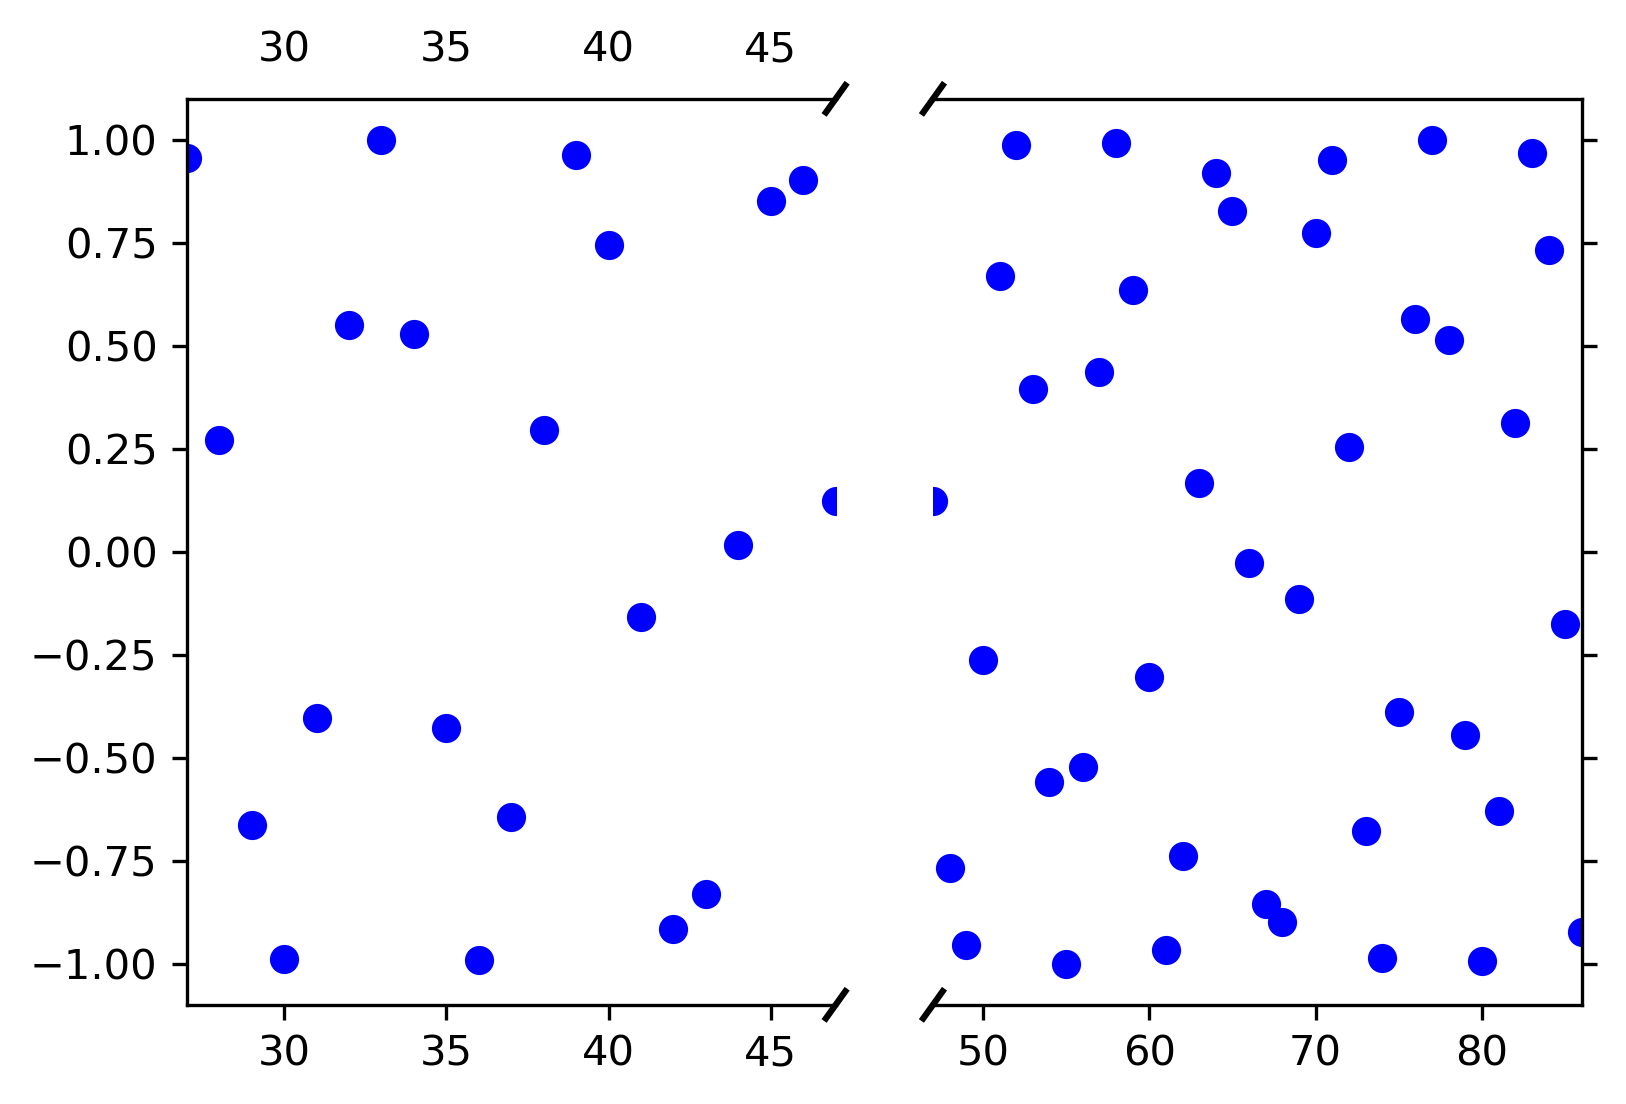

In [181]:
# If you 're not familiar with np.r_, don't worry too much about this.It 's just 
# a series with points from 0 to 1 spaced at 0.1, and 9 to 10 with the same spacing.
x = np.arange(27,88,1)
y = np.sin(x)

fig, (ax, ax2) = plt.subplots(1, 2, sharey = True)

# plot the same data on both axes
ax.plot(x, y, 'bo')
ax2.plot(x, y, 'bo')

# zoom - in / limit the view to different portions of the data
ax.set_xlim(27, 47) # most of the data
ax2.set_xlim(47, 86) # outliers only

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labeltop = 'off') # don 't put tick labels at the top
ax2.yaxis.tick_right()

# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace = 0.15)

# This looks pretty good, and was fairly painless, but you can get that
# cut - out diagonal lines look with just a bit more work.The important
# thing to know here is that in axes coordinates, which are always
# between 0 - 1, spine endpoints are at these locations(0, 0), (0, 1),
   #(1, 0), and(1, 1).Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don 't keep repeating them
kwargs = dict(transform = ax.transAxes, color = 'k', clip_on = False)
ax.plot((1 - d, 1 + d), (-d, +d), ** kwargs) # top - left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), ** kwargs) # bottom - left diagonal

kwargs.update(transform = ax2.transAxes) #switch to the bottom axes
ax2.plot((-d, d), (-d, +d), ** kwargs) # top - right diagonal
ax2.plot((-d, d), (1 - d, 1 + d), ** kwargs) # bottom - right diagonal

# What 's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace = ...) or plt.subplot_tool(),
   # the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

<ErrorbarContainer object of 3 artists>

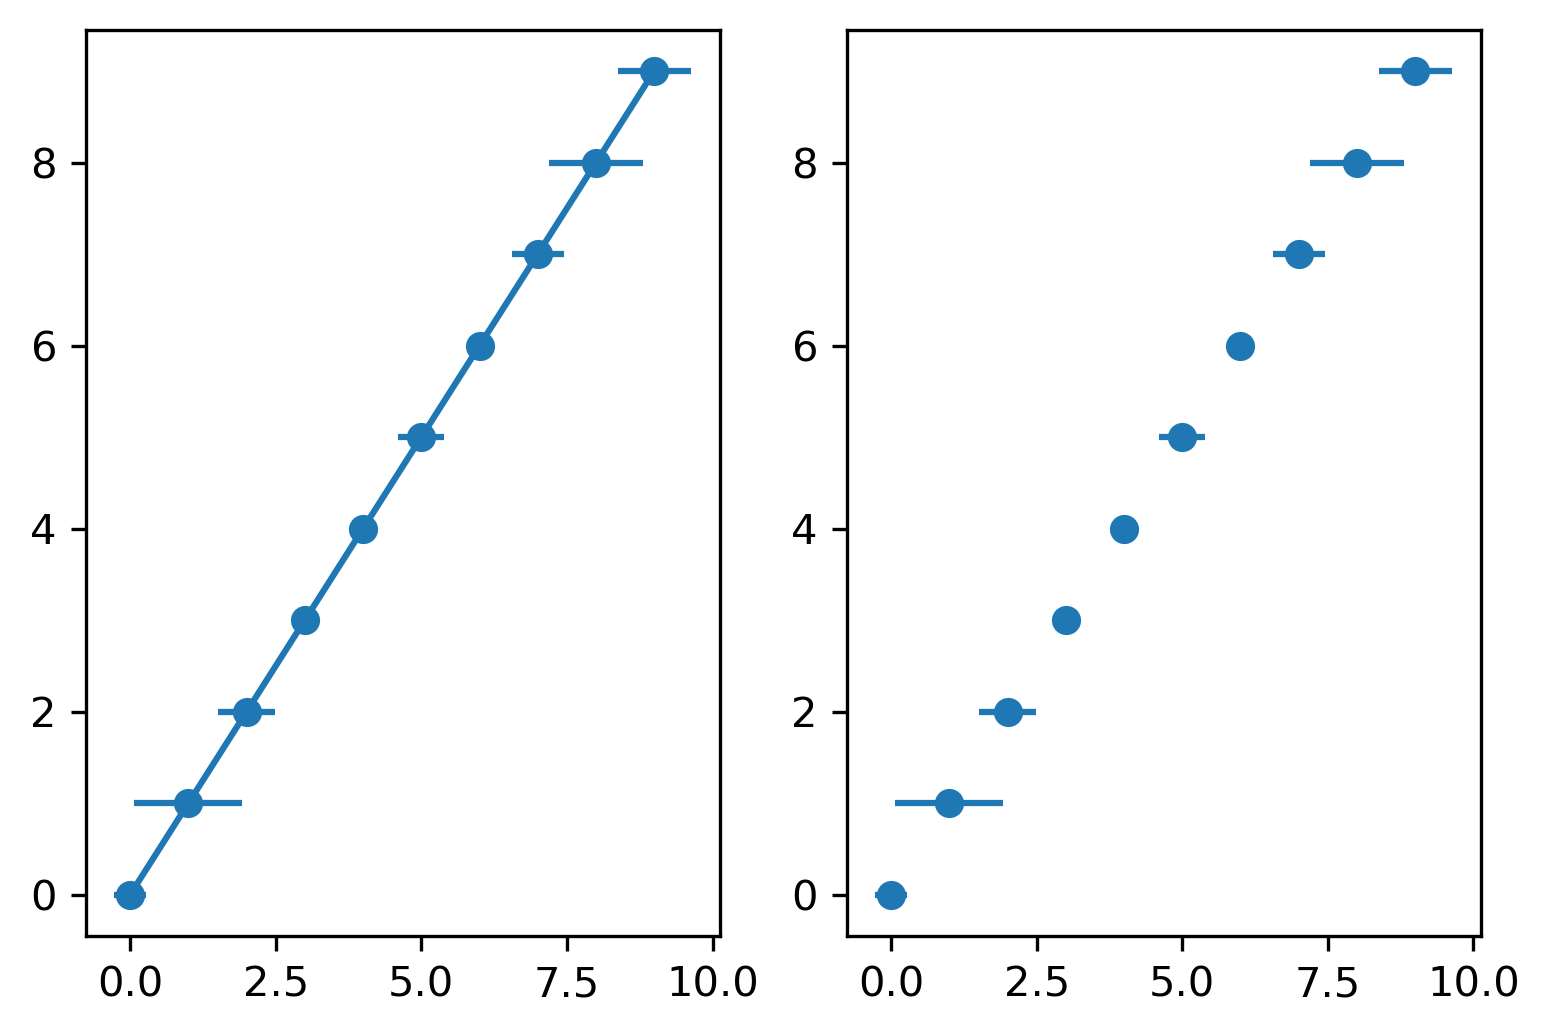

In [52]:
x = np.arange(10)
y = np.arange(10)
yerr = np.random.random(10)
xerr = np.random.random(10)

plt.figure()
plt.subplot(121)
plt.scatter(x, y, label = 'blah')
plt.errorbar(x, y, yerr = None, xerr = xerr)

plt.subplot(122)
plt.scatter(x, y, label = 'blah')
plt.errorbar(x, y, yerr = None, xerr = xerr, ls = 'none')

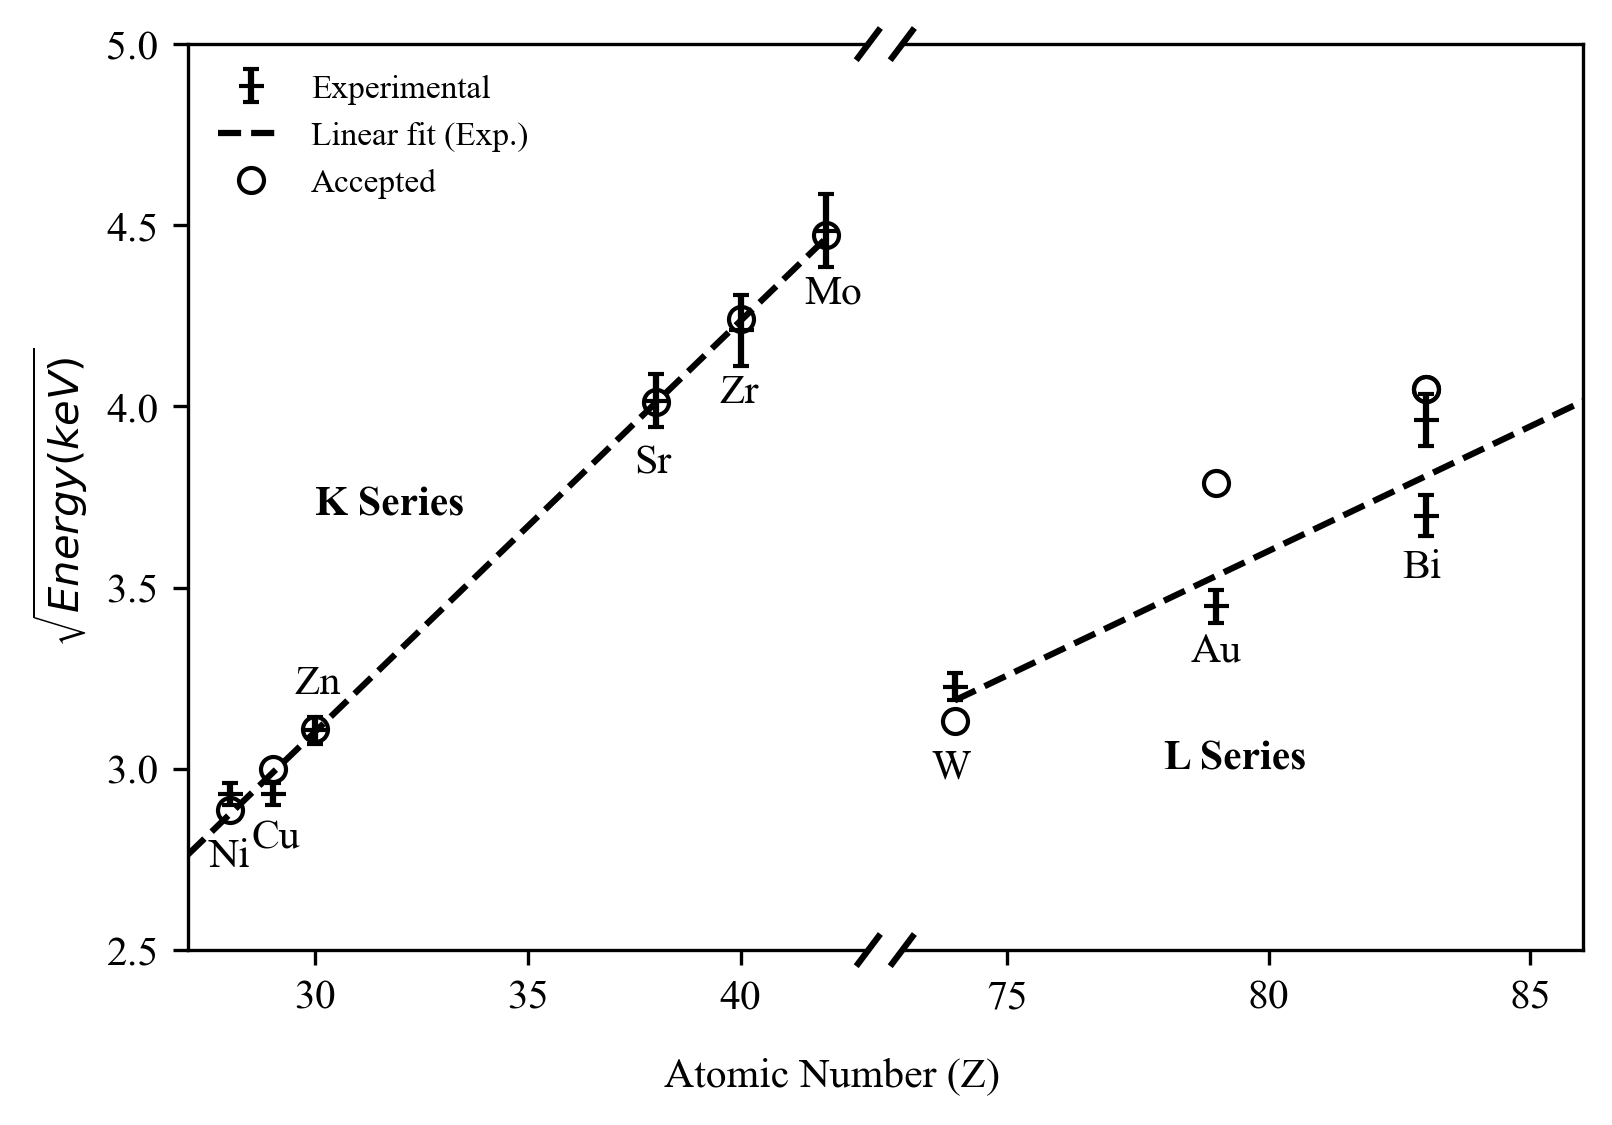

In [21]:
# If you 're not familiar with np.r_, don't worry too much about this.It 's just 
# a series with points from 0 to 1 spaced at 0.1, and 9 to 10 with the same spacing.
Z1 = np.array([28,29,30,38,40,42])
L1 = ['Ni', 'Cu', 'Zn', 'Sr', 'Zr', 'Mo']
Z2 = np.array([74,79,83,83])
L2 = ['W','Au', 'Bi','Bi']
E1 = np.array([2.9307137213,2.9307137213,3.1064927005,4.0164147756,4.2102013247,4.4855155452])
E2 = np.array([3.2263123073,3.4485764910,3.6990820284,3.9634156286])
E1_err = np.array([ 0.0314273928, 0.031427393, 0.037997031, 0.074346088, 0.098287089, 0.10114067])
E2_err = np.array([0.037501188, 0.046308343, 0.057650316, 0.071367931])
A1 = np.array([2.8877326746,2.9988331064,3.1101446912, 4.0124805295, 4.2422871190, 4.4723595562])
A2 = np.array([3.1335283627,3.7885353370,4.0485799980,4.0485799980])
#np.array([])

fig, (ax, ax2) = plt.subplots(1, 2, sharey = True)

# plot the same data on both axes
ax.plot(Z1,A1, ls='none',color='black', marker='o', fillstyle='none', label = 'Accepted')
x = np.arange(27,43,1)
m, b = np.polyfit(Z1, E1, 1)
#m = slope, b=intercept
ax.errorbar(Z1, E1, yerr =E1_err, capsize=2, color='black', marker='+', ls = 'none', label='Experimental')

ax.plot(x, m*x + b, color ='k', ls='--', label = 'Linear fit (Exp.)')
#ax.plot(Z1,A1, ls='none',color='black', marker='o', fillstyle='none', label = 'K accepted')
ax2.errorbar(Z2, E2, yerr =E2_err, capsize=2, color='black', marker='+', ls = 'none', label = 'L experimental')
ax2.plot(Z2,A2, ls='none',color='black', marker='o', fillstyle='none', label ='L accepted')






x = np.arange(74,88,1)
m, b = np.polyfit(Z2, E2, 1)
#m = slope, b=intercept
ax2.plot(x, m*x + b, color ='k', ls='--', label ='linear (L exp.)')



# zoom - in / limit the view to different portions of the data
ax.set_xlim(27, 43) # most of the data
ax2.set_xlim(73, 86) # outliers only

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
#ax.ylabel("Hello")
#ax.tick_params(labeltop = 'off') # don 't put tick labels at the top
ax2.yaxis.set_visible(False)
#ax.set_ylabel("$\textnormal{\sqrt{Energy (keV)}}$")
ax.set_ylim(bottom=2.5, top=5.0)
ax2.set_ylim(bottom=2.5, top=5.0)

ytext = "$\sqrt{Energy (keV)}$"


ax.set_ylabel(ytext, style = 'normal')


ax.annotate('Atomic Number (Z)', xy = (0.7, -0.15), xycoords='axes fraction', fontname="Times New Roman")

handles, labels = ax.get_legend_handles_labels()
order = [2,1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False, fontsize = 8)

#handles, labels = ax2.get_legend_handles_labels()
#order = [2,1,0]
#ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order],frameon=False, fontsize = 8 )


ax.annotate('Ni', (Z1[0]-0.5, E1[0]-0.2))
ax.annotate('Cu', (Z1[1]-0.5, E1[1]-0.15))
ax.annotate('Zn', (Z1[2]-0.5, E1[2]+0.1))
ax.annotate('Sr', (Z1[3]-0.5, E1[3]-0.2))
ax.annotate('Zr', (Z1[4]-0.5, E1[4]-0.2))
ax.annotate('Mo', (Z1[5]-0.5, E1[5]-0.2))
ax2.annotate('W', (Z2[0]-0.45, E2[0]-0.25))
ax2.annotate('Au', (Z2[1]-0.5, E2[1]-0.15))
ax2.annotate('Bi', (Z2[2]-0.45, E2[2]-0.17))
ax.annotate('K Series', (30,3.7), fontweight='bold')
ax2.annotate('L Series', (78,3), fontweight='bold')
#for i, txt in enumerate(L1):
#    ax.annotate(txt, (Z1[i]-0.5, E1[i]-0.2))



# Make the spacing between the two axes a bit smaller
plt.subplots_adjust(wspace = 0.05)

# This looks pretty good, and was fairly painless, but you can get that
# cut - out diagonal lines look with just a bit more work.The important
# thing to know here is that in axes coordinates, which are always
# between 0 - 1, spine endpoints are at these locations(0, 0), (0, 1),
   #(1, 0), and(1, 1).Thus, we just need to put the diagonals in the
# appropriate corners of each of our axes, and so long as we use the
# right transform and disable clipping.

d = .015 # how big to make the diagonal lines in axes coordinates
# arguments to pass plot, just so we don 't keep repeating them
kwargs = dict(transform = ax.transAxes, color = 'k', clip_on = False)
ax.plot((1 - d, 1 + d), (-d, +d), ** kwargs) # top - left diagonal
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), ** kwargs) # bottom - left diagonal

kwargs.update(transform = ax2.transAxes) #switch to the bottom axes
ax2.plot((-d, d), (-d, +d), ** kwargs) # top - right diagonal
ax2.plot((-d, d), (1 - d, 1 + d), ** kwargs) # bottom - right diagonal

# What 's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace = ...) or plt.subplot_tool(),
   # the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

plt.show()

# Data from 12 October 2021
Ran experiment over range 4-35 degrees with 2 second gate. Parameters were:

Crystal used: LiF or KBr (started, not completed).
<p>Collimator setting: 1,2,5 mm
<p>Increment: 1, 0.1 degree

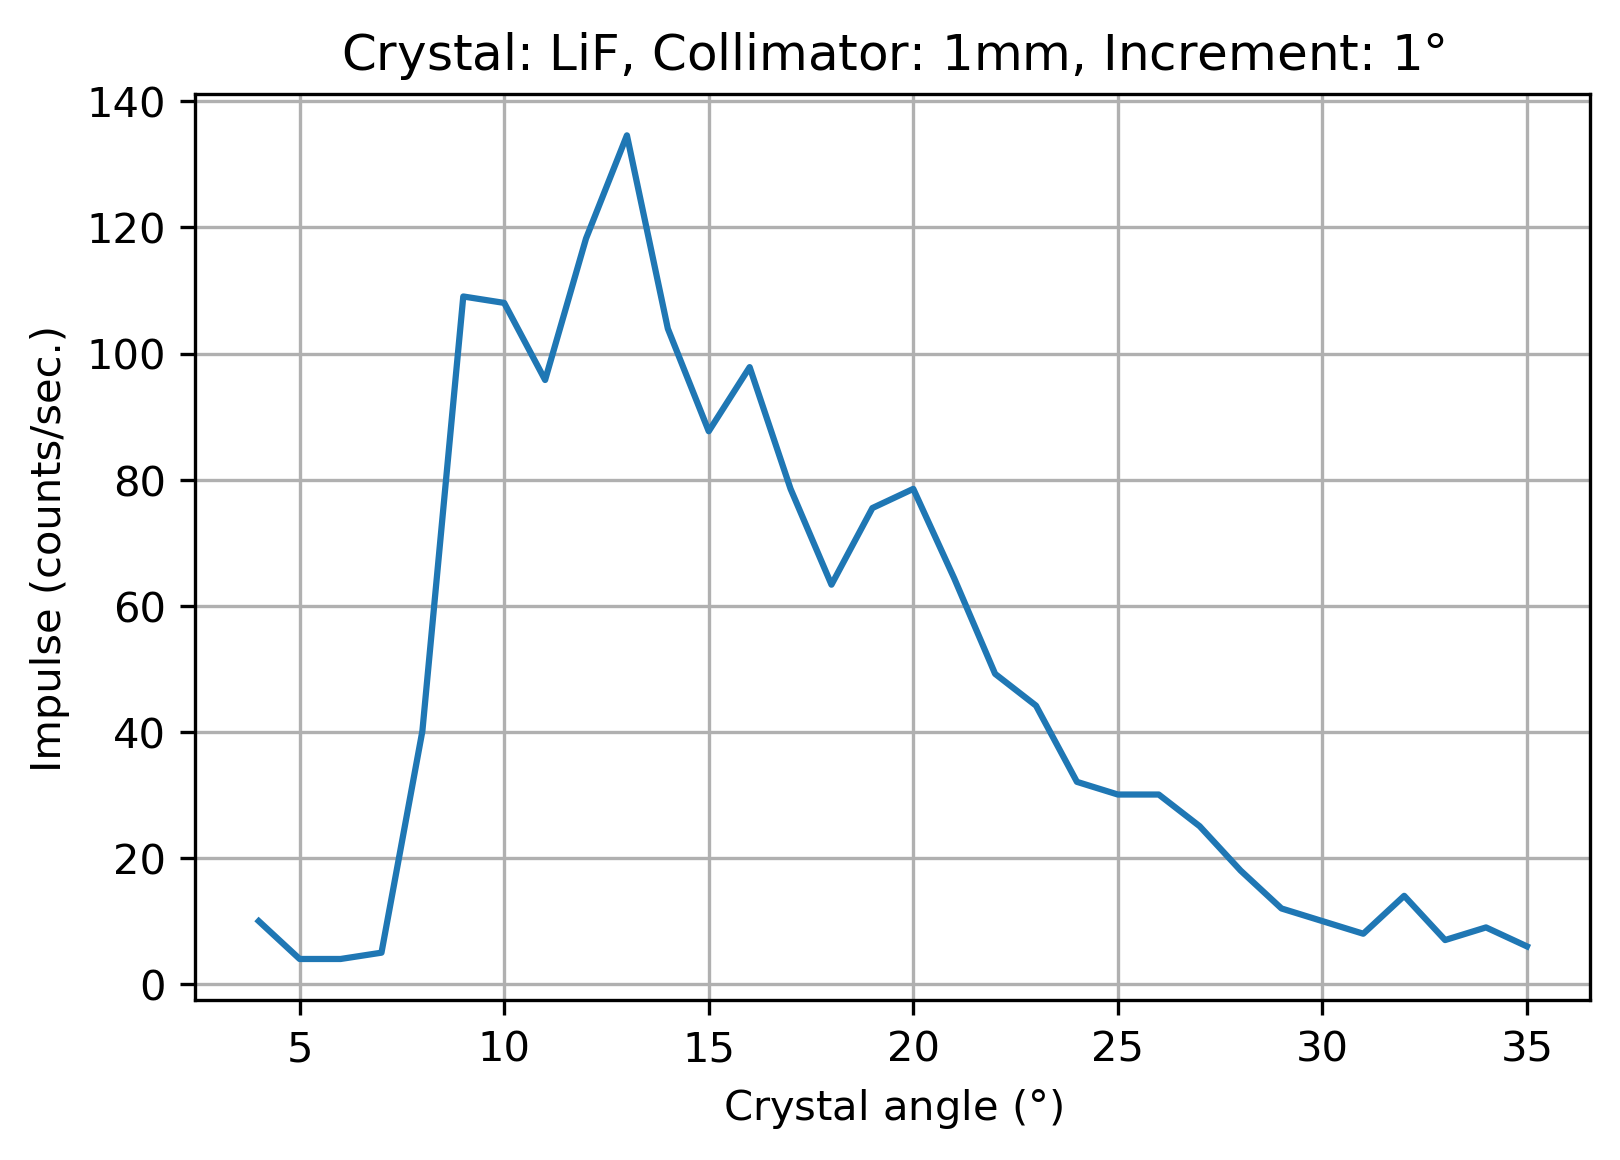

In [3]:
crystal = 'LiF'
collimator = 1#mm
increment = 1#degree
filename = 'AN1012LiF1mm.4.35.1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

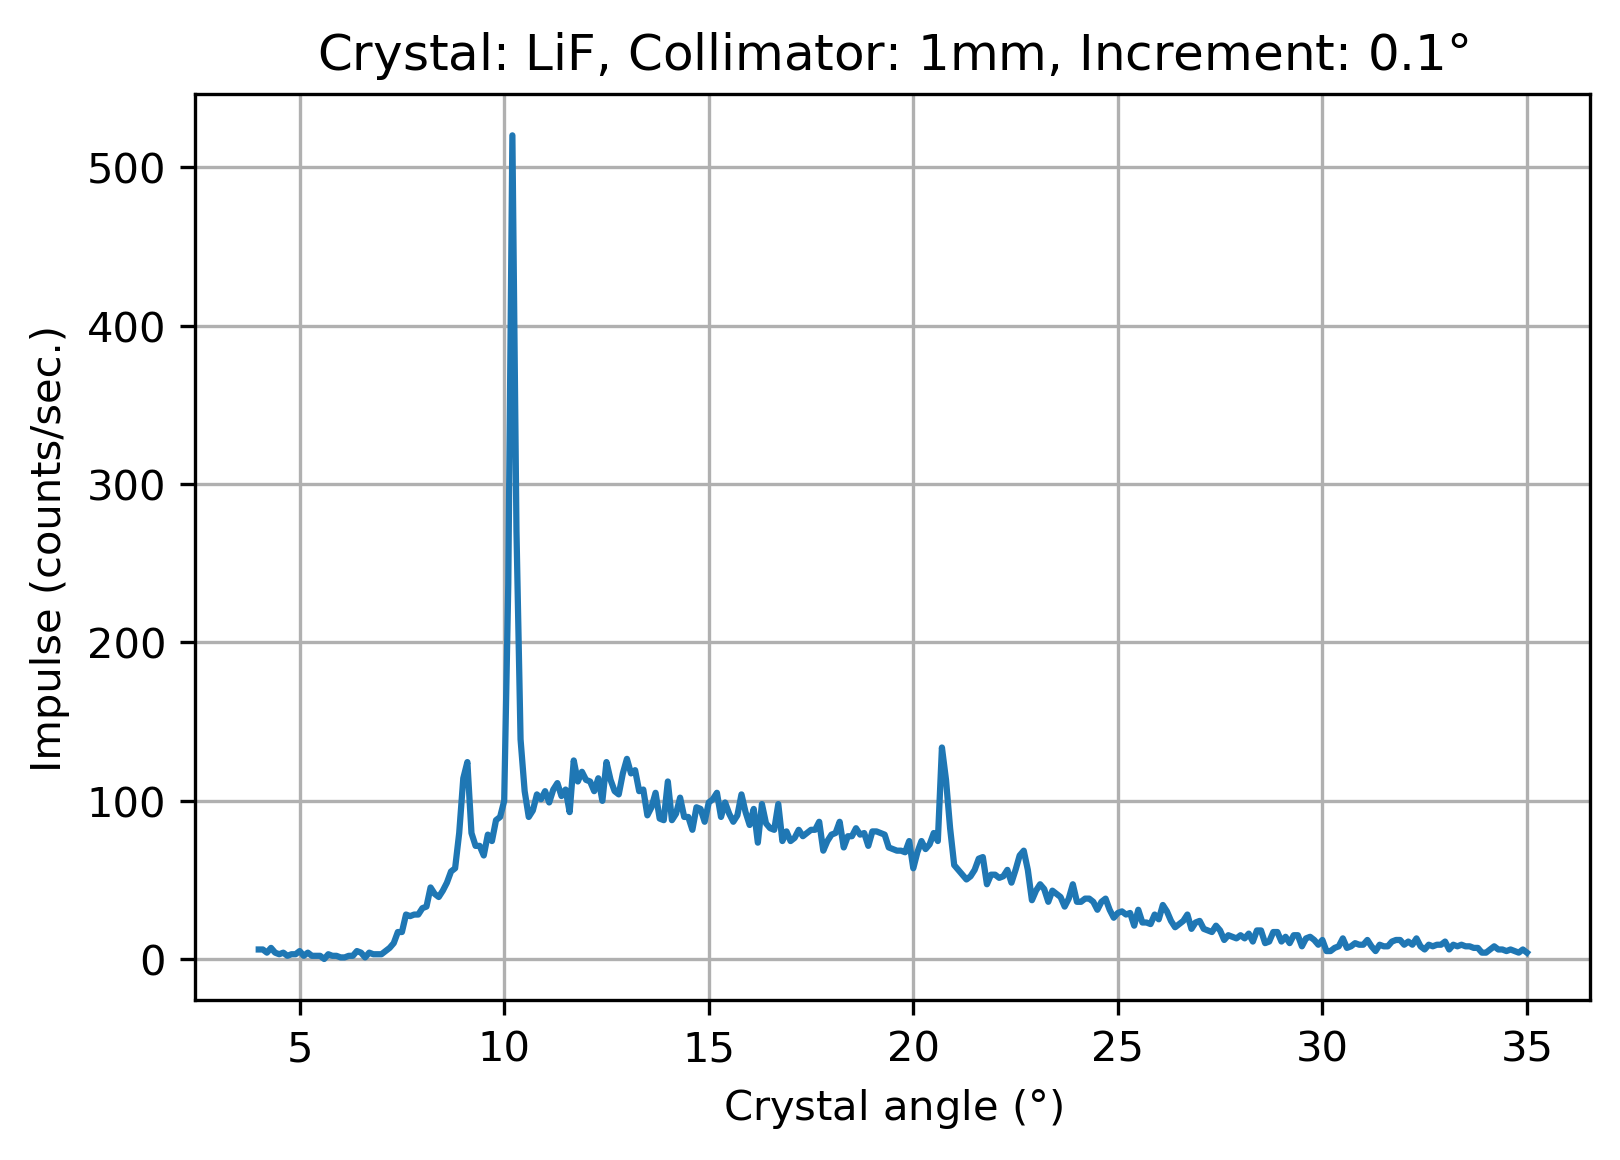

In [9]:
crystal = 'LiF'
collimator = 1#mm
increment = 0.1#degree
filename = 'AN1012LiF1mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

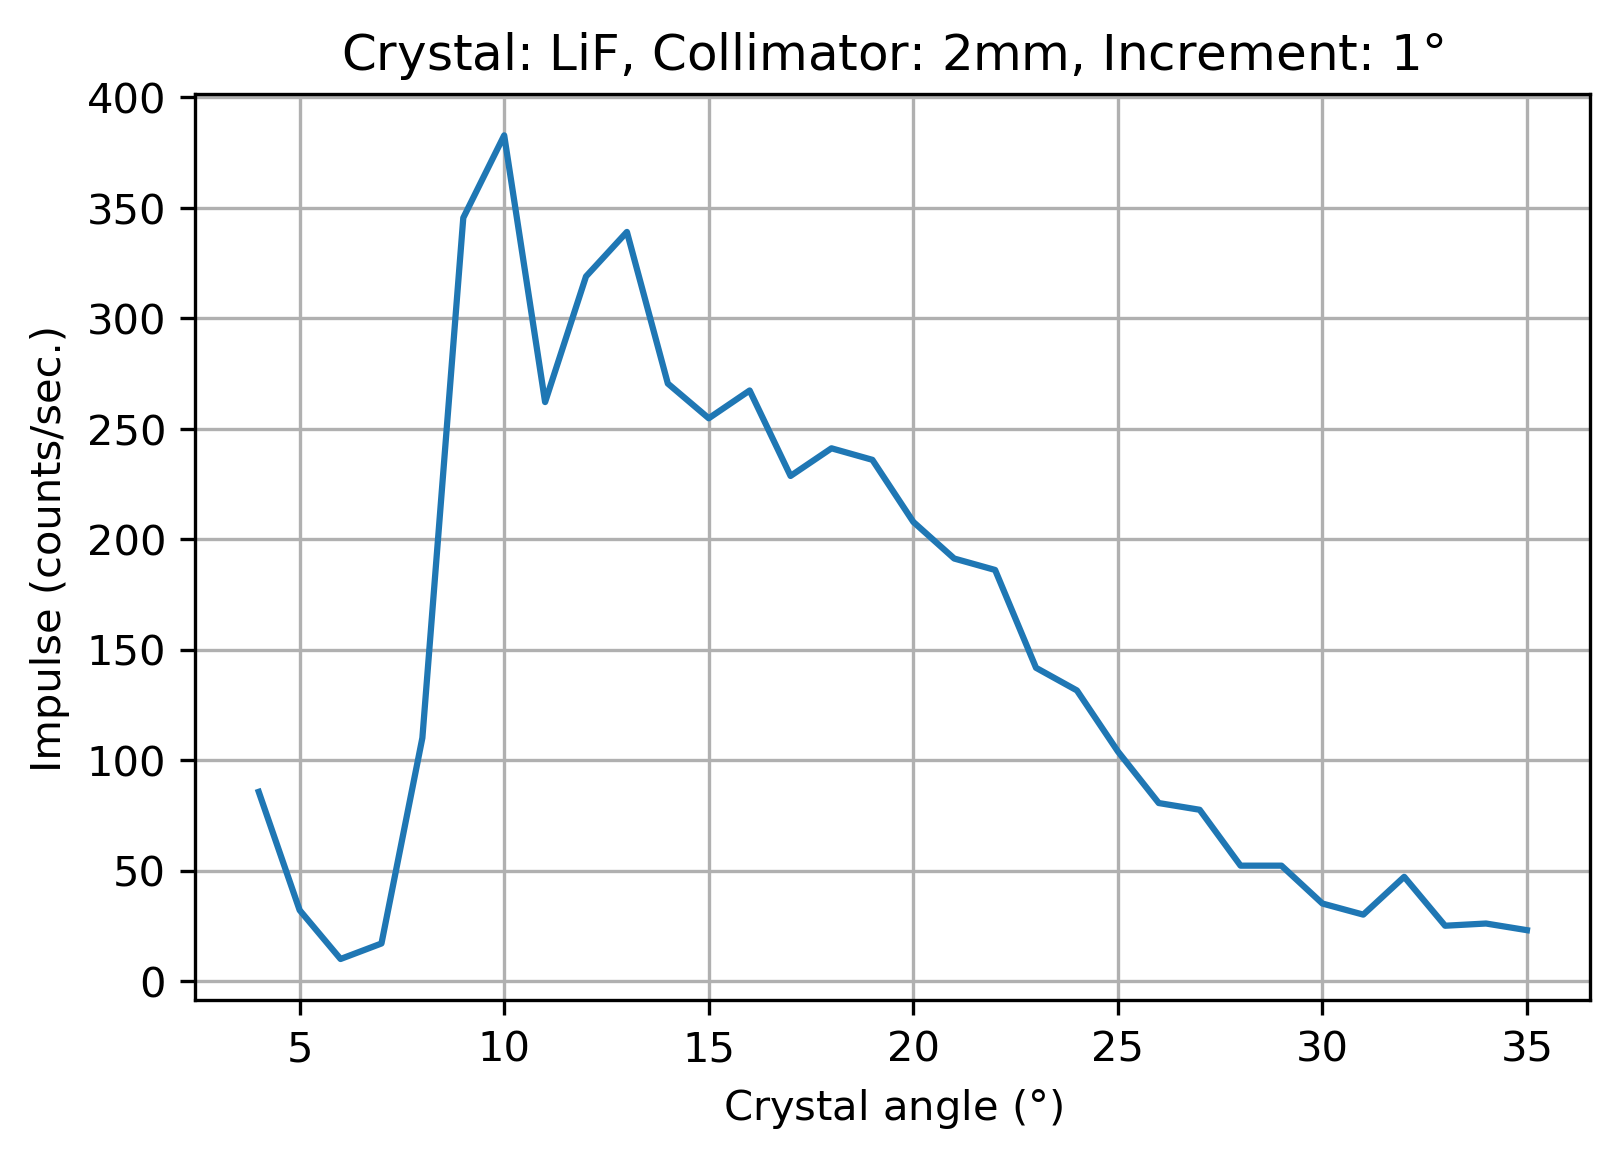

In [11]:
crystal = 'LiF'
collimator = 2#mm
increment = 1#degree
filename = 'AN1012LiF2mm.4.35.1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

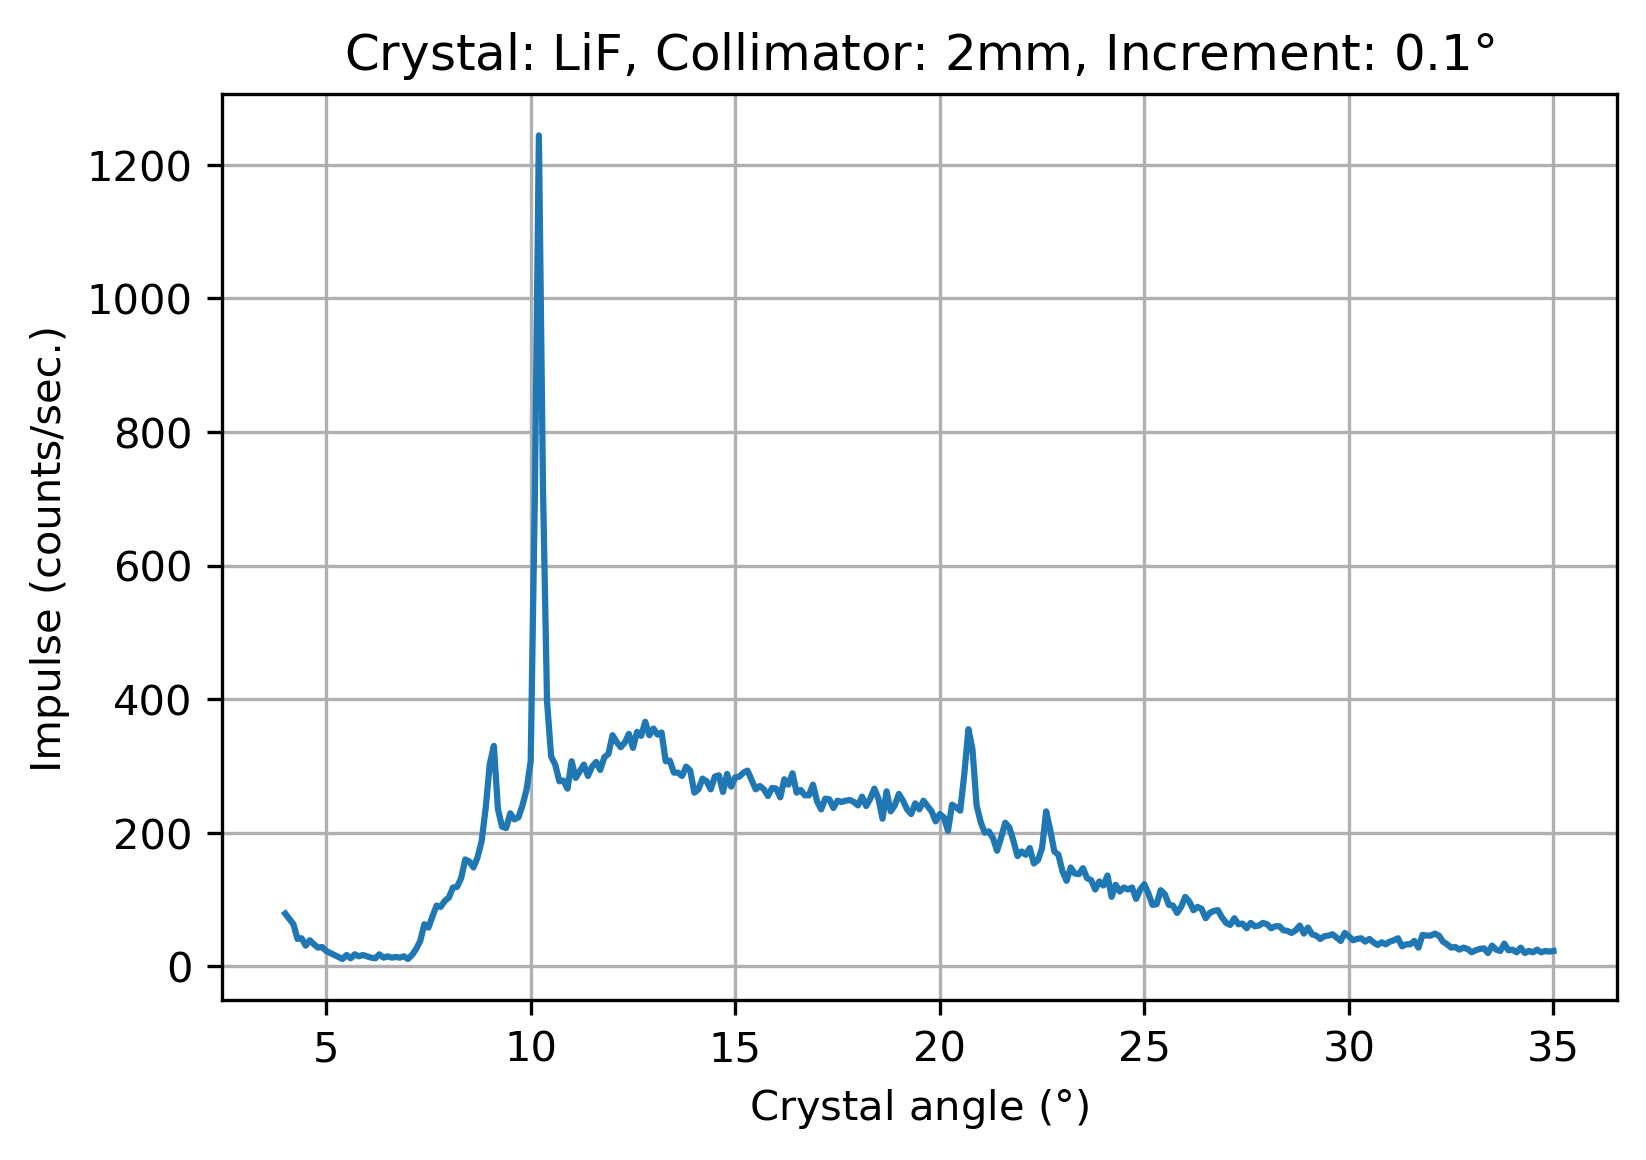

In [12]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1012LiF2mm.4.35.0,1.2.csv'
data1=pd.read_csv(filename,encoding='latin1', skiprows=2)
data1.columns = ['Angle', 'Impulse']
data1.plot(x="Angle", y="Impulse", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid=True);

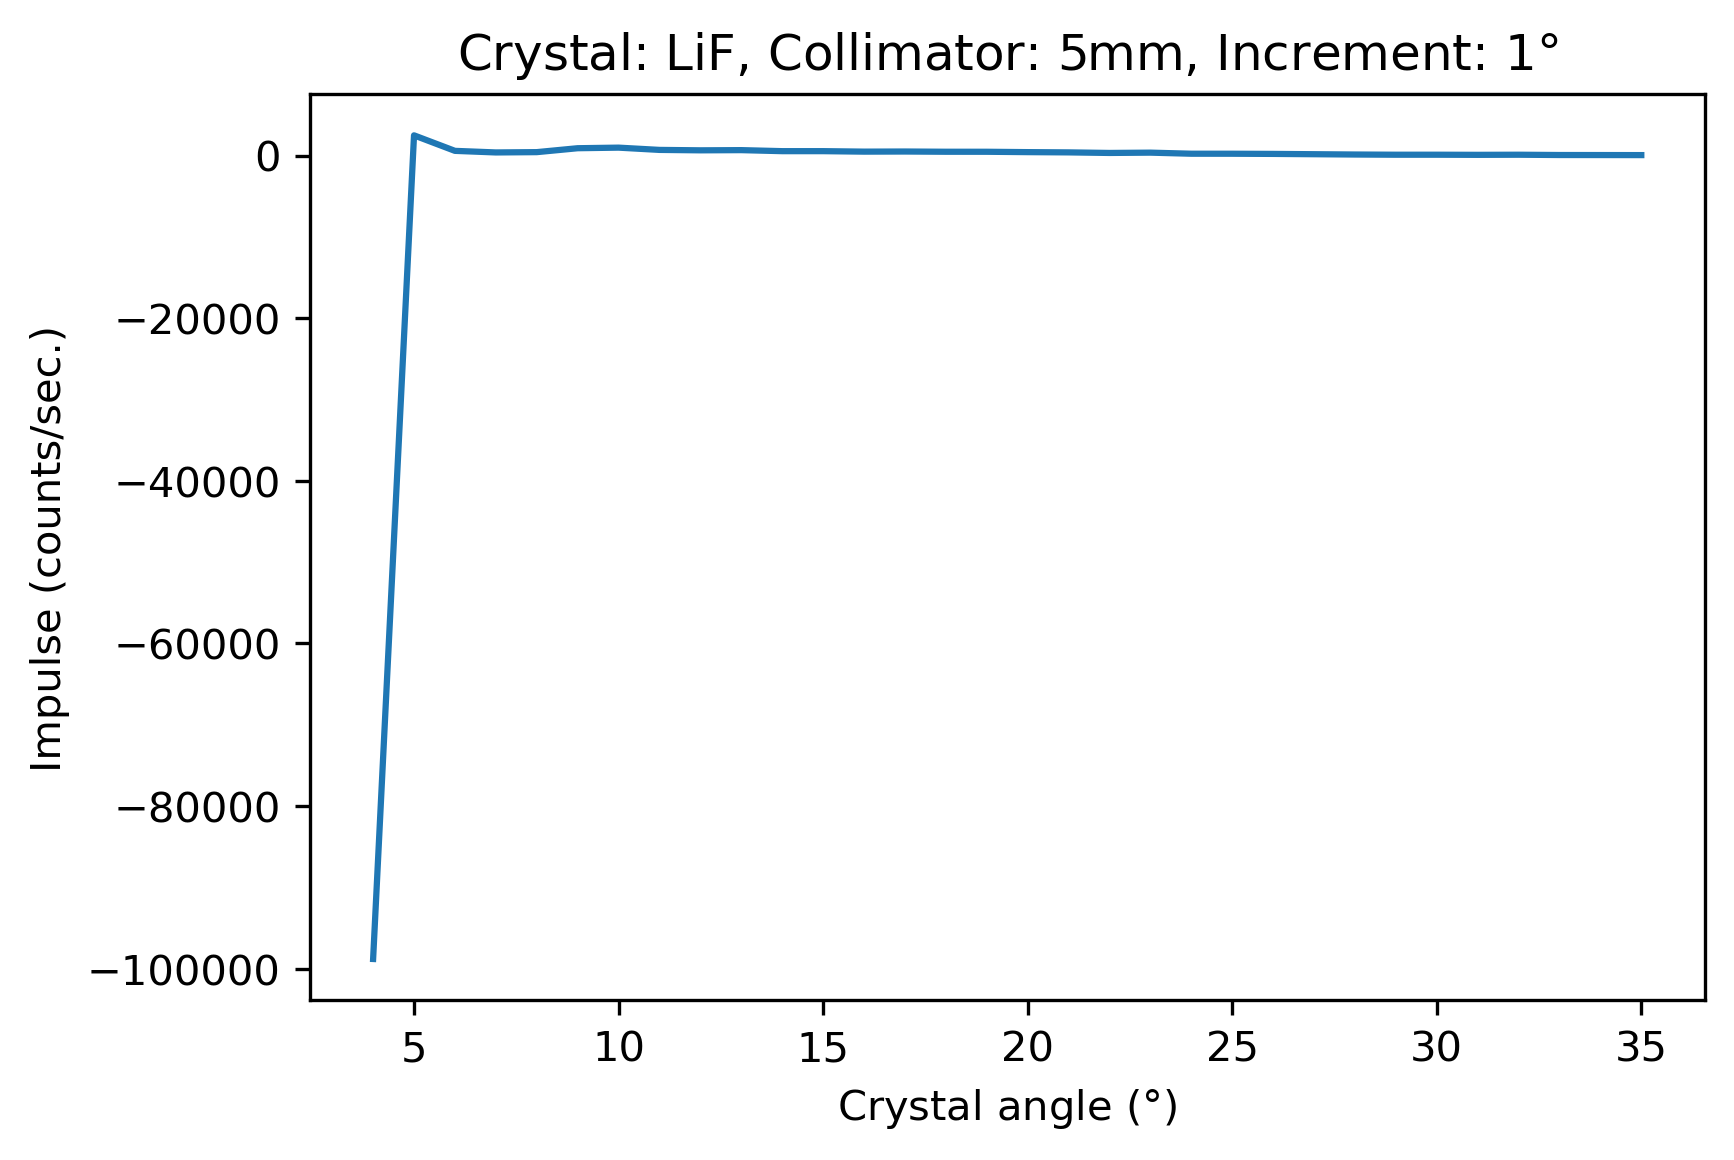

In [15]:
crystal = 'LiF'
collimator = 5#mm
increment = 1#degree
filename = 'AN1012LiF5mm.4.35.1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None);

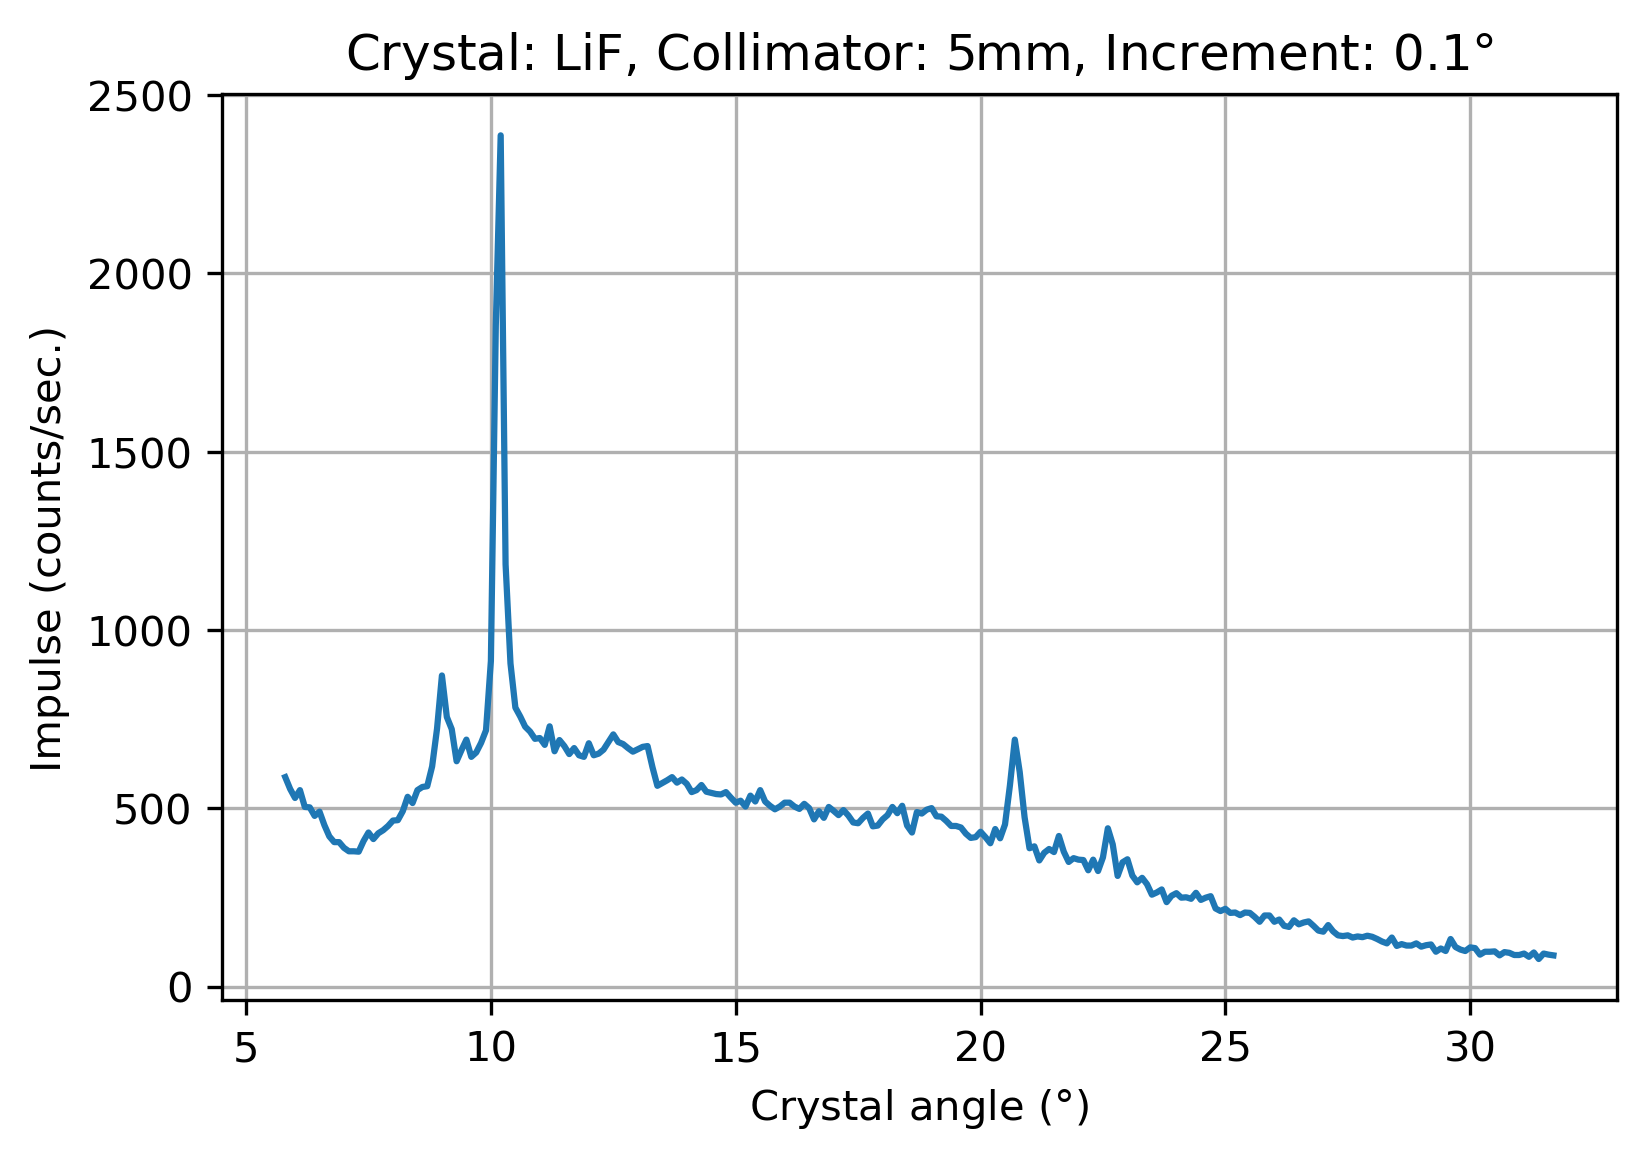

In [19]:
#note I have skipped first 18 values so large impulses at low angles are eliminated
crystal = 'LiF'
collimator = 5#mm
increment = 0.1#degree
filename = 'AN1012LiF5mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=20)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid=True);

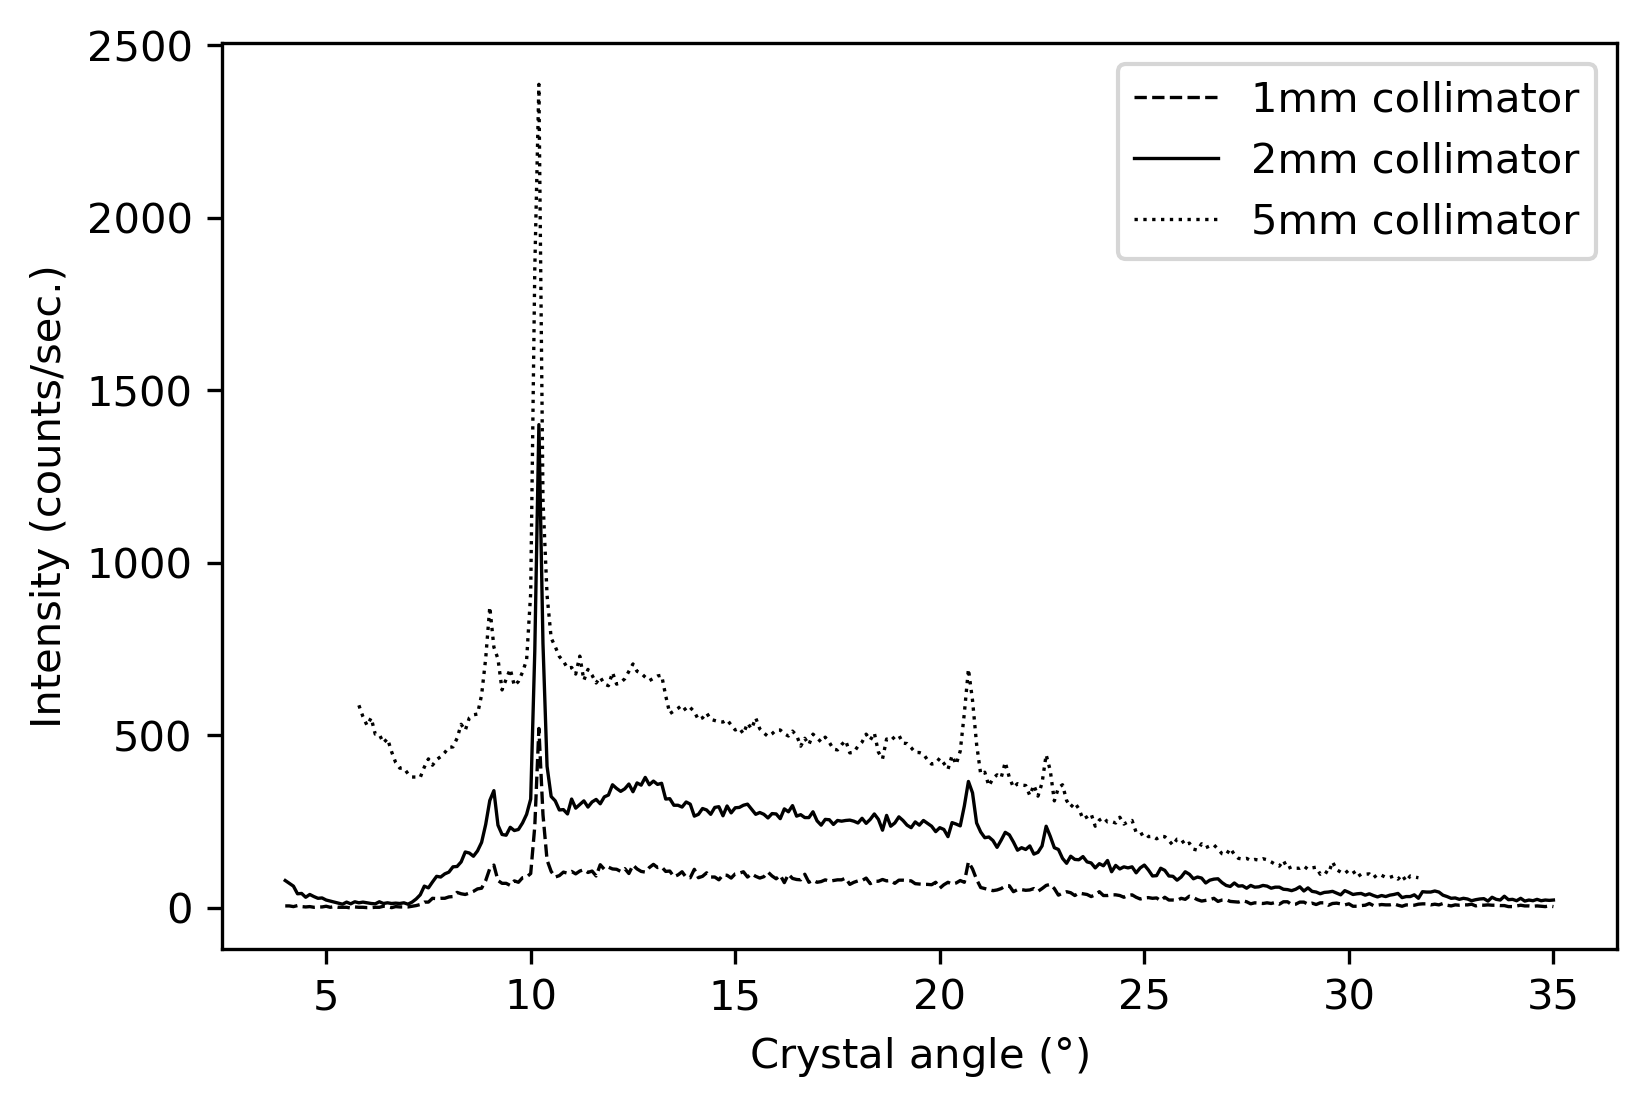

In [3]:
crystal = 'LiF'
increment = 0.1#degree

filename = 'AN1012LiF1mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
angle = data['Angle'].to_numpy()
LiF1mm = data['N'].to_numpy()

filename = 'AN1012LiF2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
LiF2mm = data['N'].to_numpy()

filename = 'AN1012LiF5mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=20)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
LiF5mm = data['N'].to_numpy()
LiF5mm_angle = data['Angle'].to_numpy()

fig,ax=plt.subplots()
ax.plot(angle, LiF1mm, label ='1mm collimator', color ='k', ls = '--', linewidth = 0.8)
ax.plot(angle, LiF2mm, label ='2mm collimator', color = 'k', linewidth = 0.8)
ax.plot(LiF5mm_angle, LiF5mm, label='5mm collimator', color = 'k', ls = 'dotted', linewidth = 0.8)
ax.legend()
ax.set_xlabel('Crystal angle ($\degree$)')
ax.set_ylabel('Intensity (counts/sec.)');
#ax.set_title(f'Mo target, {crystal} crystal- {increment}$\degree$ steps, 2 sec. per step');

In [21]:
pip install latex

You should consider upgrading via the '/Users/peterrigg/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


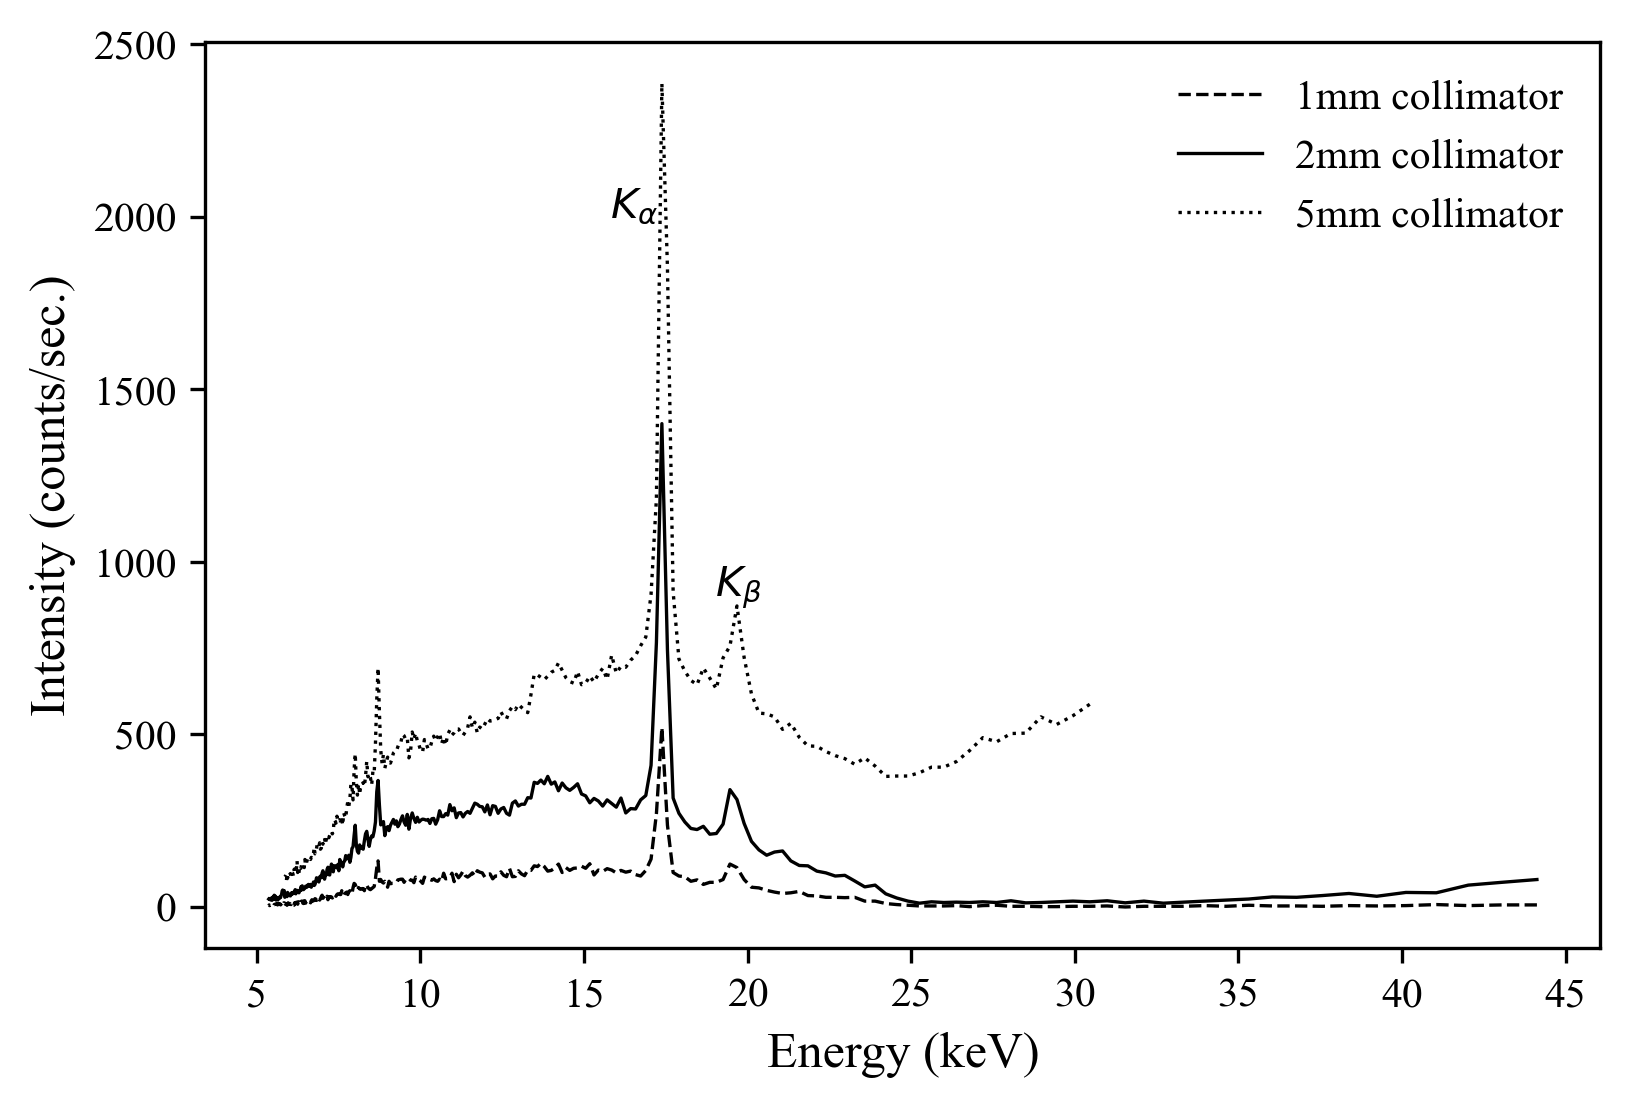

In [28]:


crystal = 'LiF'
increment = 0.1#degree
d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs

filename = 'AN1012LiF1mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
angle = data['Angle'].to_numpy()
LiF1mm = data['N'].to_numpy()

filename = 'AN1012LiF2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
LiF2mm = data['N'].to_numpy()

filename = 'AN1012LiF5mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=20)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
LiF5mm = data['N'].to_numpy()
LiF5mm_angle = data['Angle'].to_numpy()

wavelengths = (2* d* np.sin(np.pi* angle/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)

wavelengths_5mm = (2* d* np.sin(np.pi* LiF5mm_angle/180))/1E-10
energies_5mm = c*h/(e*wavelengths_5mm*1000*1E-10)

fig,ax=plt.subplots()
ax.plot(energies, LiF1mm, label ='1mm collimator', color ='k', ls = '--', linewidth = 0.8)
ax.plot(energies, LiF2mm, label ='2mm collimator', color = 'k', linewidth = 0.8)
ax.plot(energies_5mm, LiF5mm, label='5mm collimator', color = 'k', ls = 'dotted', linewidth = 0.8)
ax.text(15.8, 2000, s= r'$ K_\alpha $', fontname="Times New Roman")
ax.text(19, 900, s= r'$ K_\beta $')
ax.legend(frameon=False)
ax.set_xlabel('Energy (keV)', fontname="Times New Roman", fontsize =12)
ax.set_ylabel('Intensity (counts/sec.)', fontname="Times New Roman", fontsize =12);
d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs

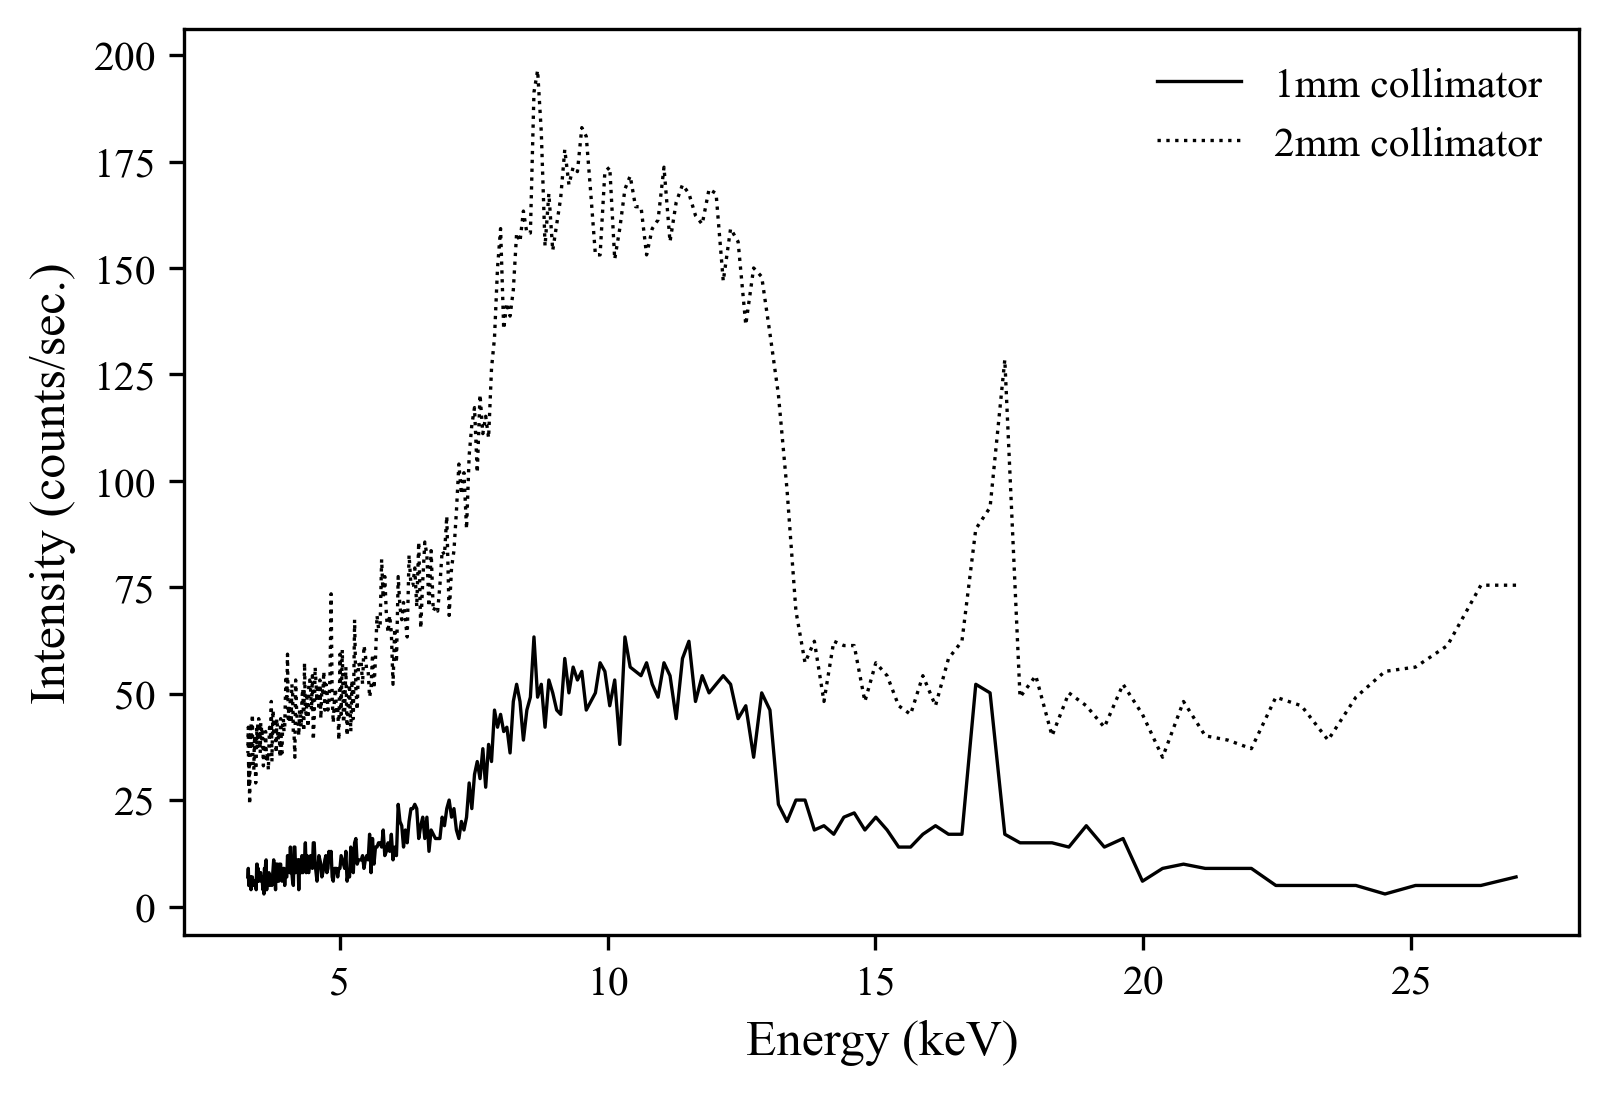

In [32]:
d = 3.295E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs


crystal = 'KBr'
increment = 0.1#degree

filename = 'AN1012KBr(different crystal)1mm4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
KBr1mm_2 = data['N'].to_numpy()

filename = 'AN1012KBr2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
KBr2mm = data['N'].to_numpy()
wavelengths = (2* d* np.sin(np.pi* angle/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)

fig,ax=plt.subplots()

ax.plot(energies, KBr1mm_2, label ='1mm collimator', color = 'k', linewidth = 0.8)
ax.plot(energies, KBr2mm, label='2mm collimator', color = 'k', ls = 'dotted', linewidth = 0.8)
ax.legend(frameon=False)
ax.set_xlabel('Energy (keV)', fontsize='12')

ax.set_ylabel('Intensity (counts/sec.)', fontsize='12');
#ax.set_title(f'Mo target, {crystal} crystal- {increment}$\degree$ steps, 2 sec. per step');

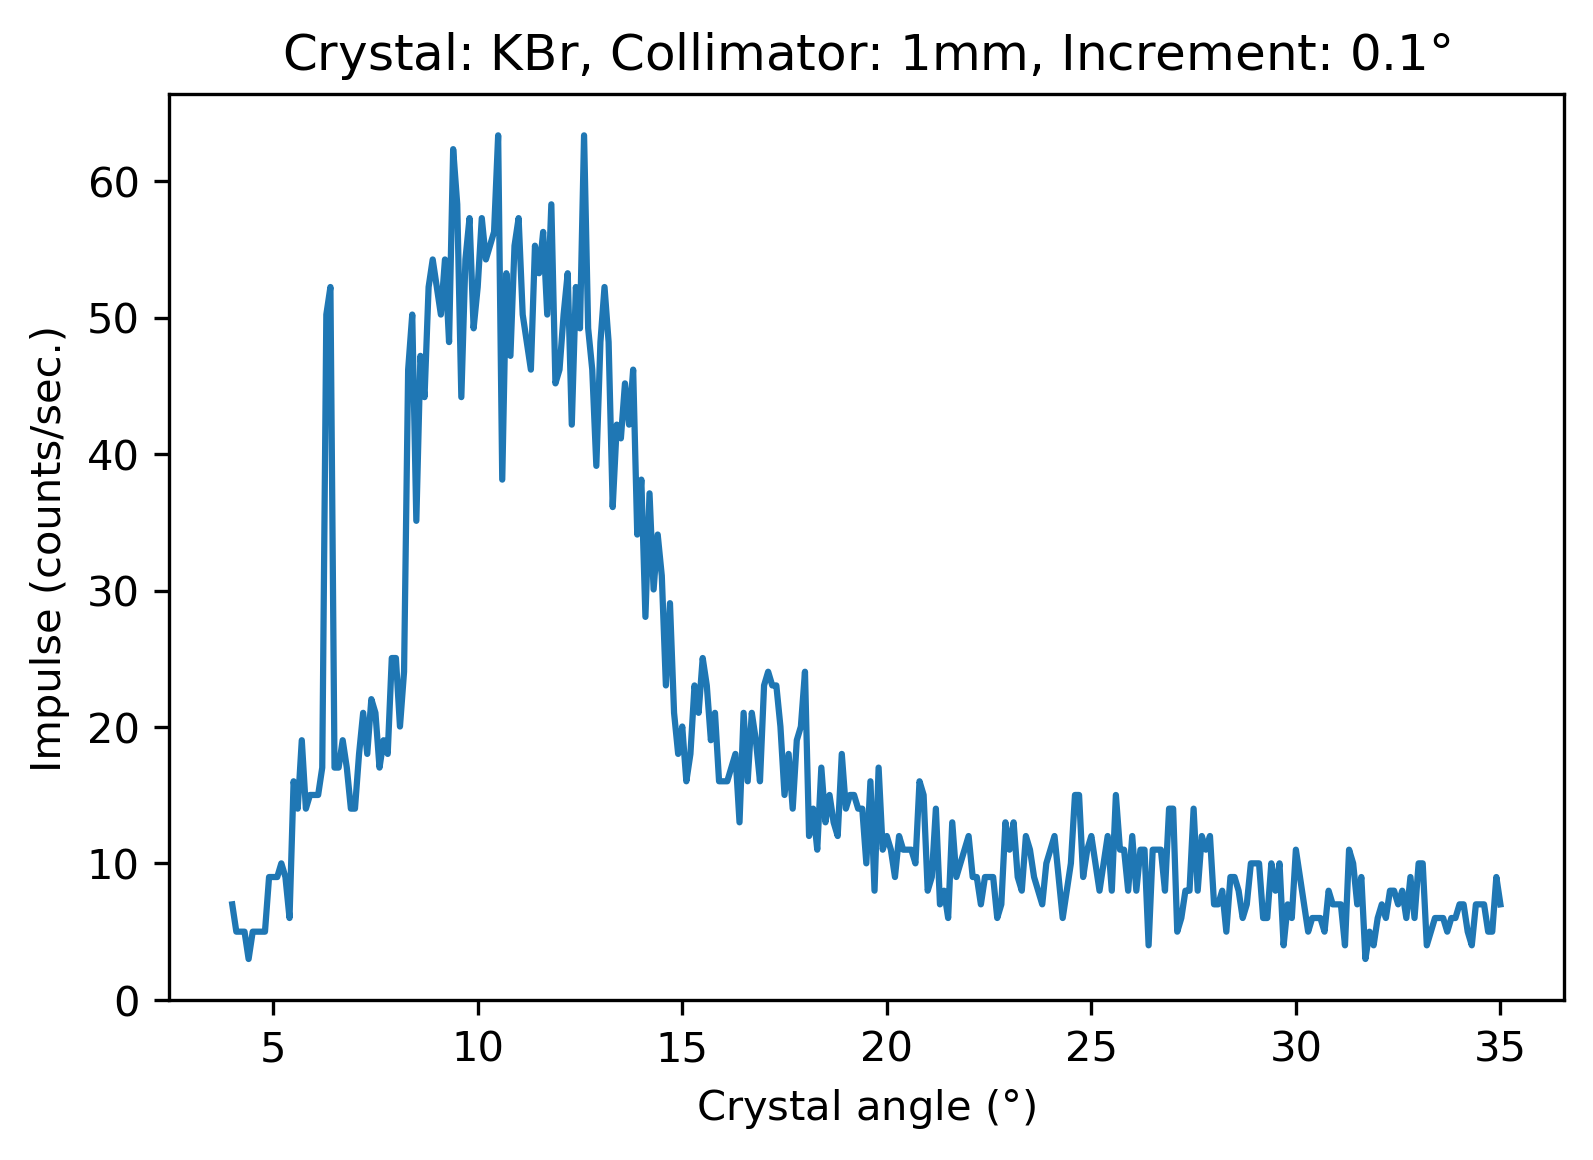

In [23]:
crystal = 'KBr'
collimator = 1#mm
increment = 0.1#degree
filename = 'AN1012KBr(different crystal)1mm4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None);

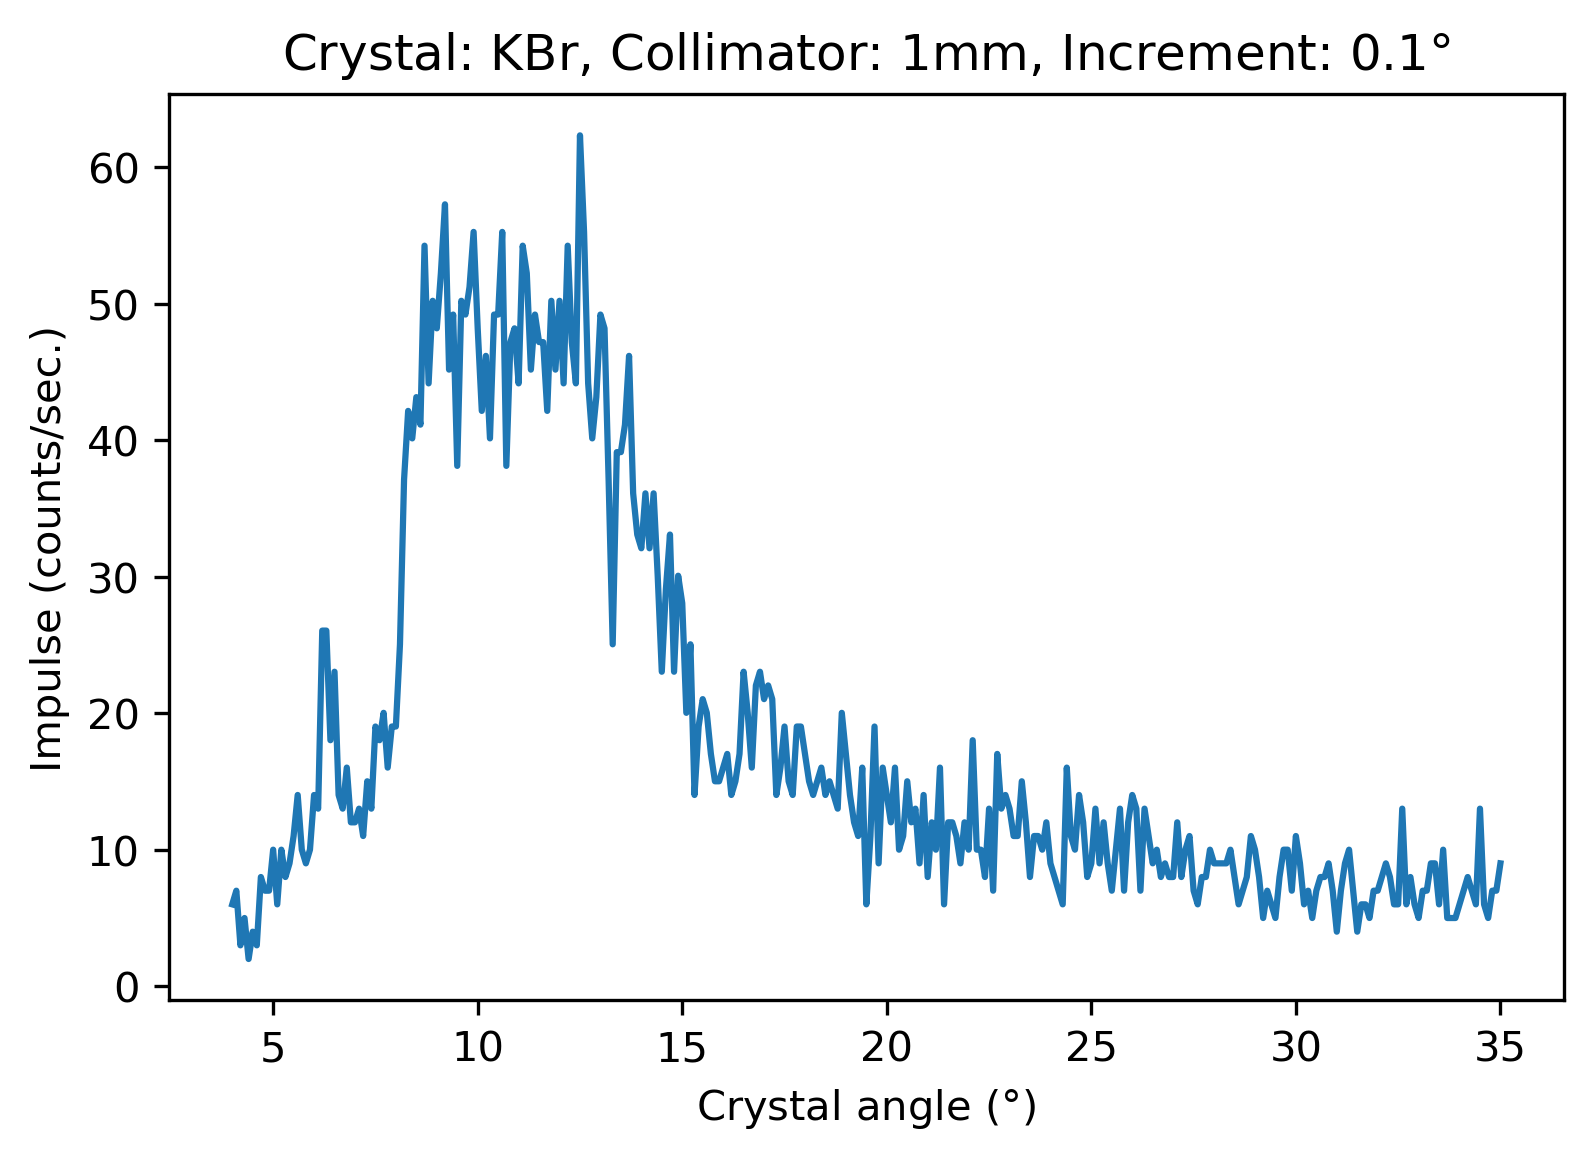

In [24]:
crystal = 'KBr'
collimator = 1#mm
increment = 0.1#degree
filename = 'AN1012KBr1mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None);

In [ ]:
#=SQRT(
        (-E4/(A1^2*SIN(RADIANS(A7)))*A2)^2+(PI()*COT(RADIANS(A7))/(180*A2*SIN(RADIANS(A7)))*B2)^2)

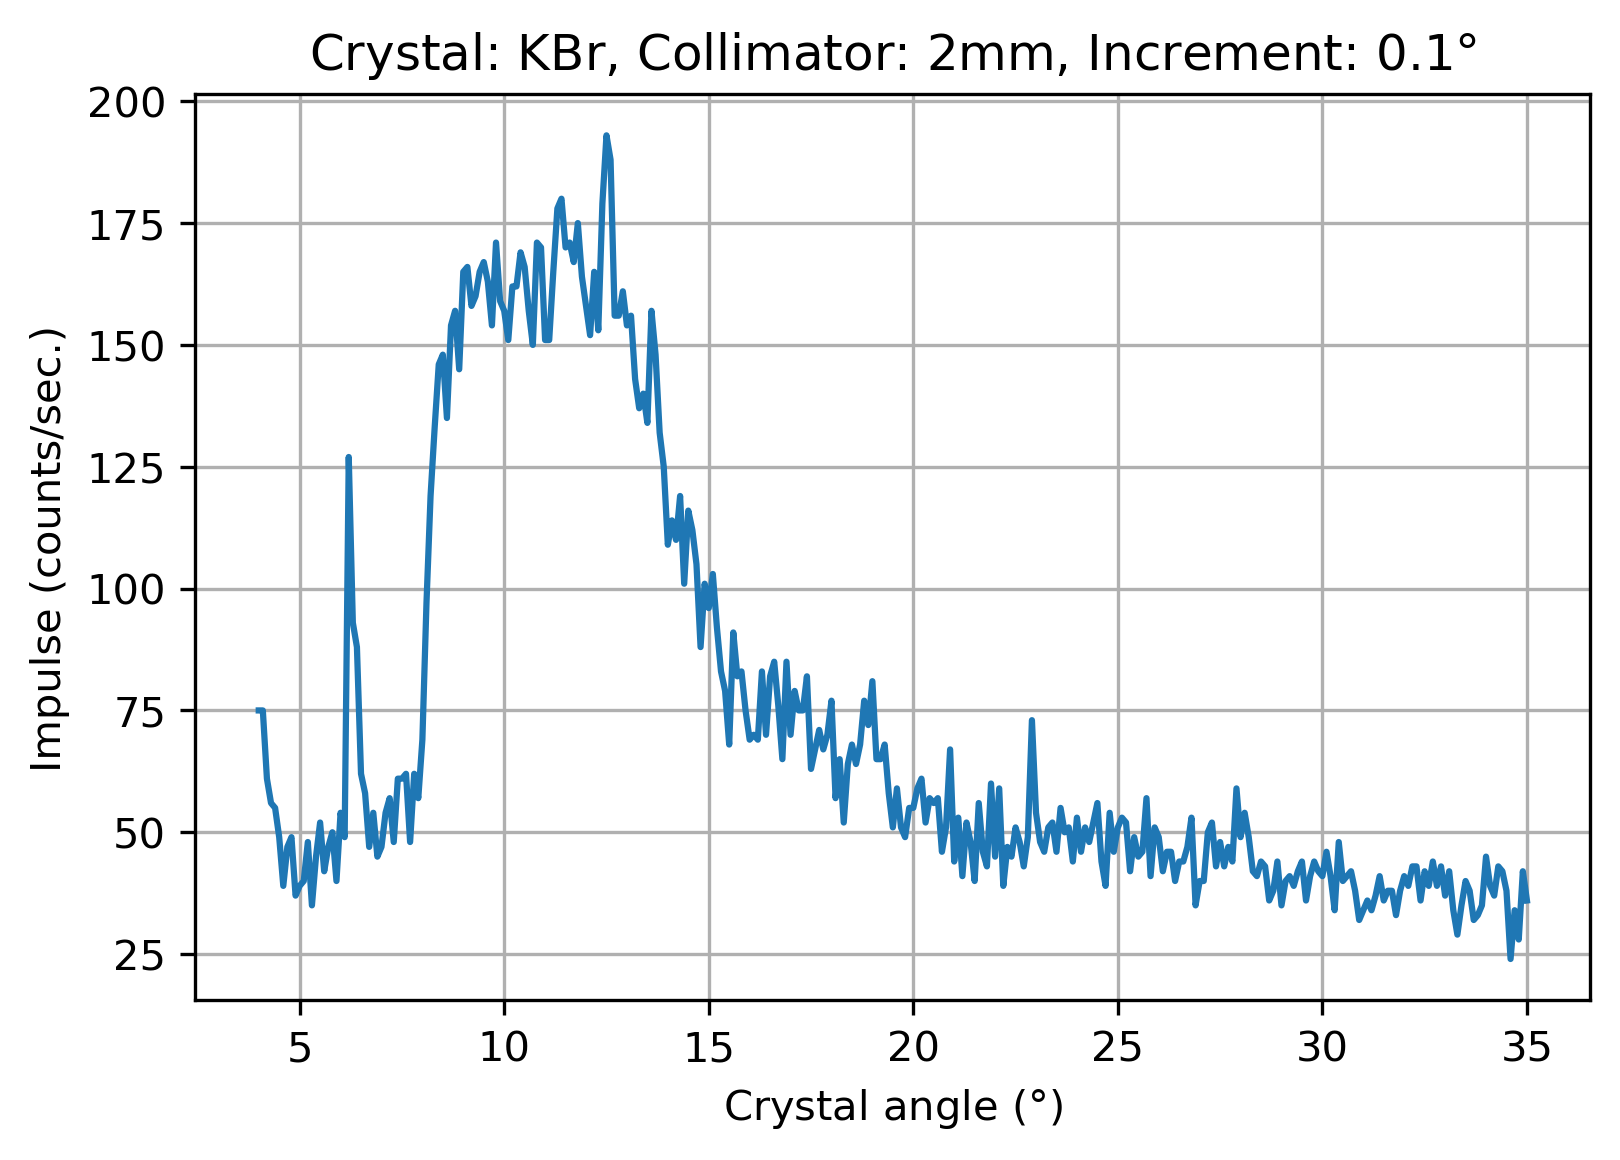

In [25]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1012KBr2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data.plot(x="Angle", y="Impulse", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid= True);

# Conclusions: 

<p>2mm collimator worked better than 1mm as impulse range was wider c0-200 versus c0-60.
<p>Impulse range was thinner than for LiF and probably as a result, background radiation has volatility, so perhaps LiF a better choice in this instance.

# Discussion


In [26]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1012LiF2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
above = data[data["Angle"] > 20]
below = above[above["Angle"] < 24]
print(below)

     Angle  Impulse
161   20.1      223
162   20.2      203
163   20.3      242
164   20.4      238
165   20.5      233
166   20.6      288
167   20.7      355
168   20.8      324
169   20.9      241
170   21.0      216
171   21.1      200
172   21.2      202
173   21.3      192
174   21.4      173
175   21.5      193
176   21.6      215
177   21.7      208
178   21.8      188
179   21.9      165
180   22.0      172
181   22.1      167
182   22.2      177
183   22.3      154
184   22.4      159
185   22.5      177
186   22.6      232
187   22.7      204
188   22.8      172
189   22.9      167
190   23.0      142
191   23.1      128
192   23.2      148
193   23.3      139
194   23.4      138
195   23.5      147
196   23.6      132
197   23.7      129
198   23.8      115
199   23.9      127


In [3]:
d_LiF = 201.4# crystal spacing pm
d_KBr = 329.5

d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs
peaks = np.array([[4.7,10.0,14.8,10,22.6,4,34],[330,1244,355,215,232,1,1]])#peaks from graph with their impulses
#there may be another peak between the last two, but not very clear.
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [ 4.7 10.  14.8 10.  22.6  4.  34. ]
wavelengths (A): [0.33004831 0.69945486 1.02893551 0.69945486 1.54794156 0.28097908
 2.25242902]
energies (keV): [37.56539001 17.72579519 12.04972851 17.72579519  8.00960056 44.12568279
  5.50445475]


In [3]:
d_LiF = 201.4# crystal spacing pm
d_KBr = 329.5

d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs
peaks = np.array([[9.1,10.2,20.7,21.6,22.6,4,34],[330,1244,355,215,232,1,1]])#peaks from graph with their impulses
#there may be another peak between the last two, but not very clear.
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [ 9.1 10.2 20.7 21.6 22.6  4.  34. ]
wavelengths (A): [0.63706069 0.71329733 1.42379667 1.4828057  1.54794156 0.28097908
 2.25242902]
energies (keV): [19.46187183 17.38180279  8.70798046  8.36144183  8.00960056 44.12568279
  5.50445475]


Per [1] Chapter 1, Page4.
<p>Characteristic lines of Mo: $K_\alpha(\lambda$) = 0.71$ A$ and $K_\beta(\lambda$) = 0.63

Per [2]
<p>Levels in atomic Molybdenum (eV): $K$= 19999.5, $L_{II}$= 2625.1, $L_{III}$= 2676.9, $M_{II}$= 444.9, $M_{III}$= 425.0
<p>NB K series transitions are forbidden from $L_{I}$, $M_{I}$ due to selection rules.
<p>This would predict doublet $K_{\alpha_1}$ at 17.3744 keV and $K_{\alpha_2}$ at 17.3226 keV
<p>and a doublet $K_{\beta_1}$ at 19.5546 keV and $K_{\beta_2}$ at 19.5745 keV
    
However, it seems likely that $K_{\beta}$ might not resolve as a doublet. Values for the width of each peak is left blank in tables in [2], whilst those for $K_{\alpha_1}$, $K_{\alpha_2}$ are quoted as 6.82 and 6.80 eV respectively.
    
Range of apparatus (LiF) is 0.280 to 2.24 A or 5.52 kEV to 44.26KeV.
    
Not sure what the peaks at 8.73 and 8.03 keV are. They don't correpond to L series as these would occur around 2-3 kEV, i.e. out of range of apparatus. Perhaps they correspond to the second constructive interference of the K lines, i.e. when n=2 in Braggs, but no these would have wavelengths of half of the n=1 ones.

[1]Jenkins, R. (1999) X-ray Fluorescence Spectrometry, Wiley, New York.
<p>[2]Lide D. (editor) (1998) Handbook of Chemistry and Physics, 79th Edition, CRC Press, Boston, section 10-196.


In [27]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1012KBr2mm.4.35.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
above = data[data["Angle"] > 10]
below = above[above["Angle"] < 14]
print(below)

    Angle  Impulse
61   10.1      151
62   10.2      162
63   10.3      162
64   10.4      169
65   10.5      166
66   10.6      157
67   10.7      150
68   10.8      171
69   10.9      170
70   11.0      151
71   11.1      151
72   11.2      165
73   11.3      178
74   11.4      180
75   11.5      170
76   11.6      171
77   11.7      167
78   11.8      175
79   11.9      164
80   12.0      158
81   12.1      152
82   12.2      165
83   12.3      153
84   12.4      179
85   12.5      193
86   12.6      188
87   12.7      156
88   12.8      156
89   12.9      161
90   13.0      154
91   13.1      156
92   13.2      143
93   13.3      137
94   13.4      140
95   13.5      134
96   13.6      157
97   13.7      148
98   13.8      132
99   13.9      125


In [4]:
d_KBr = 329.5
d= 3.295E-10#in metres
peaks = np.array([[6.1,12.5,4,34],[127,193,1,1]])#peaks from graph with their impulses
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles: (deg.)', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: (deg.) [ 6.1 12.5  4.  34. ]
wavelengths (A): [0.70028023 1.42633706 0.45969516 3.68508123]
energies (keV): [17.70490306  8.69247107 26.97090293  3.36448312]


Range for KBr is 0.46 to 3.69A and 3.4 to 26.9keV
Range for LiF is 0.28 to 2.24A and 5.5 to 44.3keV

So slightly ranges: LiF best for low wavelength/ high energy. So perhaps better fit for Kalpha and beta levels.

# Data from 19 October 2021

    Angle  Impulse            N
1     7.1       94    94.802025
2     7.2      110   111.099889
3     7.3      118   119.266611
4     7.4      144   145.890744
5     7.5      128   129.491745
6     7.6      137   138.710298
7     7.7      159   161.308322
8     7.8      157   159.250205
9     7.9      178   180.897986
10    8.0      158   160.279170
11    8.1      177   179.865253
12    8.2      224   228.608752
13    8.3      284   291.449448
14    8.4      406   421.397878
15    8.5      312   321.014075
16    8.6      246   251.569754
17    8.7      257   263.085160
18    8.8      250   255.754476
19    8.9      227   231.734332
20    9.0      249   254.708006
21    9.1      227   231.734332
22    9.2      257   263.085160
23    9.3      289   296.717625
24    9.4      446   464.651095
25    9.5      958  1048.392392
26    9.6     1263  1424.977153
27    9.7      536   563.167185
28    9.8      376   389.169496
29    9.9      316   325.250113
30   10.0      295   303.045868
31   10.

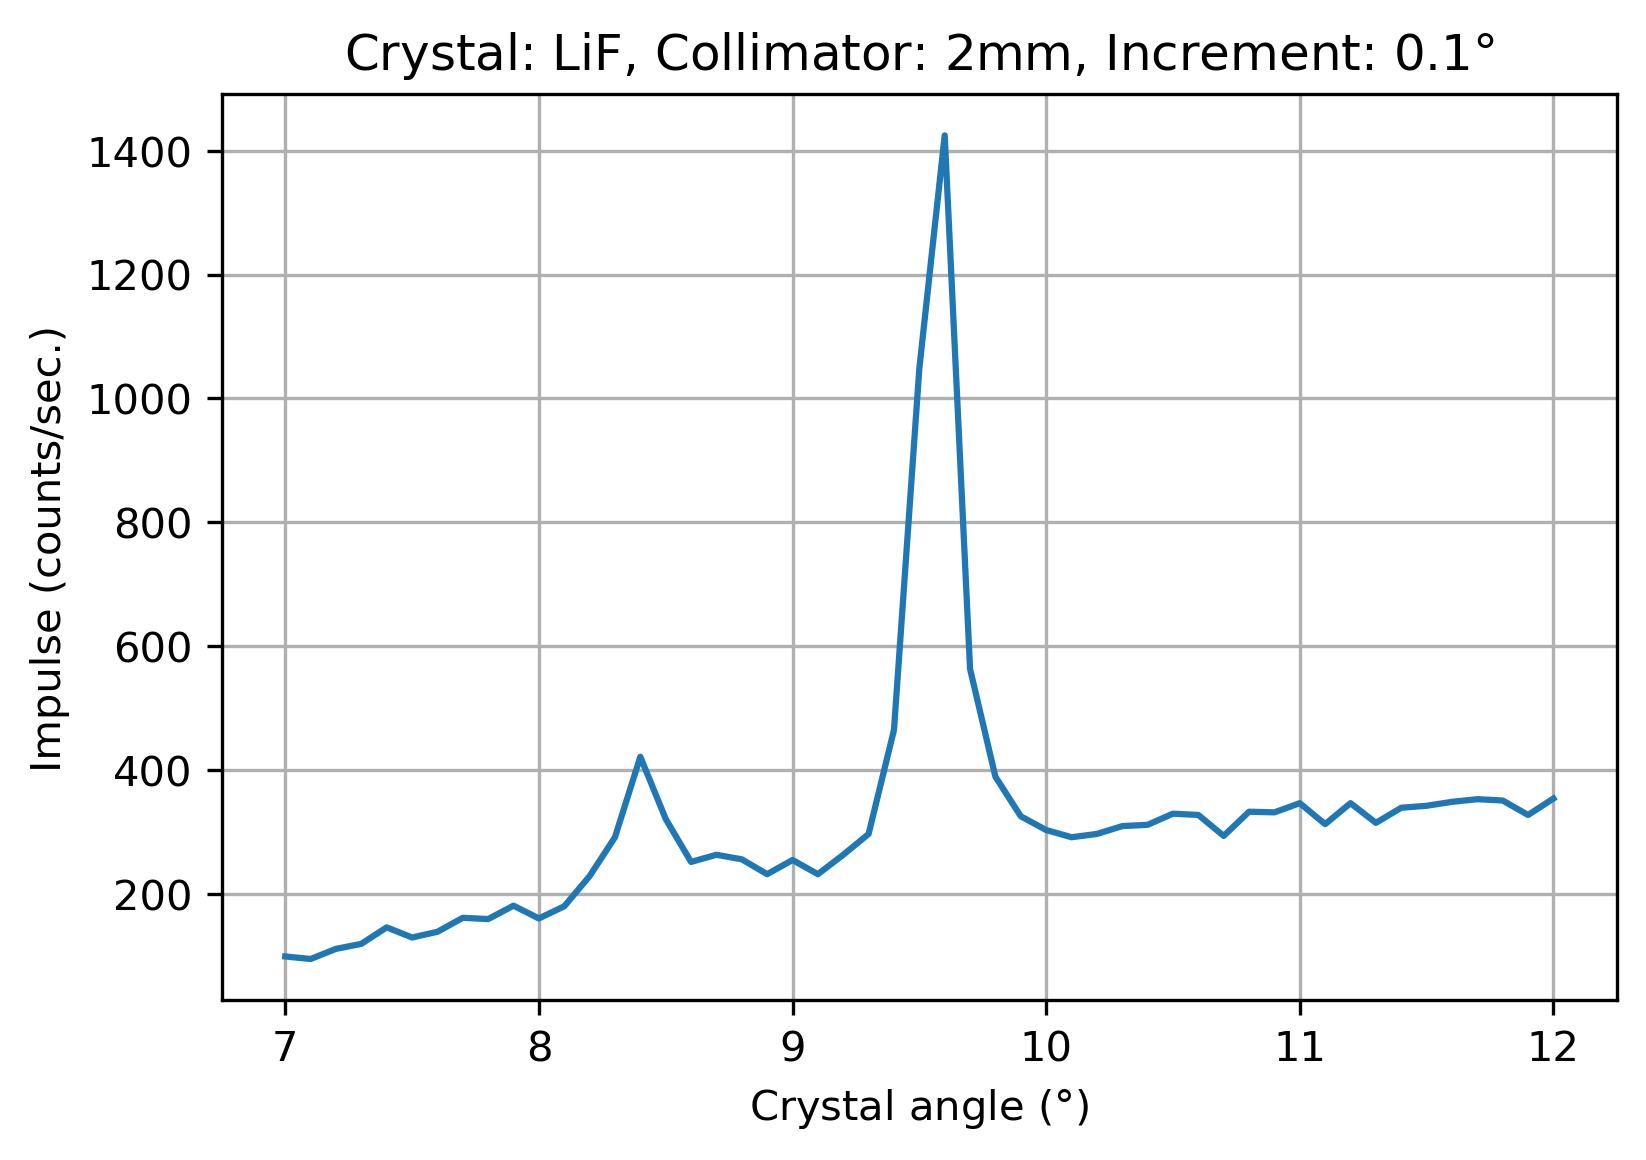

In [60]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019LiF2mm7.12.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
above = data[data["Angle"] > 7]
below = above[above["Angle"] < 12]
print(below)
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

    Angle  Impulse           N
1    18.1      251  256.801138
2    18.2      252  257.847992
3    18.3      255  260.989714
4    18.4      236  241.121419
5    18.5      232  236.947463
6    18.6      252  257.847992
7    18.7      248  253.661730
8    18.8      221  225.484895
9    18.9      228  232.776575
10   19.0      225  229.650421
11   19.1      225  229.650421
12   19.2      218  222.362757
13   19.3      247  252.615646
14   19.4      221  225.484895
15   19.5      216  220.282288
16   19.6      230  234.861636
17   19.7      245  250.524055
18   19.8      233  237.990664
19   19.9      321  330.549577
20   20.0      371  383.815603
21   20.1      349  360.317575
22   20.2      266  272.524230
23   20.3      221  225.484895
24   20.4      202  205.740360
25   20.5      186  189.166650
26   20.6      185  188.132405
27   20.7      201  204.703079
28   20.8      203  206.777831
29   20.9      214  218.202582
30   21.0      224  228.608752
31   21.1      196  199.519524
32   21.

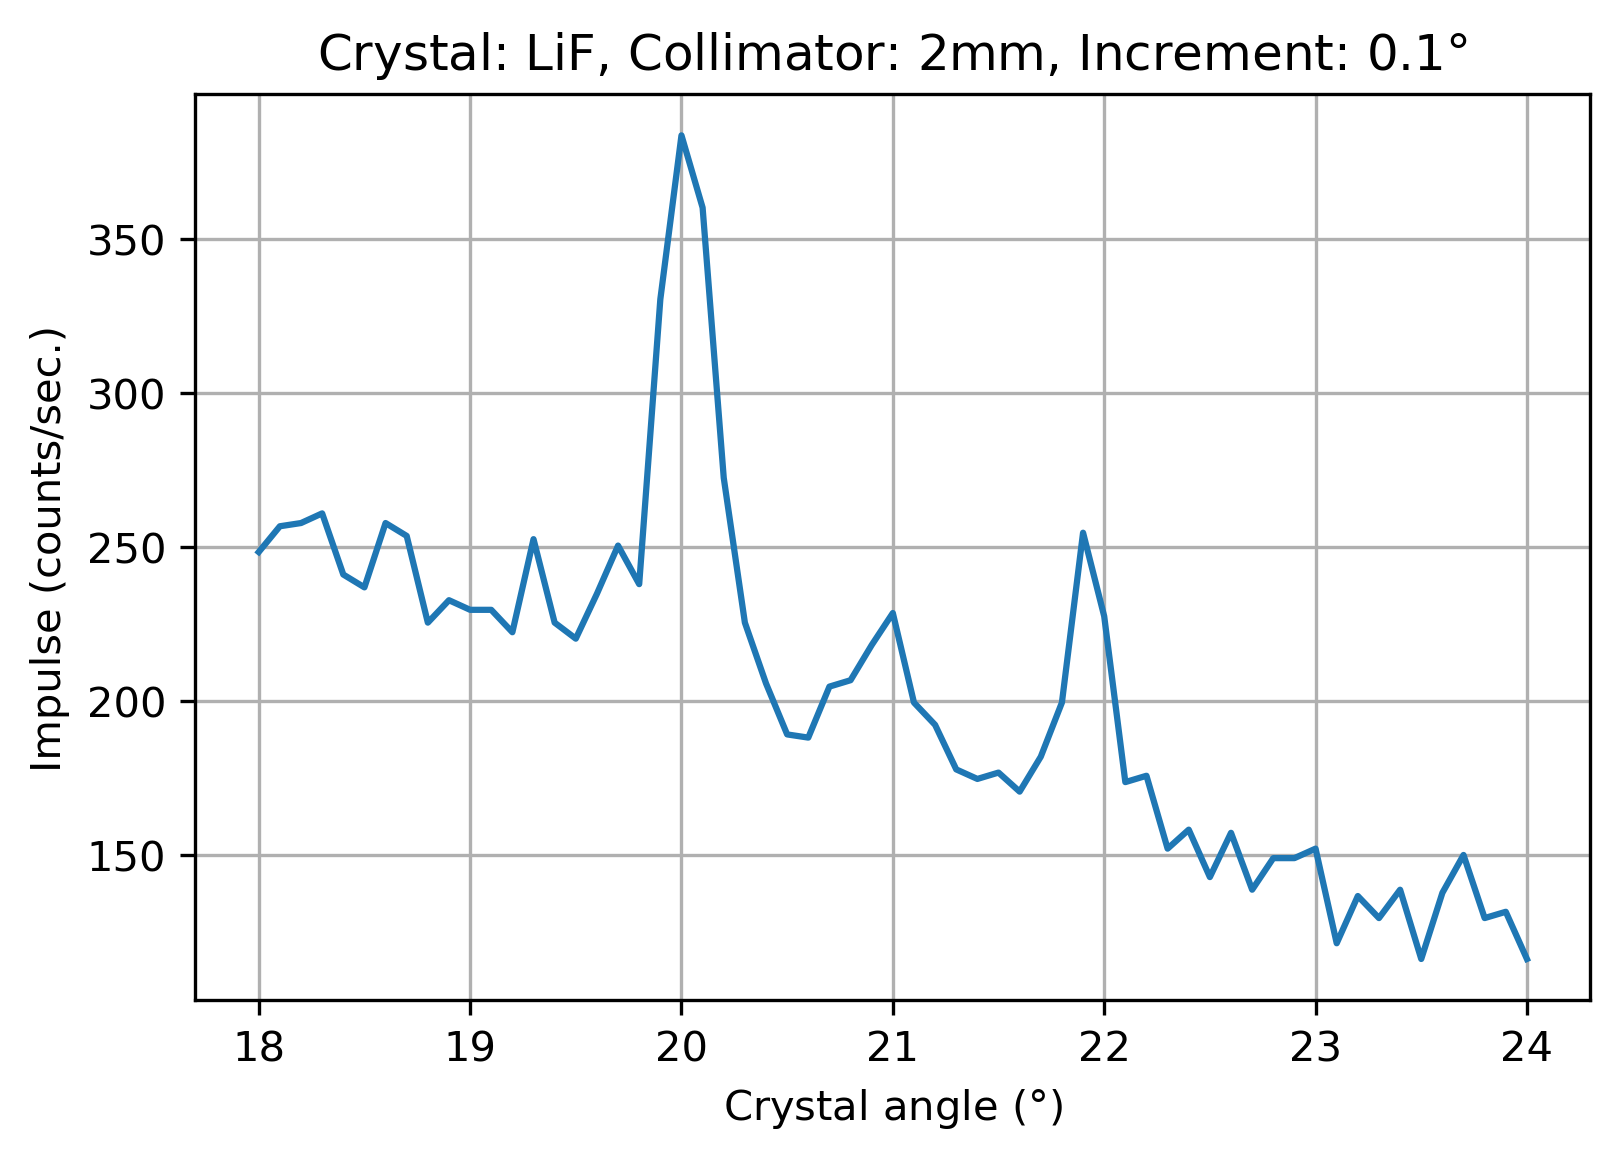

In [29]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019LiF2mm.18.24.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])

above = data[data["Angle"] > 18]
below = above[above["Angle"] < 24]
print(below)

data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

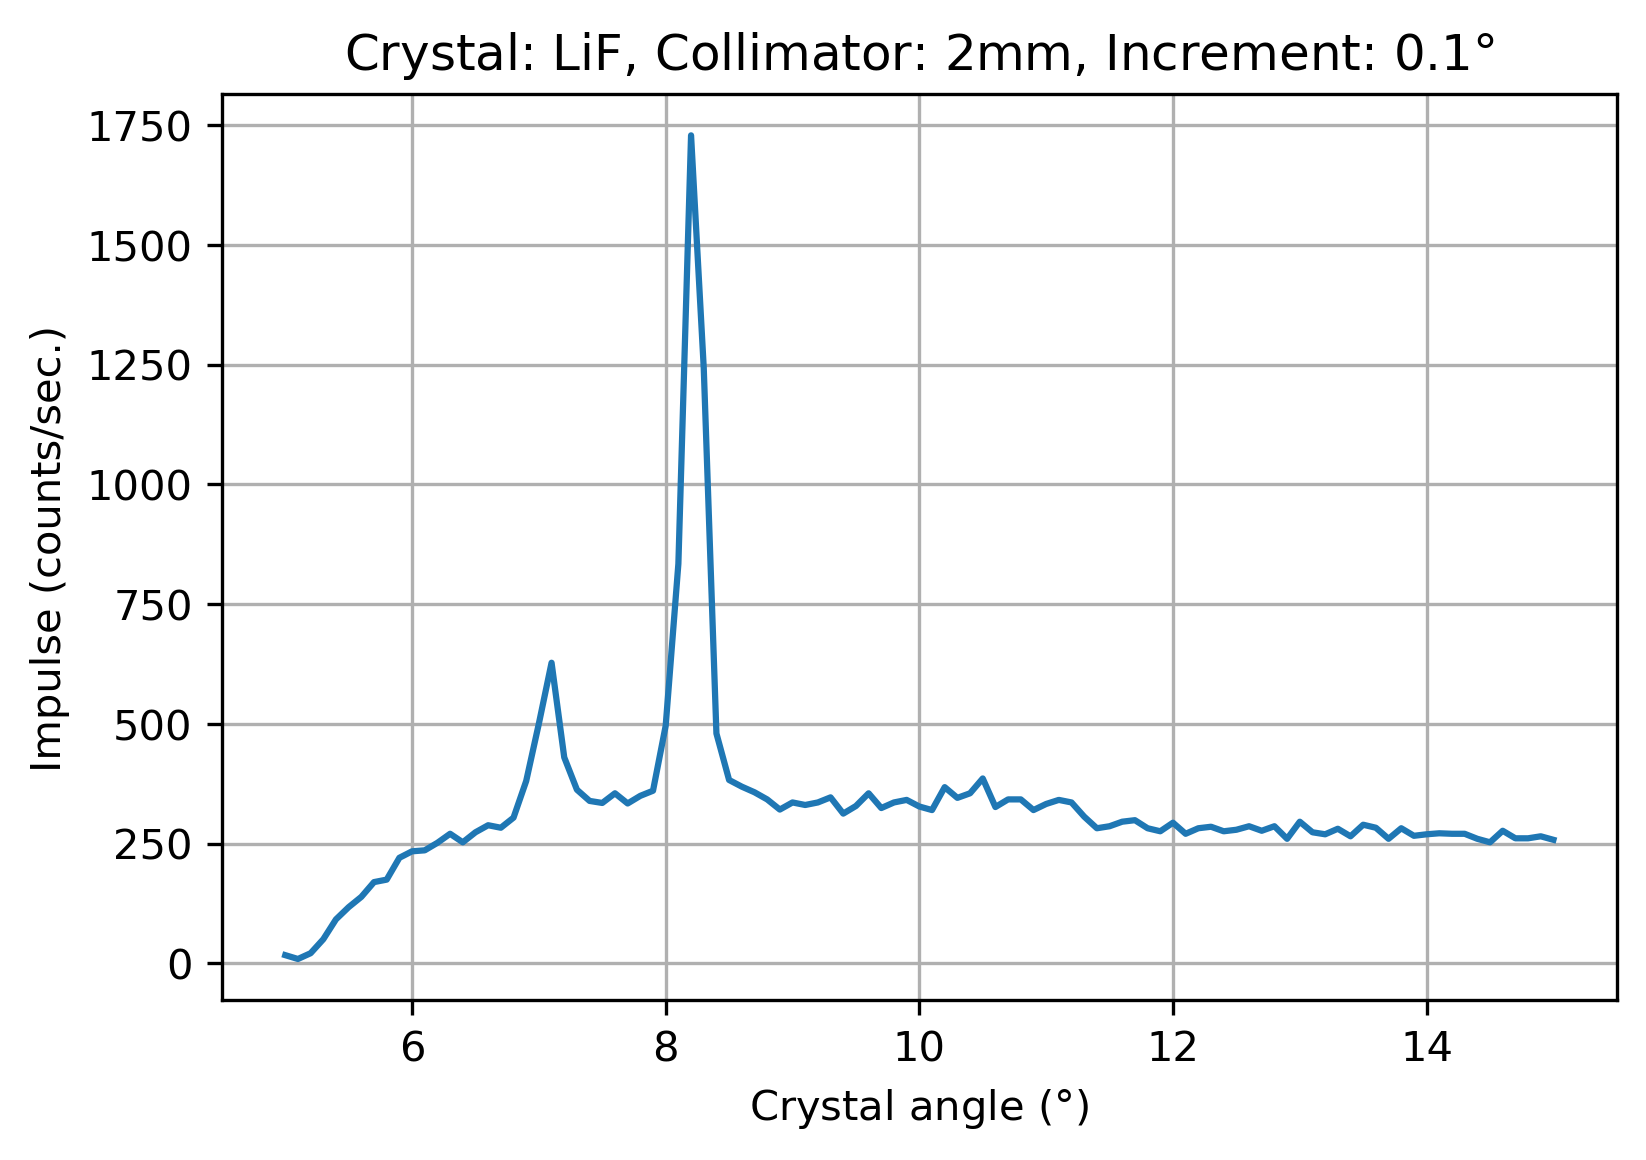

In [31]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019LiF2mm.5.15.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

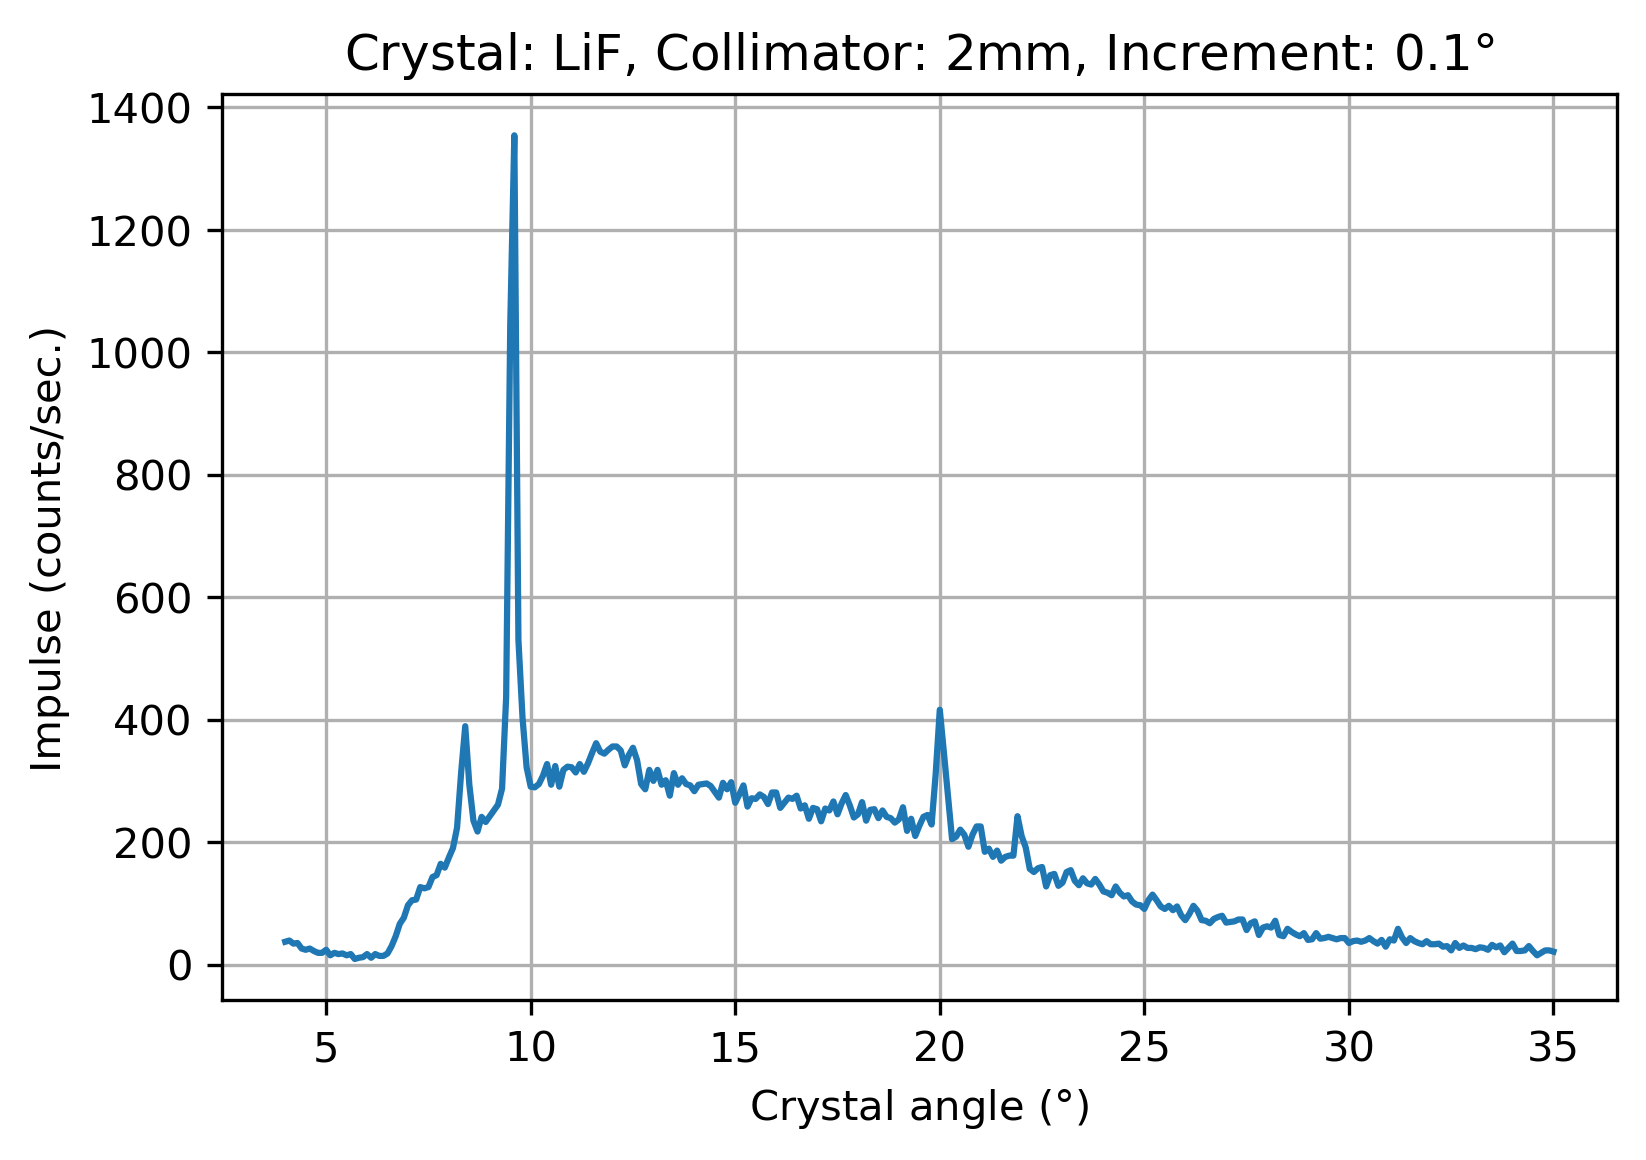

In [21]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019LiF2mm.4.35.0,1.2rerun.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

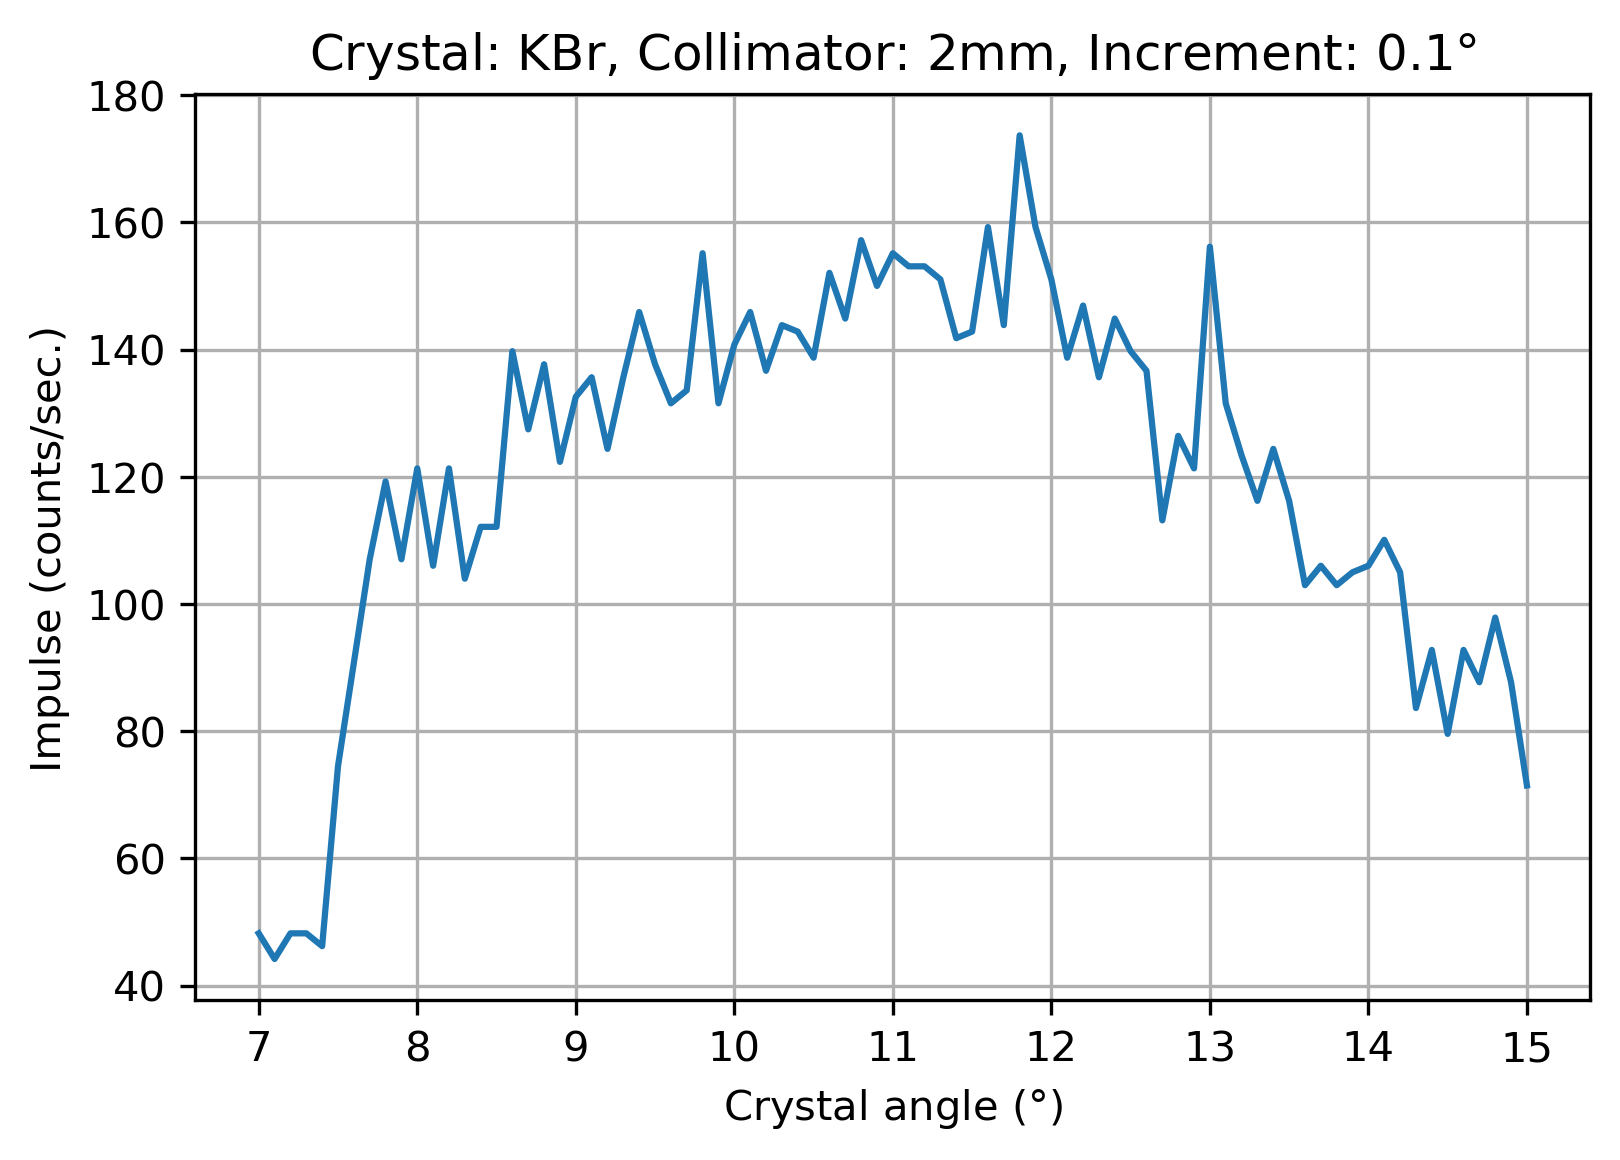

In [32]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019KBr2mm.7.15.0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

    Angle  Impulse           N
16    5.6       81   81.594826
17    5.7      103  103.963744
18    5.8       59   59.314962
19    5.9       42   42.159362


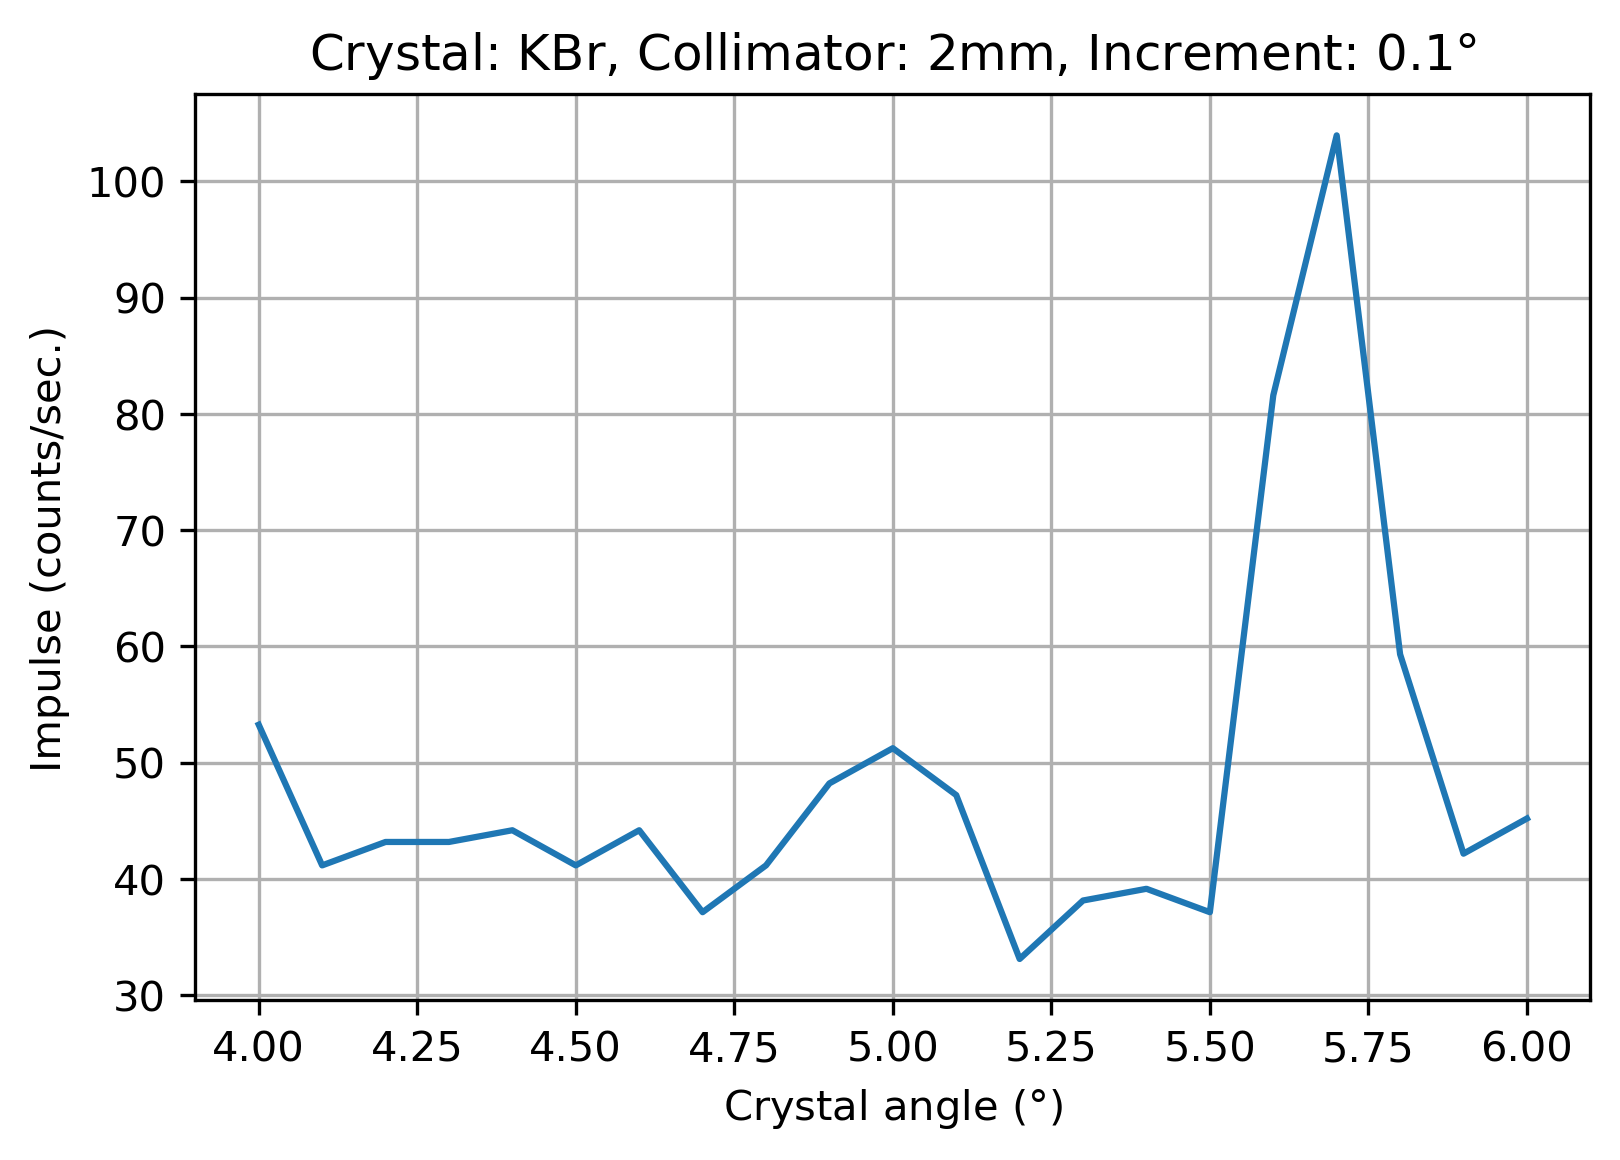

In [61]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
filename = 'AN1019KBr2mm.4.6,0,1.2.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
above = data[data["Angle"] > 5.5]
below = above[above["Angle"] < 6.0]
print(below)


data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

Experiments showed peak angles as follows (degrees):
<p>LiF
<p>8.4, 9.6, 20.0, 21.0, 21.9
<p>KBr
<p>5.7

Previous week had shown them at:
LiF
9.1, 10.2, 20.7, 21.6, 22.6
KBr
6.1

They seem to have been shifted down by 0.6-0.7 (LiF) and by 0.4 KBr




In [5]:
d_LiF = 201.4# crystal spacing pm
d_KBr = 329.5

d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs
peaks = np.array([[8.4,9.6,20.0,21.0,21.9,4,34],[330,1244,355,215,232,1,1]])#peaks from graph with their impulses
#there may be another peak between the last two, but not very clear.
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [ 8.4  9.6 20.  21.  21.9  4.  34. ]
wavelengths (A): [0.58842244 0.67174451 1.37765714 1.4435061  1.50239479 0.28097908
 2.25242902]
energies (keV): [21.07056558 18.45700765  8.99962208  8.58908292  8.25242053 44.12568279
  5.50445475]


In [6]:
d_KBr = 329.5
d= 3.295E-10#in metres
peaks = np.array([[5.7,12.5,4,34],[127,193,1,1]])#peaks from graph with their impulses
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles: (deg.)', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: (deg.) [ 5.7 12.5  4.  34. ]
wavelengths (A): [0.65451715 1.42633706 0.45969516 3.68508123]
energies (keV): [18.94280933  8.69247107 26.97090293  3.36448312]


# 26 October


    Angle  Impulse           N
19   19.9      326  335.853955
20   20.0      399  413.861776
21   20.1      342  352.861064
22   20.2      259  265.181378
23   20.3      217  221.322427
24   20.4      196  199.519524
25   20.5      200  203.665988
26   20.6      203  206.777831
27   20.7      197  200.555855
28   20.8      196  199.519524
29   20.9      223  227.567275
30   21.0      202  205.740360
31   21.1      195  198.483383
32   21.2      186  189.166650
33   21.3      176  178.832710
34   21.4      172  174.704424
35   21.5      167  169.548311
36   21.6      165  167.487185
37   21.7      170  172.641414
38   21.8      188  191.235708
39   21.9      225  229.650421
40   22.0      200  203.665988
41   22.1      169  171.610191
42   22.2      151  153.080362
43   22.3      164  166.456904
44   22.4      142  143.838253


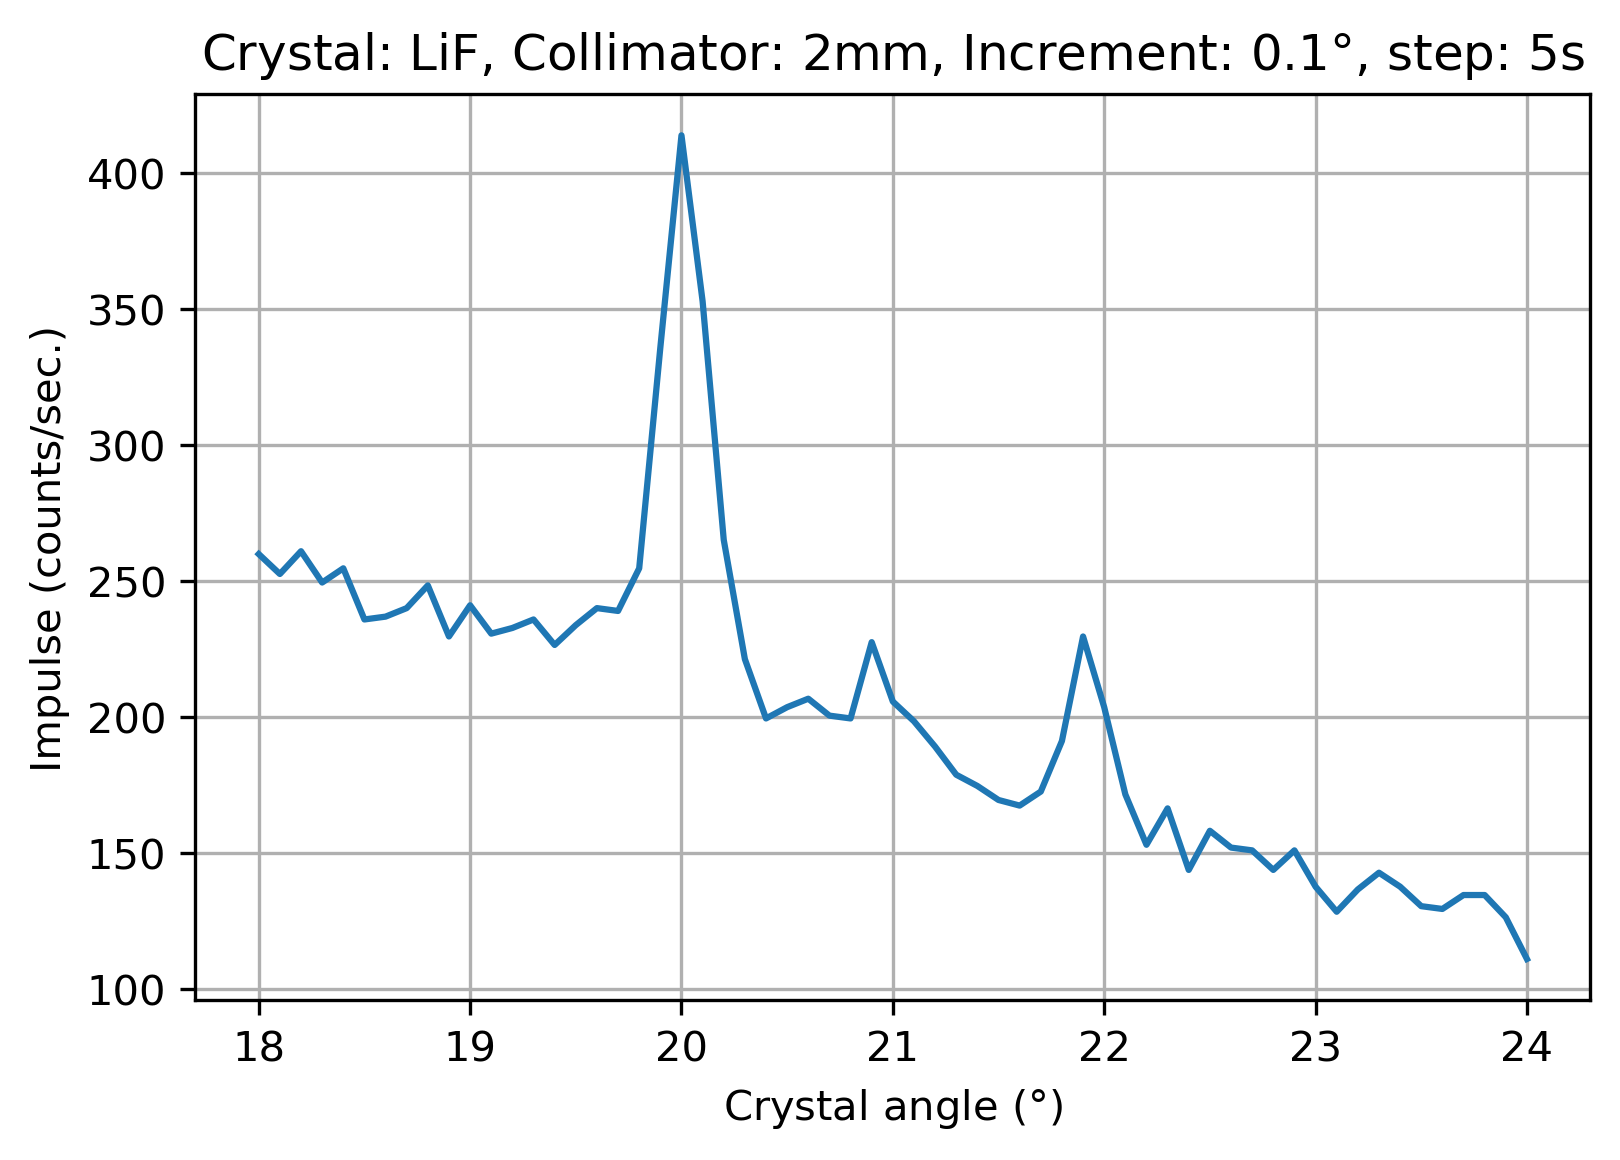

In [65]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
time_step = 5
filename = 'AN1026LiF2mm.18.24.0,1.5.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
above = data[data["Angle"] > 19.8]
below = above[above["Angle"] < 22.5]
print(below)


data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

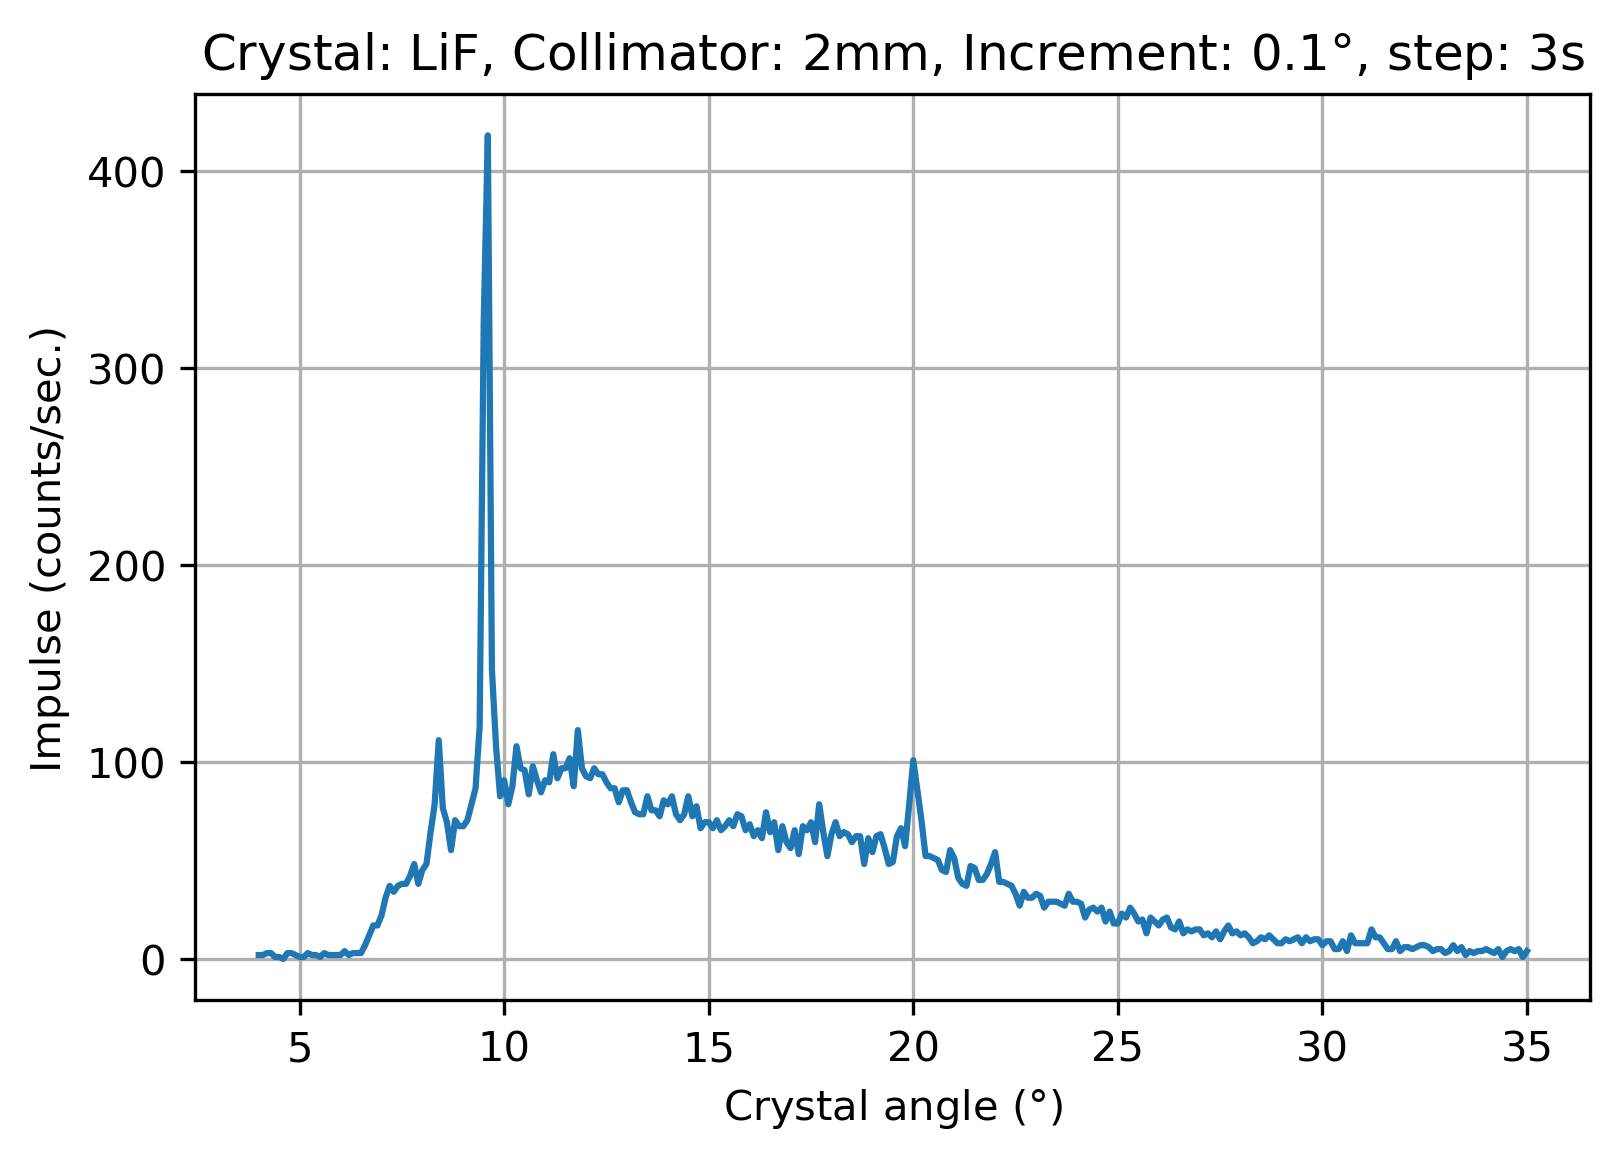

In [40]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
time_step = 3
filename = 'AN1026LiF1mm.4.35.0,1.3.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

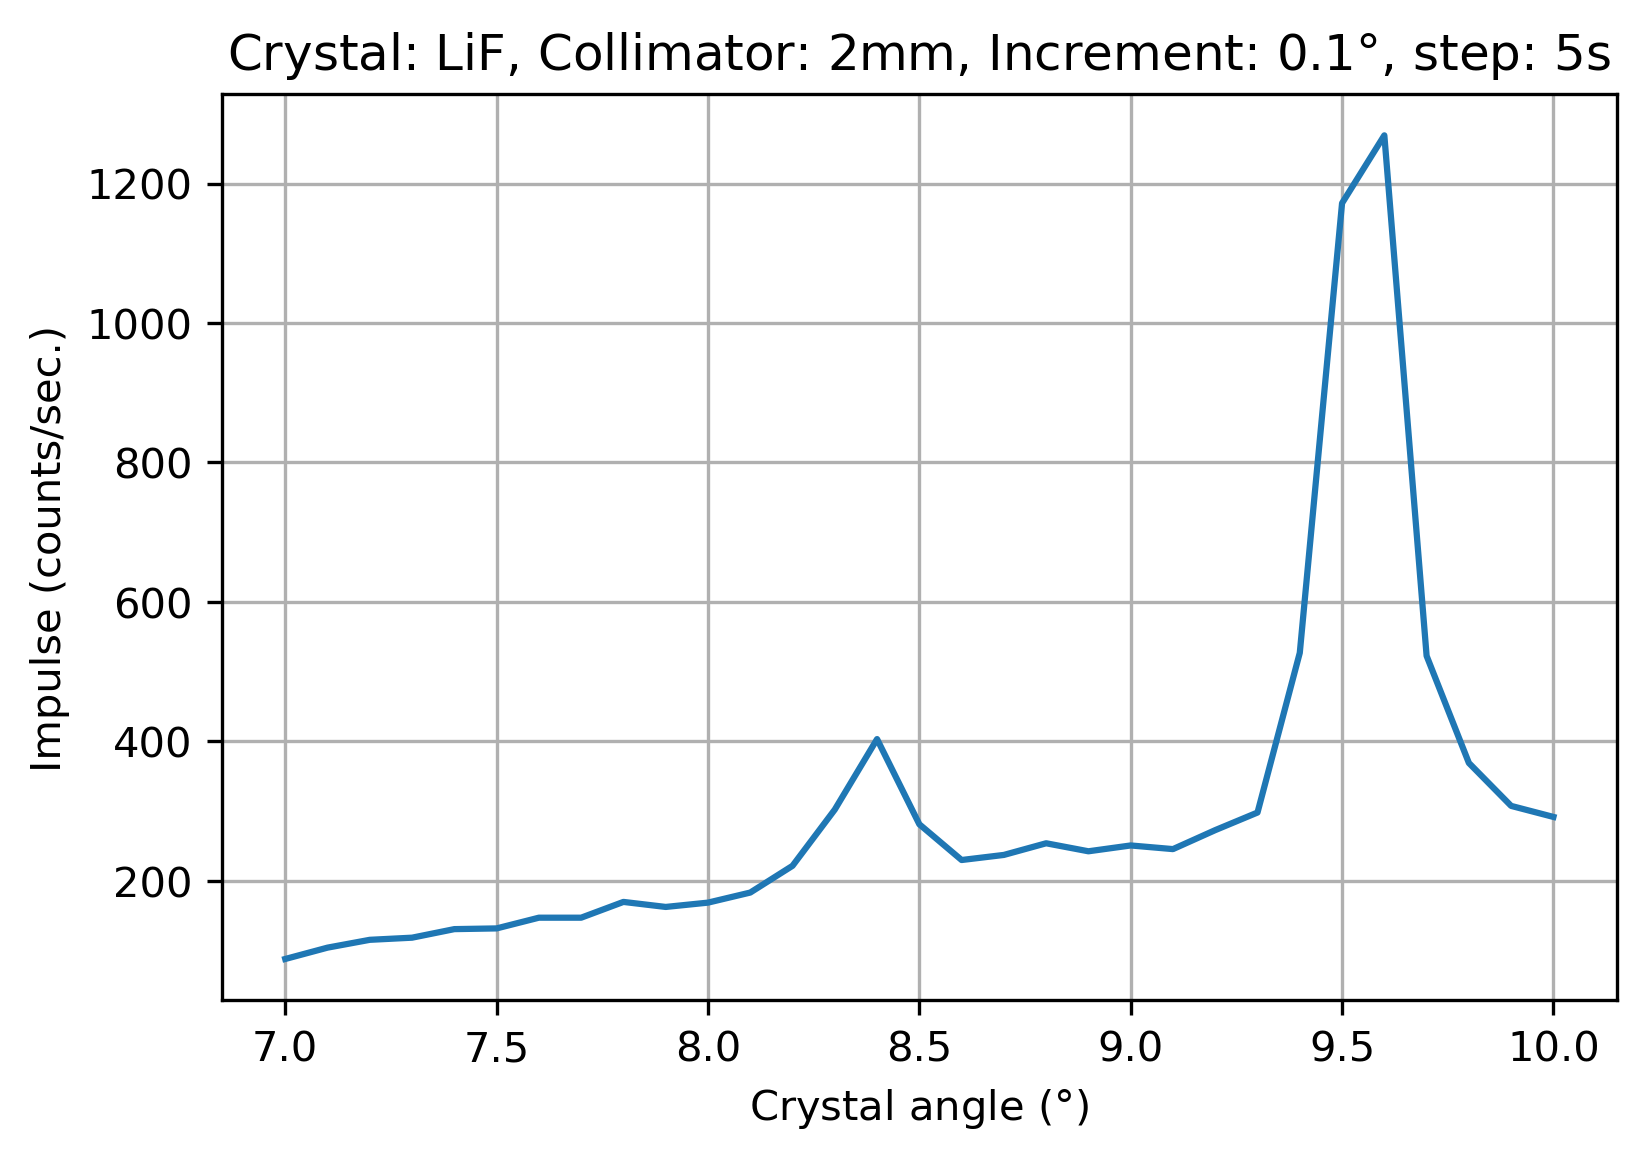

In [7]:
crystal = 'LiF'
collimator = 2#mm
increment = 0.1#degree
time_step = 5
filename = 'AN10292mm.7.10.0,1.5.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
above = data[data["Angle"] > 8]
below = above[above["Angle"] < 10]
#print(below)

data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

    Angle  Impulse           N
16    5.6      102  102.945035
17    5.7      105  106.001716
18    5.8       89   89.718646
19    5.9       75   75.509690


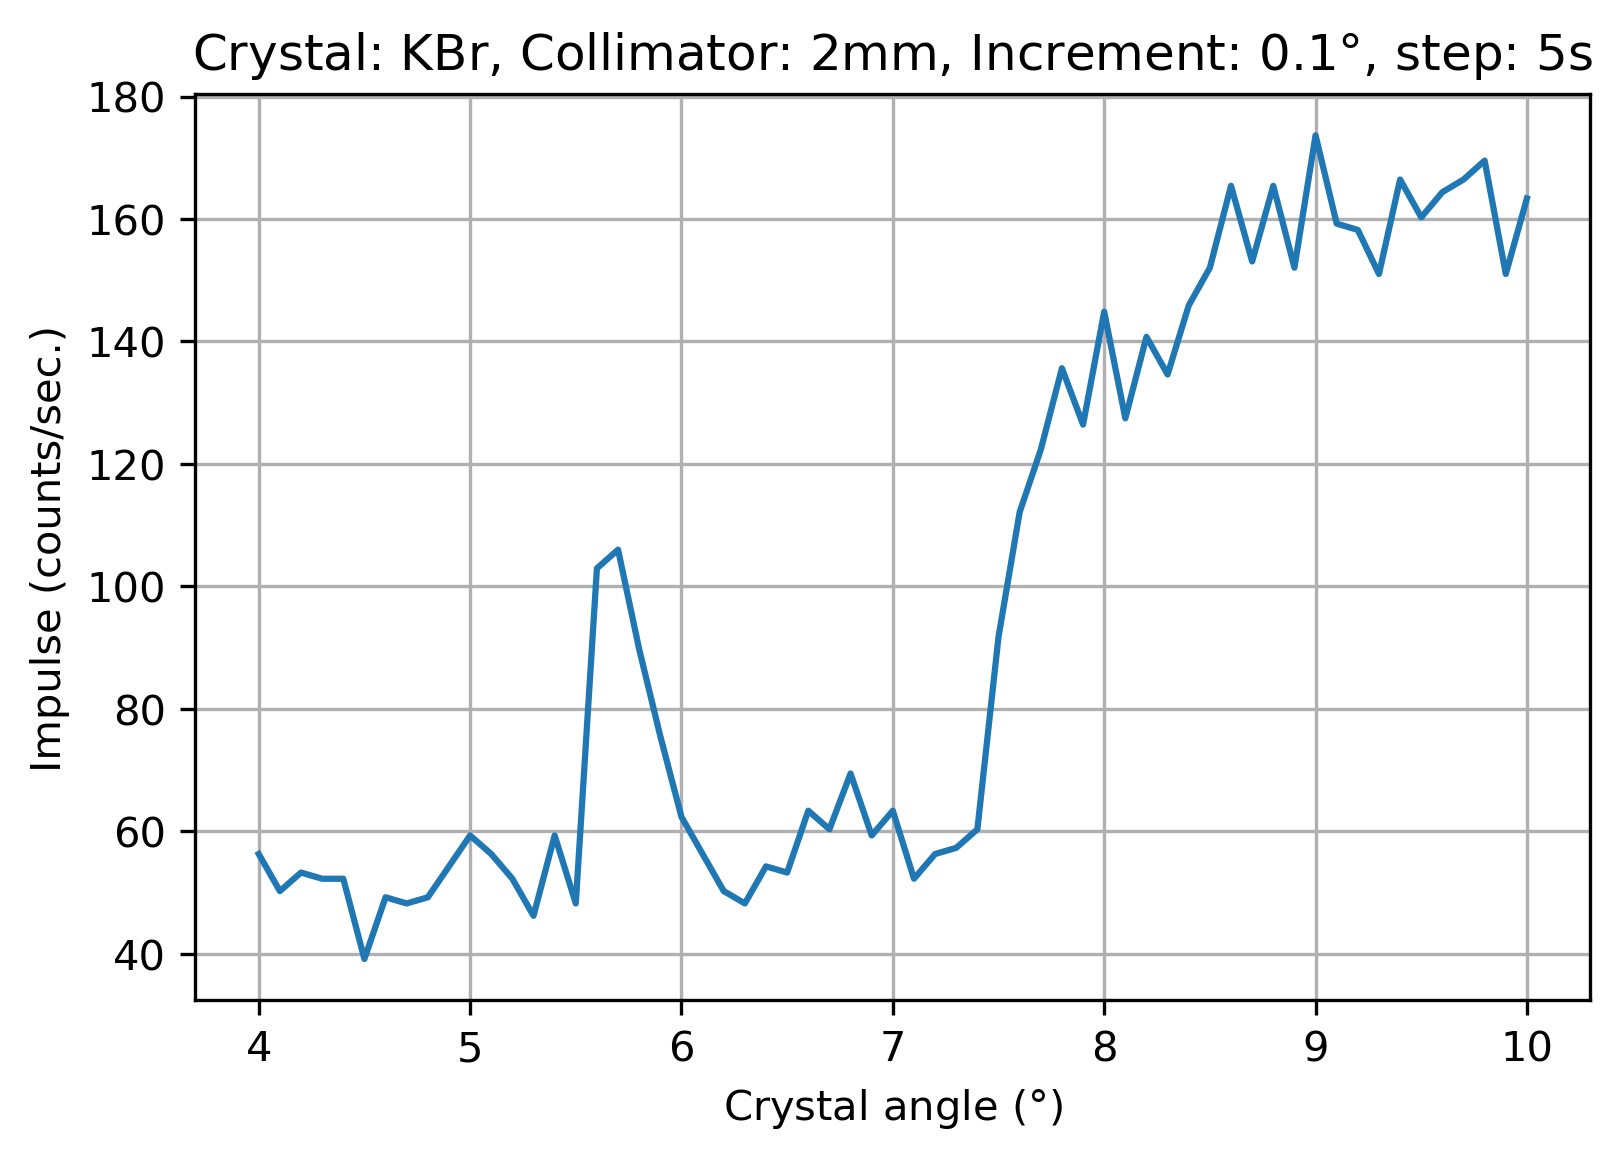

In [67]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
time_step = 5
filename = 'AN1026KBr2mm.4.10.0,1.5.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
above = data[data["Angle"] > 5.5]
below = above[above["Angle"] < 6.0]
print(below)

data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

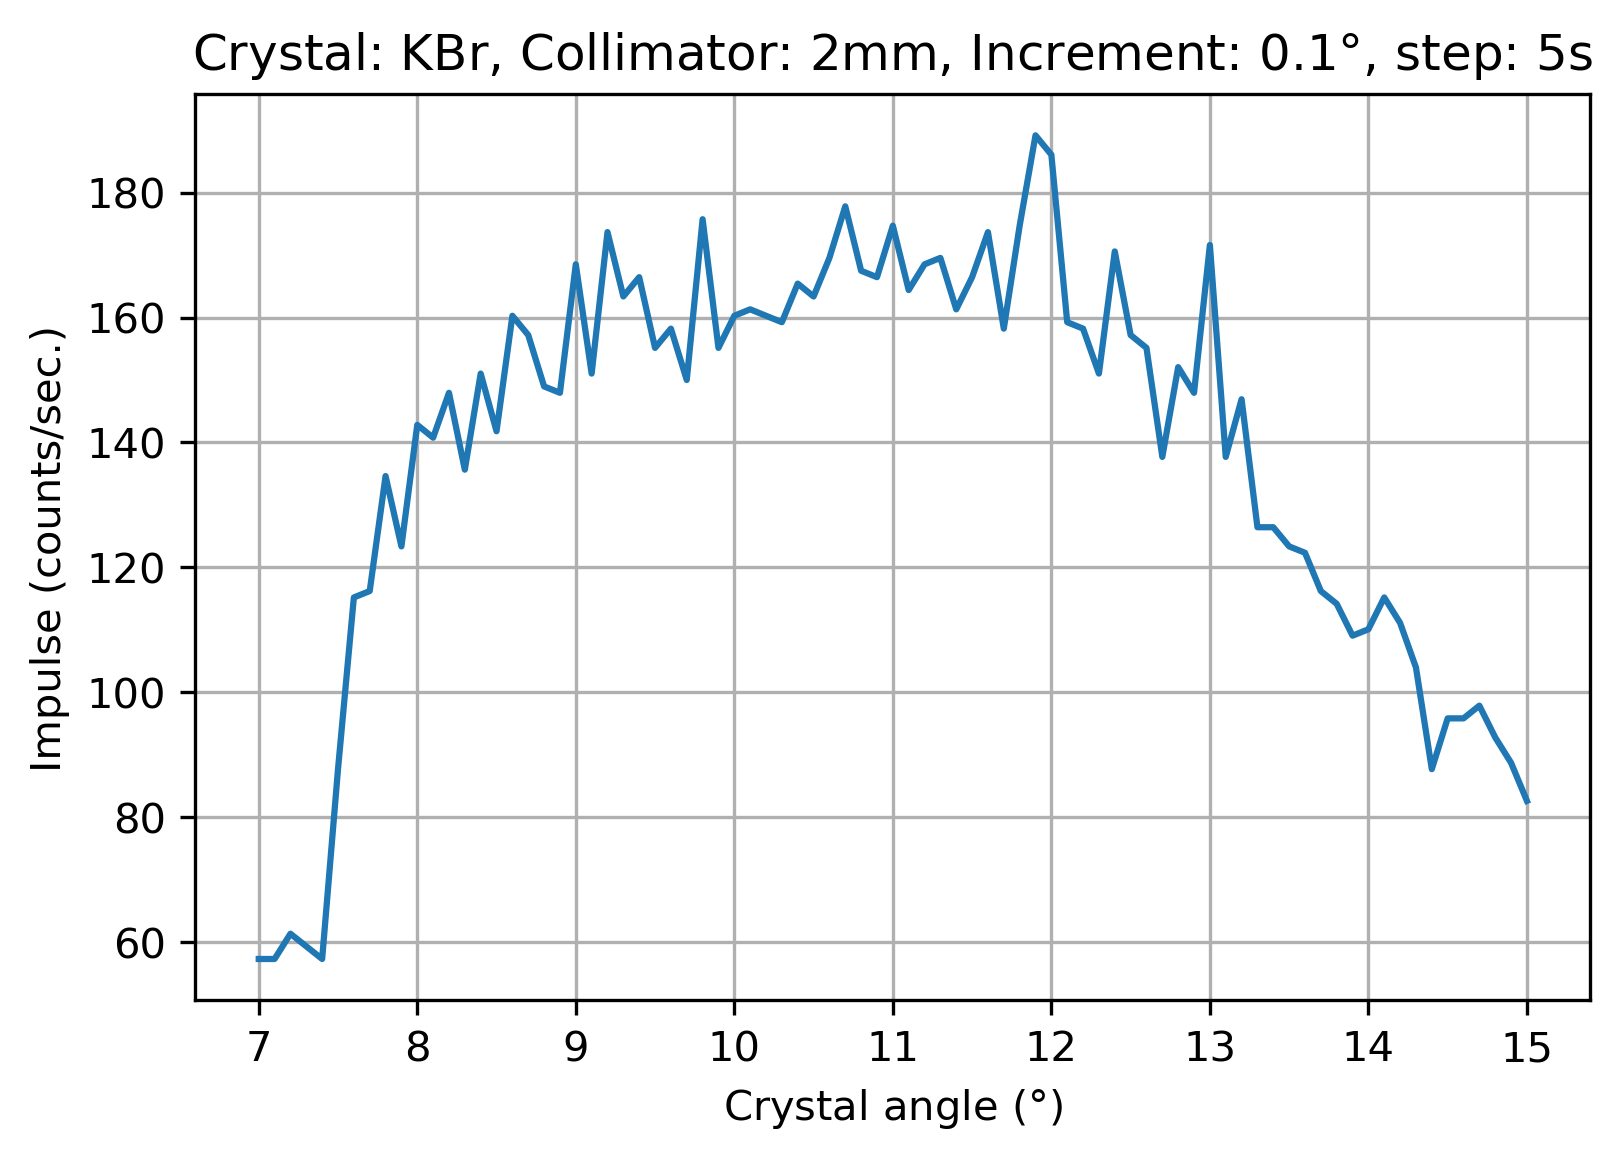

In [68]:
crystal = 'KBr'
collimator = 2#mm
increment = 0.1#degree
time_step = 5
filename = 'AN1029KBr2mm.7.15.0,1.5.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'Crystal: {crystal}, Collimator: {collimator}mm, Increment: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

# 26 October showed peak angles as follows (degrees):
<p>LiF
<p>8.4, 9.6, 20.0, 21.0, 21.9
<p>KBr
<p>5.7


# 22 October showed peak angles as follows (degrees):
<p>LiF
<p>8.4, 9.6, 20.0, 21.0, 21.9
<p>KBr
<p>5.7

# 15 October showed peak angles as follows (degrees):
<p>LiF
<p>9.1, 10.2, 20.7, 21.6, 22.6
<p>KBr
<p>6.1

Maybe the experiments on 15 October were wrong.

# Metal Film experiments

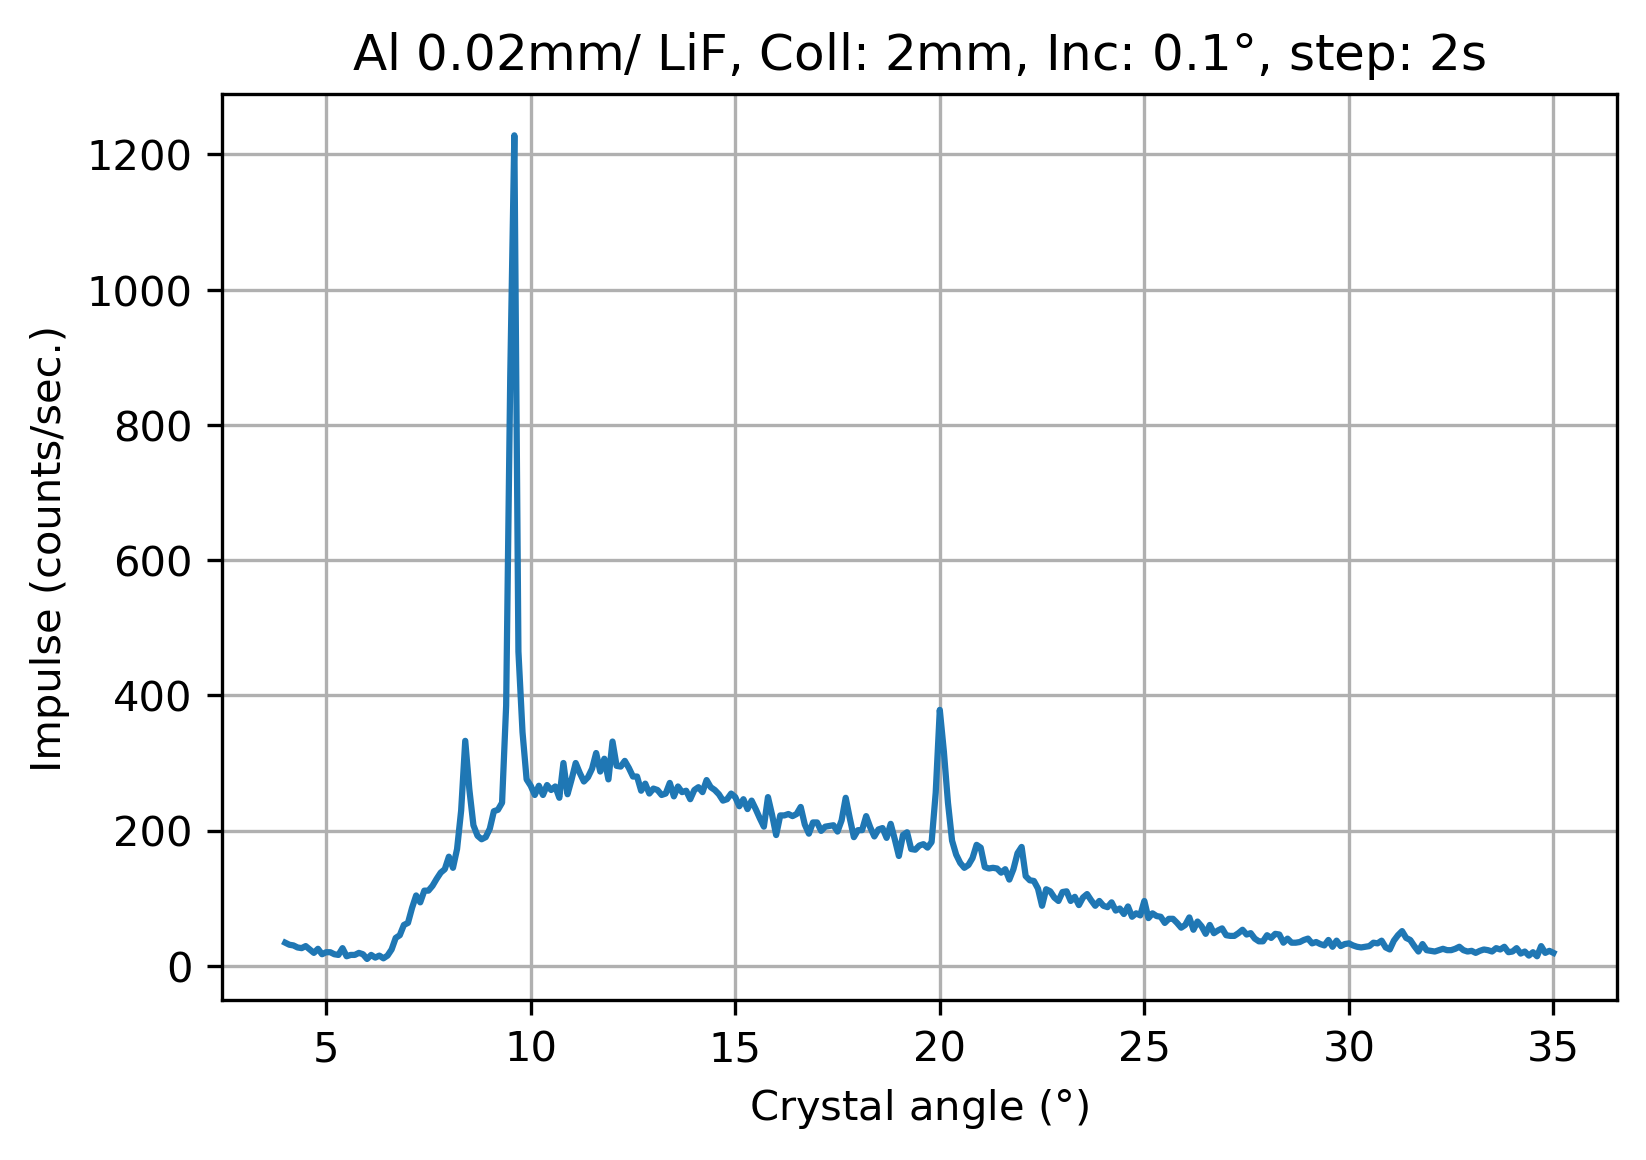

In [51]:
crystal = 'LiF'
metal = 'Al'
width = 0.02
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Al0.02mm4.35.0,1.2.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

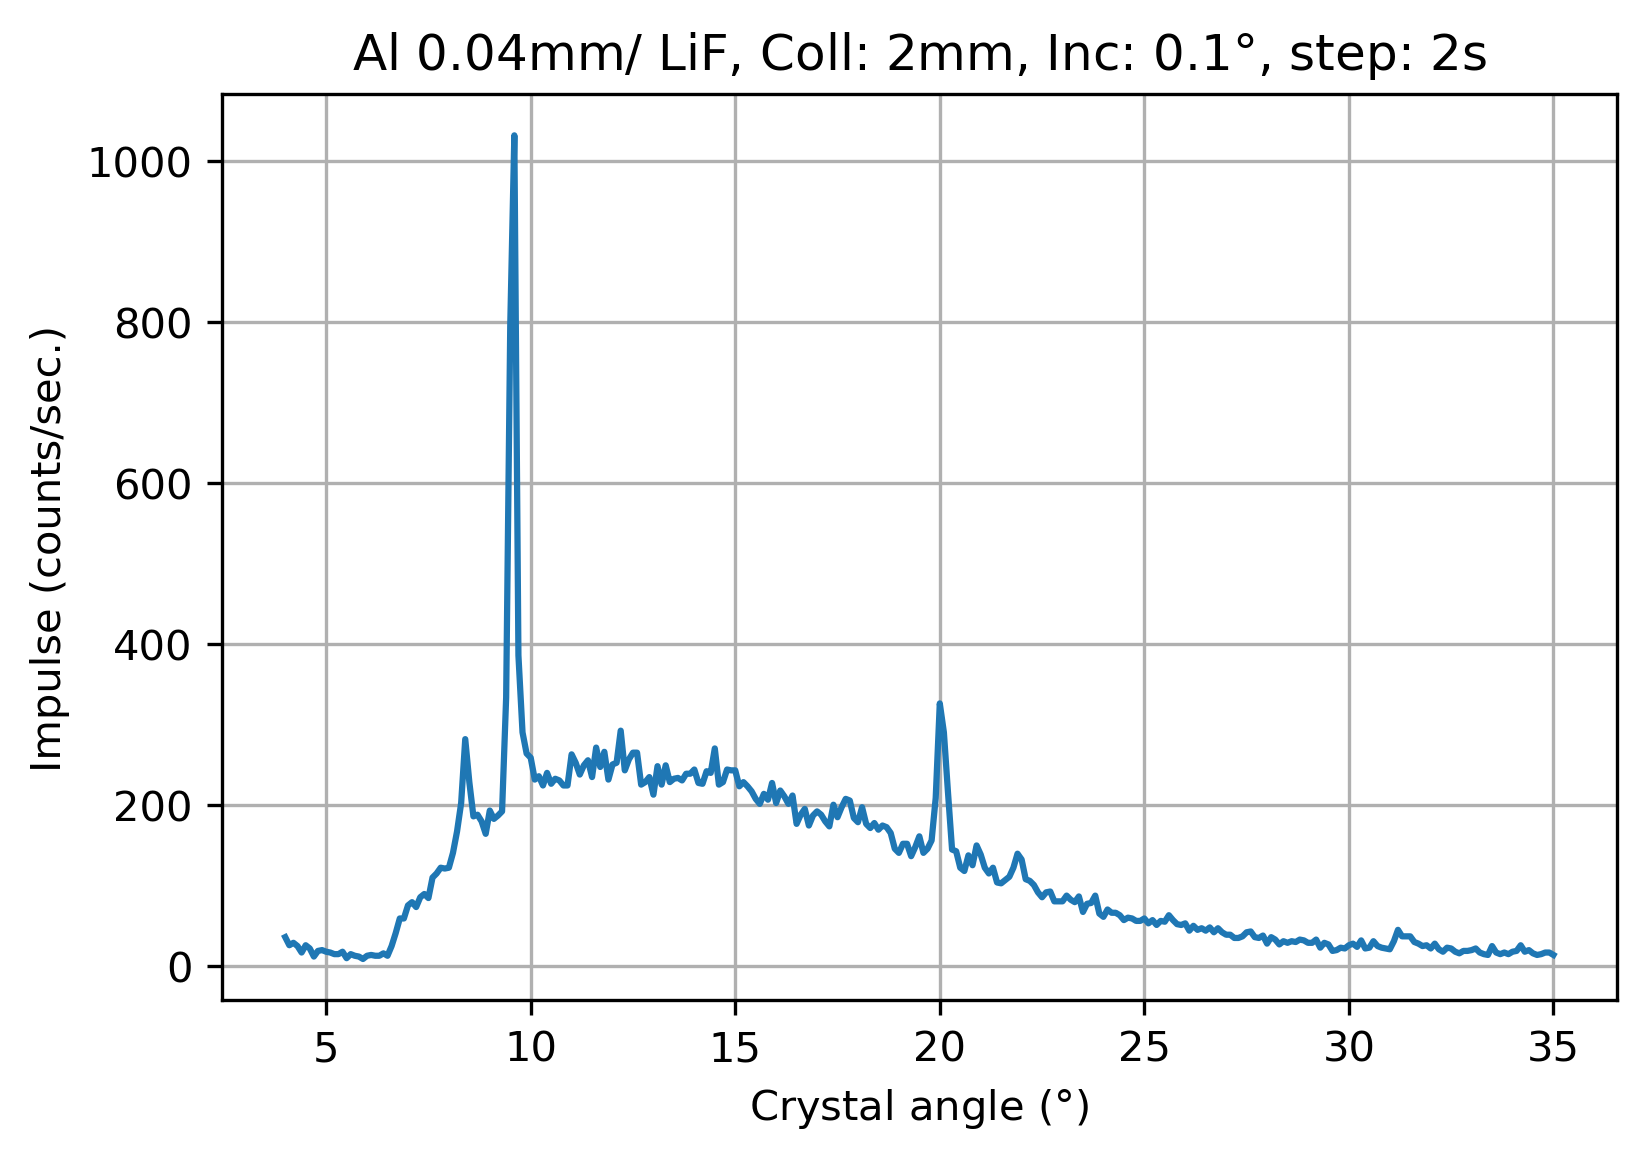

In [52]:
crystal = 'LiF'
metal = 'Al'
width = 0.04
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Al0.04mm.4.35.0,1.2C.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

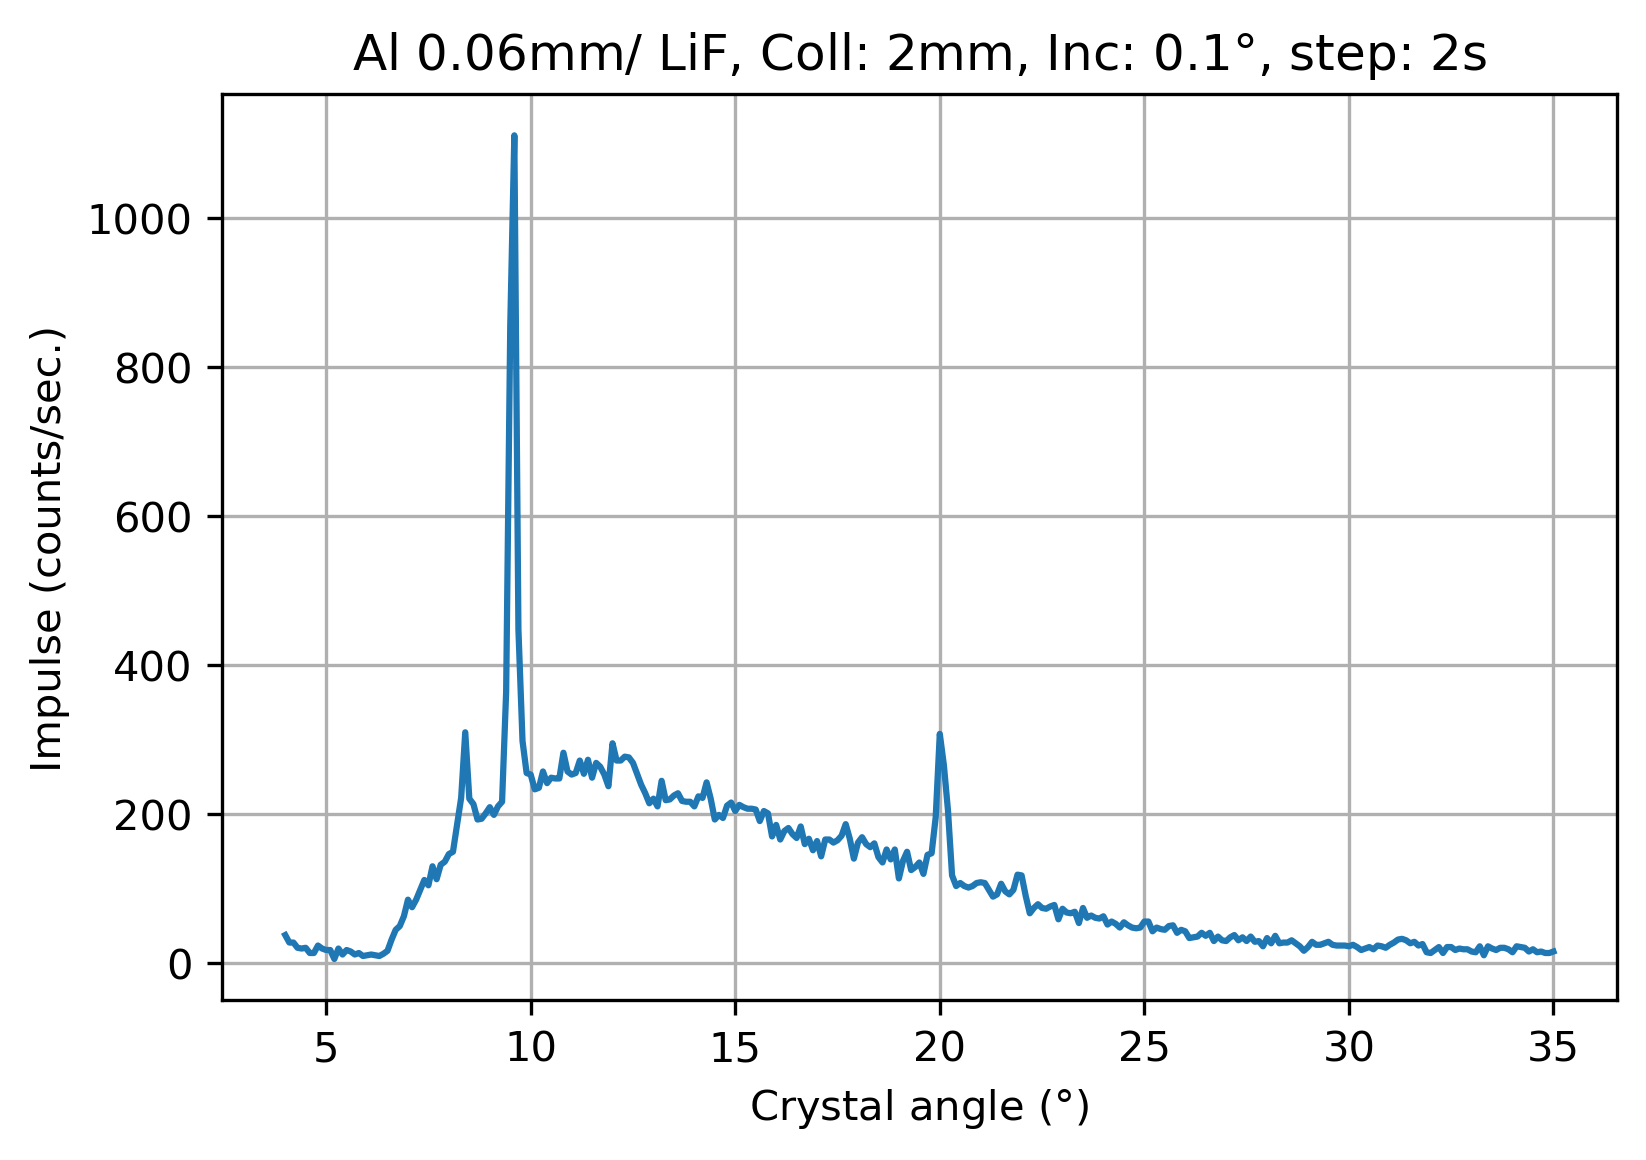

In [53]:

crystal = 'LiF'
metal = 'Al'
width = 0.06
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Al0.06mm.4.35.0,1.2.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

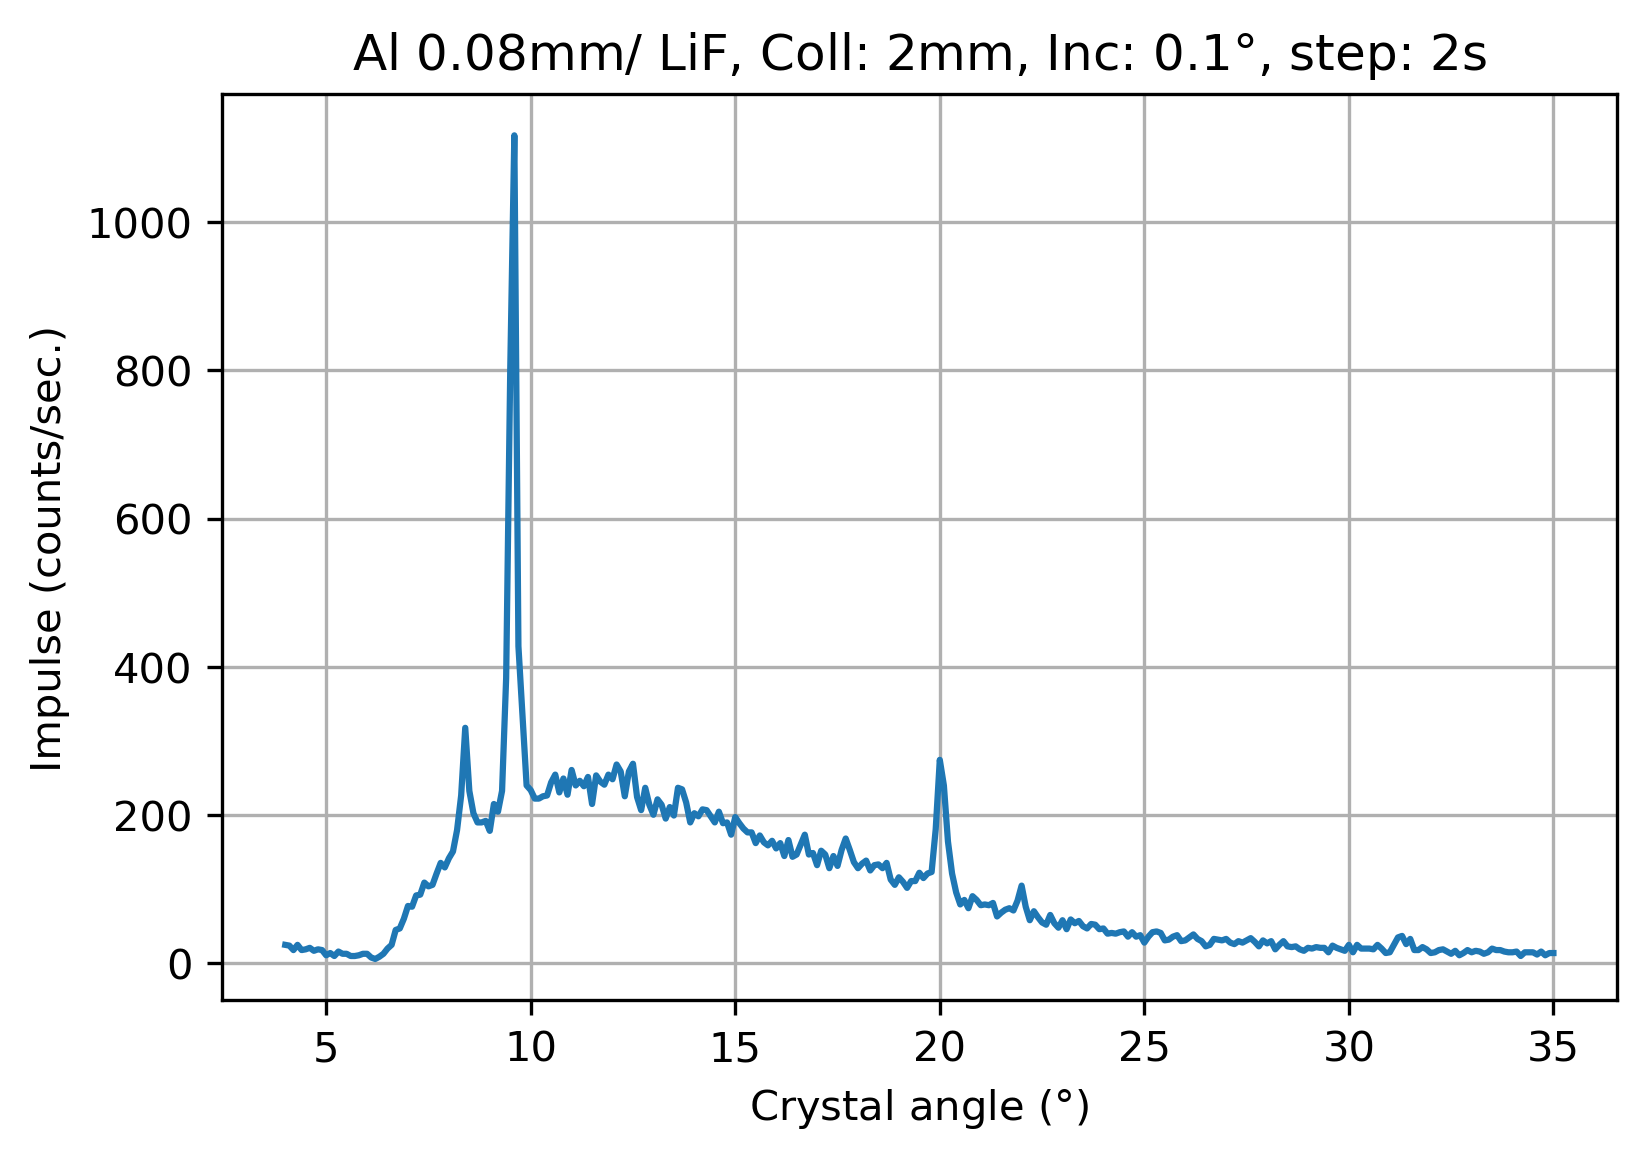

In [54]:
crystal = 'LiF'
metal = 'Al'
width = 0.08
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Al0.08mm.4.35.0,1.2.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

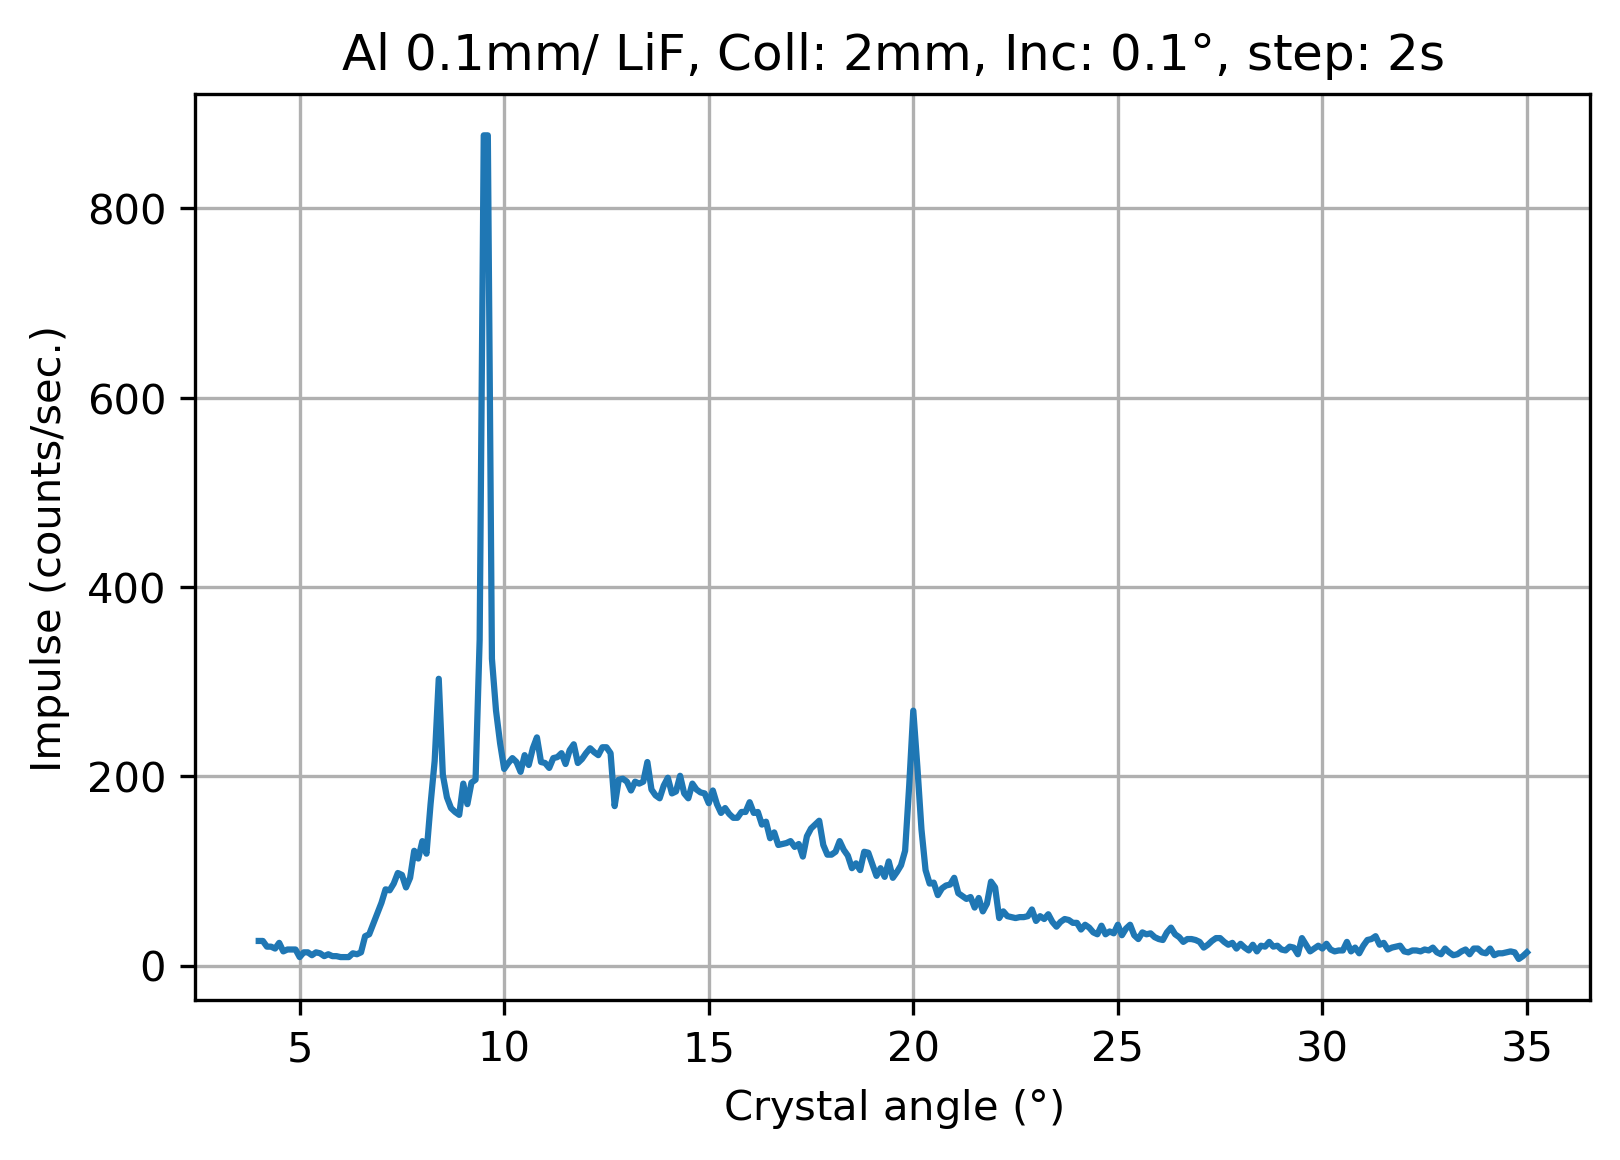

In [50]:
crystal = 'LiF'
metal = 'Al'
width = 0.1
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Al0.1mm.4.35.0,1.2.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

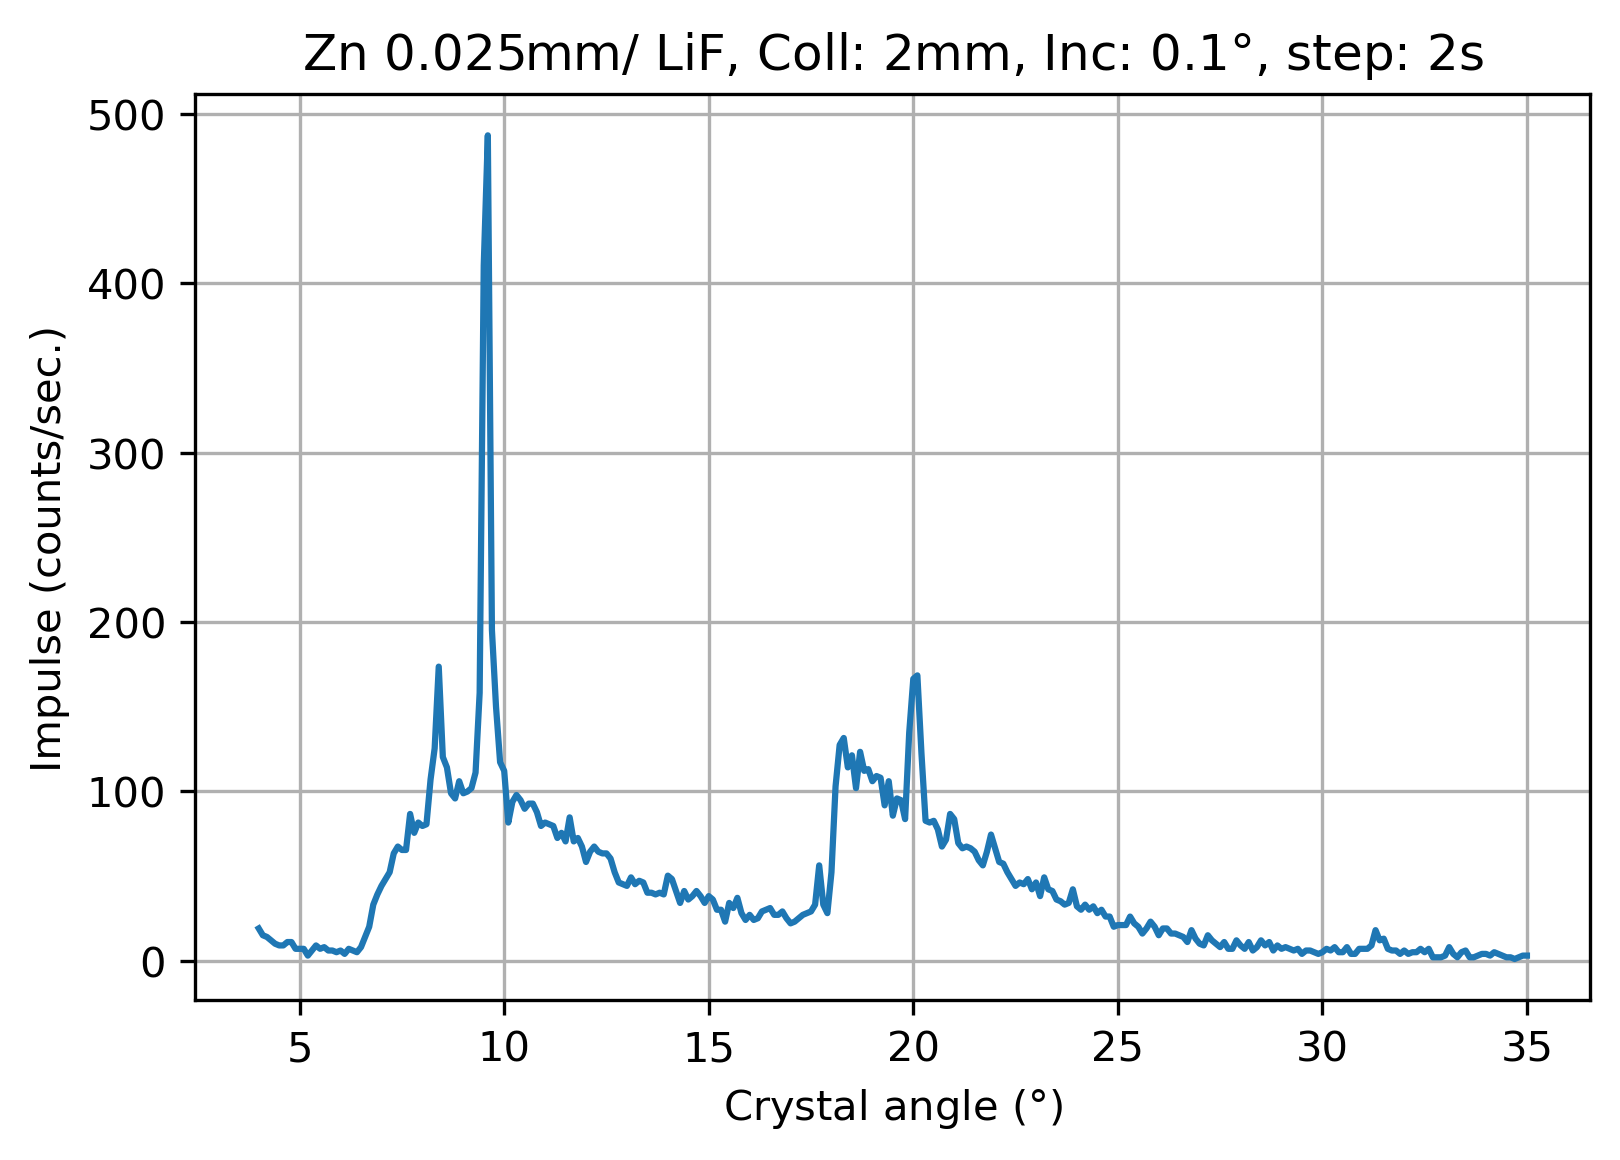

In [59]:

crystal = 'LiF'
metal = 'Zn'
width = 0.025
collimator = 2#mm
increment = 0.1#degree
time_step = 2

filename = 'AN1026Zn0.025mm.4.35.0,1.2.csv'

data=pd.read_csv(filename,encoding='latin1', skiprows=2)
data.columns = ['Angle', 'Impulse']
data['N'] = data['Impulse'] / (1-90E-6*data['Impulse'])
data.plot(x="Angle", y="N", 
          title = f'{metal} {width}mm/ {crystal}, Coll: {collimator}mm, Inc: {increment}$\degree$, step: {time_step}s',
         xlabel = 'Crystal angle ($\degree$)', ylabel = 'Impulse (counts/sec.)', legend =None, grid = True);

# 2 November 

Whole run of LiF done, highest peak at 10.3 degrees. Chose 5 degrees as low count away from other peaks.

In [3]:
thick_Al = np.array([0.00, 0.02, 0.04, 0.06, 0.08, 0.1])
I_Al_5 = np.array([])
I_Al_103 = np.array([])

filename = 'nofilm.5.0.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'Al.0.02mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'Al.0.04mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'Al.0.06mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'Al.0.08mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'Al.0.1mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_5 = np.append(I_Al_5, data['Count'].mean())

filename = 'nofilm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

filename = 'Al.0.02mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

filename = 'Al.0.04.mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

filename = 'Al.0.06mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

filename = 'Al.0.08mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

filename = 'Al.0.1mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Al_103 = np.append(I_Al_103, data['Count'].mean())

#Deadtime adjustment
I_Al_5 = I_Al_5 / (1- 90E-6 * I_Al_5)
I_Al_103 = I_Al_103 / (1- 90E-6 * I_Al_103)


print(I_Al_5)
print(I_Al_103)

[28.724065   27.11601394 22.29464503 18.98237444 19.33358243 20.18660841]
[1755.59069452 1642.80663734 1791.42711492 1714.62079569 1670.73416938
 1645.50821893]


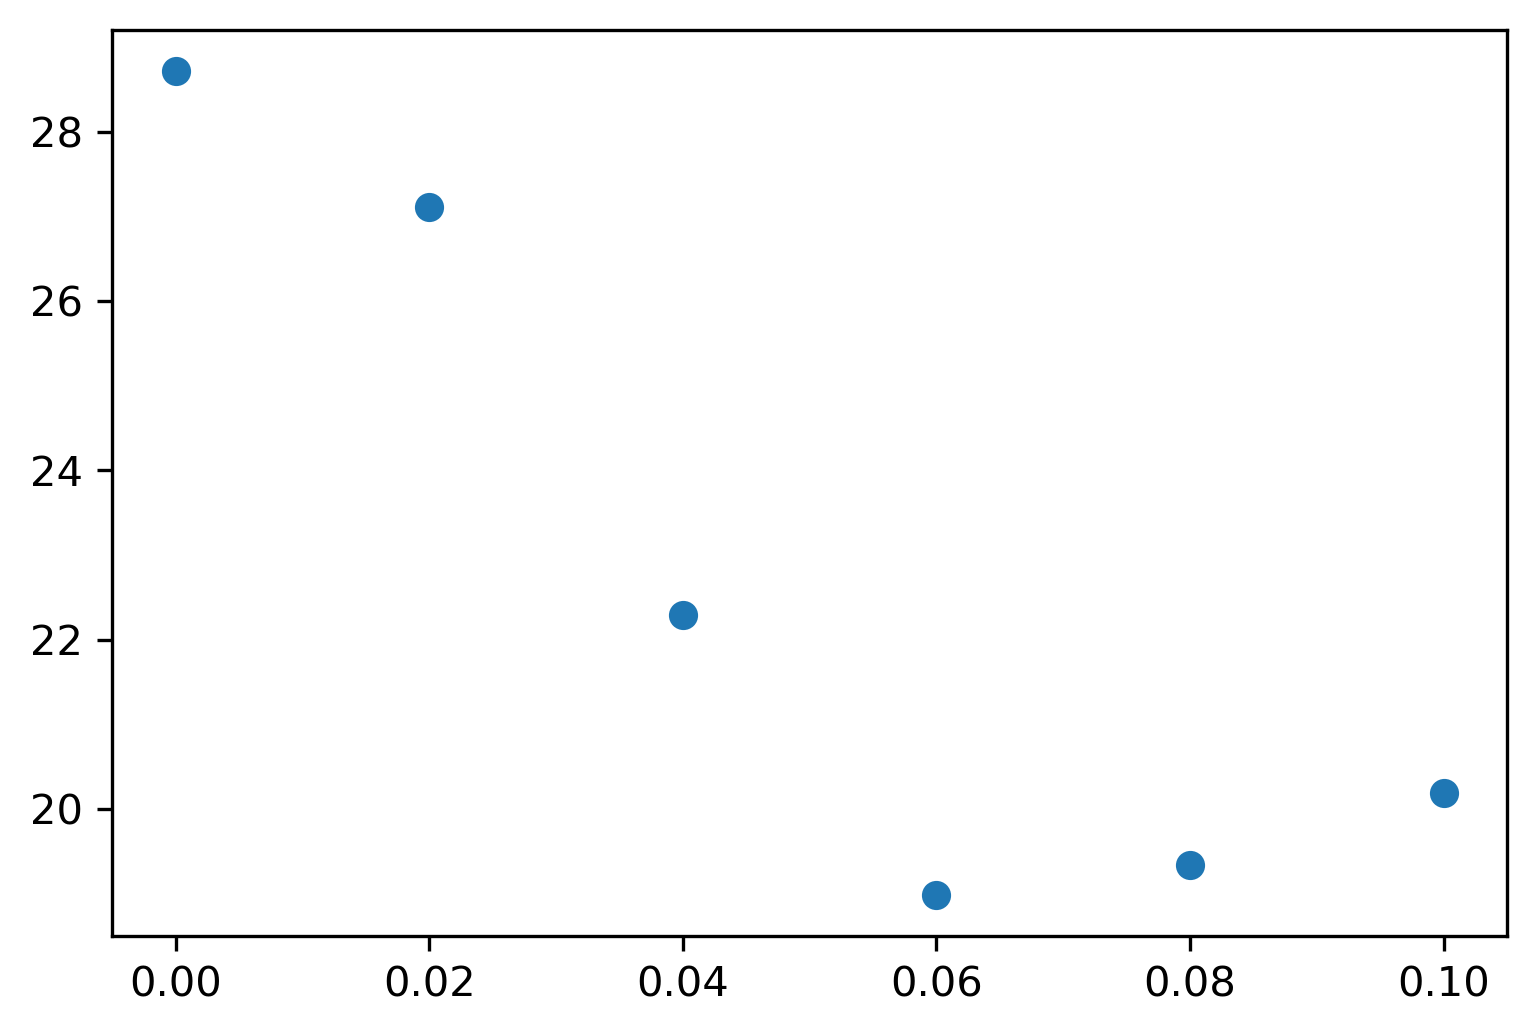

In [26]:
fig, ax = plt.subplots()
ax.scatter(thick_Al, I_Al_5);

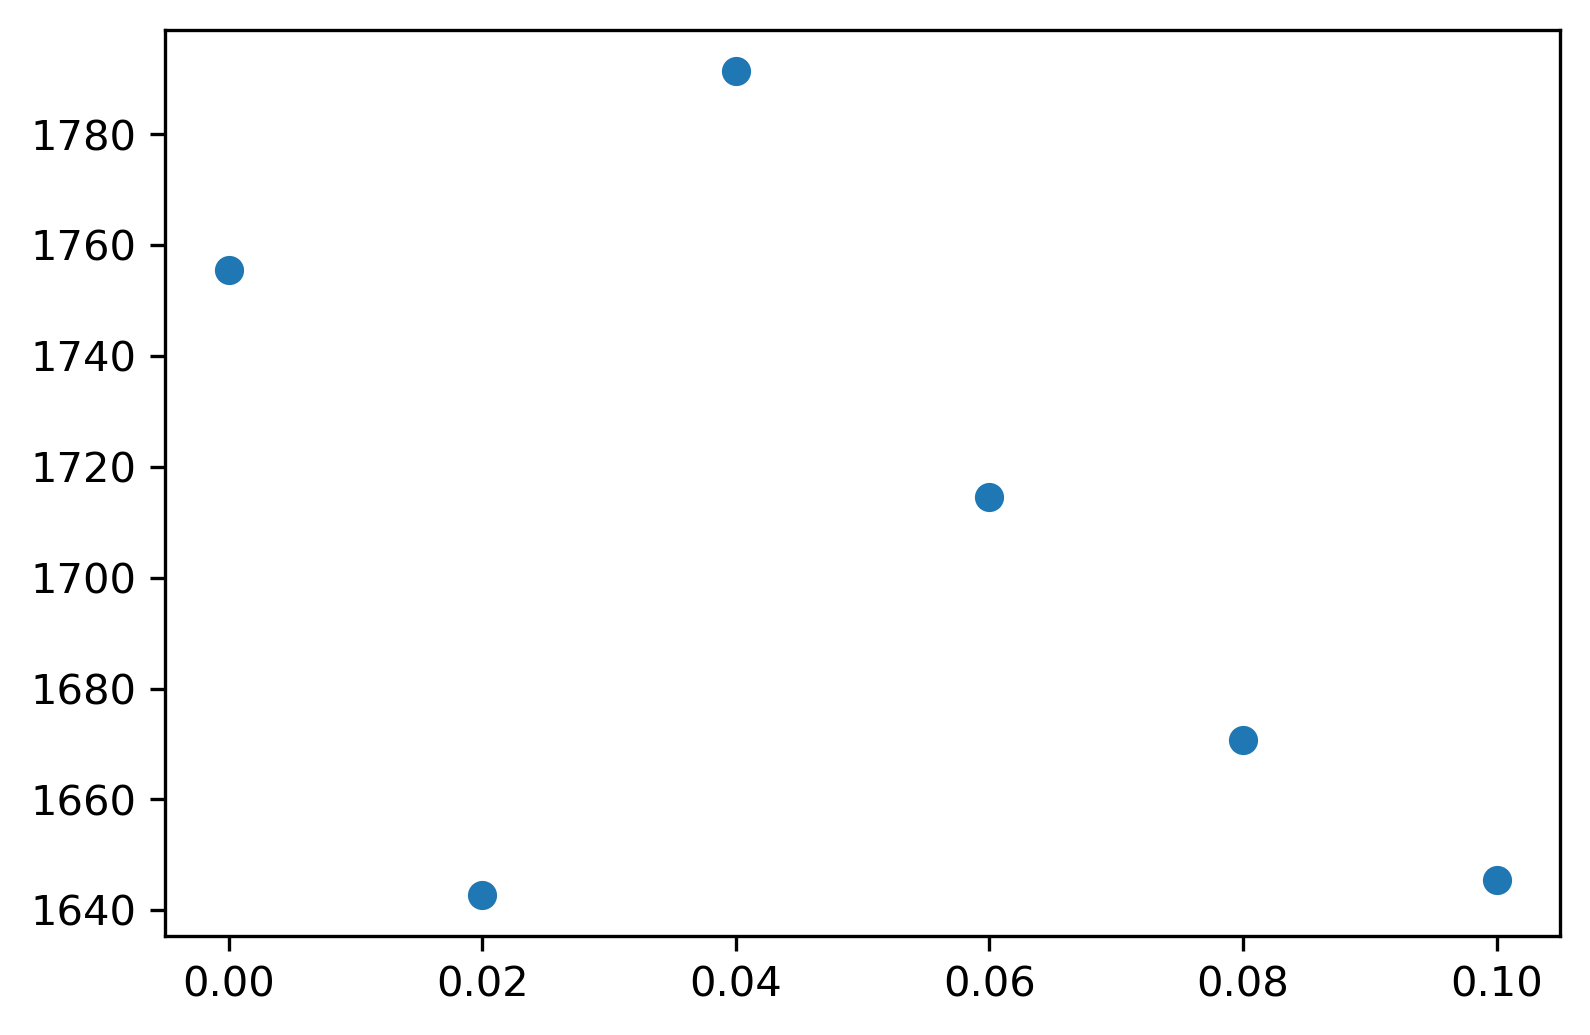

In [27]:
fig, ax = plt.subplots()
ax.scatter(thick_Al, I_Al_103);

In [3]:
thick_Zn = np.array([0.000, 0.025, 0.050, 0.075, 0.1])
I_Zn_5 = np.array([])
I_Zn_103 = np.array([])

filename = 'nofilm.5.0.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_5 = np.append(I_Zn_5, data['Count'].mean())

filename = 'Zn.0.025mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Zn_5 = np.append(I_Zn_5, data['Count'].mean())

filename = 'Zn.0.05mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Zn_5 = np.append(I_Zn_5, data['Count'].mean())

filename = 'Zn.0.075mm.5.20count.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Zn_5 = np.append(I_Zn_5, data['Count'].mean())

filename = 'Zn.0.1mm.5.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
data.columns = ['Count']
I_Zn_5 = np.append(I_Zn_5, data['Count'].mean())

#next one
filename = 'nofilm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_103 = np.append(I_Zn_103, data['Count'].mean())

filename = 'Zn.0.025mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_103 = np.append(I_Zn_103, data['Count'].mean())

filename = 'Zn.0.05mm.10.3.20count.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_103 = np.append(I_Zn_103, data['Count'].mean())

filename = 'Zn.0.075mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_103 = np.append(I_Zn_103, data['Count'].mean())

filename = 'Zn.0.1mm.10.3.20counts.csv'
data=pd.read_csv(filename,encoding='latin1', skiprows=0)
I_Zn_103 = np.append(I_Zn_103, data['Count'].mean())

#Deadtime adjustment
I_Zn_5 = I_Zn_5 / (1- 90E-6 * I_Zn_5)
I_Zn_103 = I_Zn_103 / (1- 90E-6 * I_Zn_103)



print(I_Zn_5)
print(I_Zn_103)

[28.724065   11.01090079  5.85308165  4.2015882   3.50110285]
[1755.59069452  739.09751181  331.23886838  146.25000697   66.59678364]


[ 0.         -0.0576108  -0.25338876 -0.41422439 -0.39589167 -0.35271584]


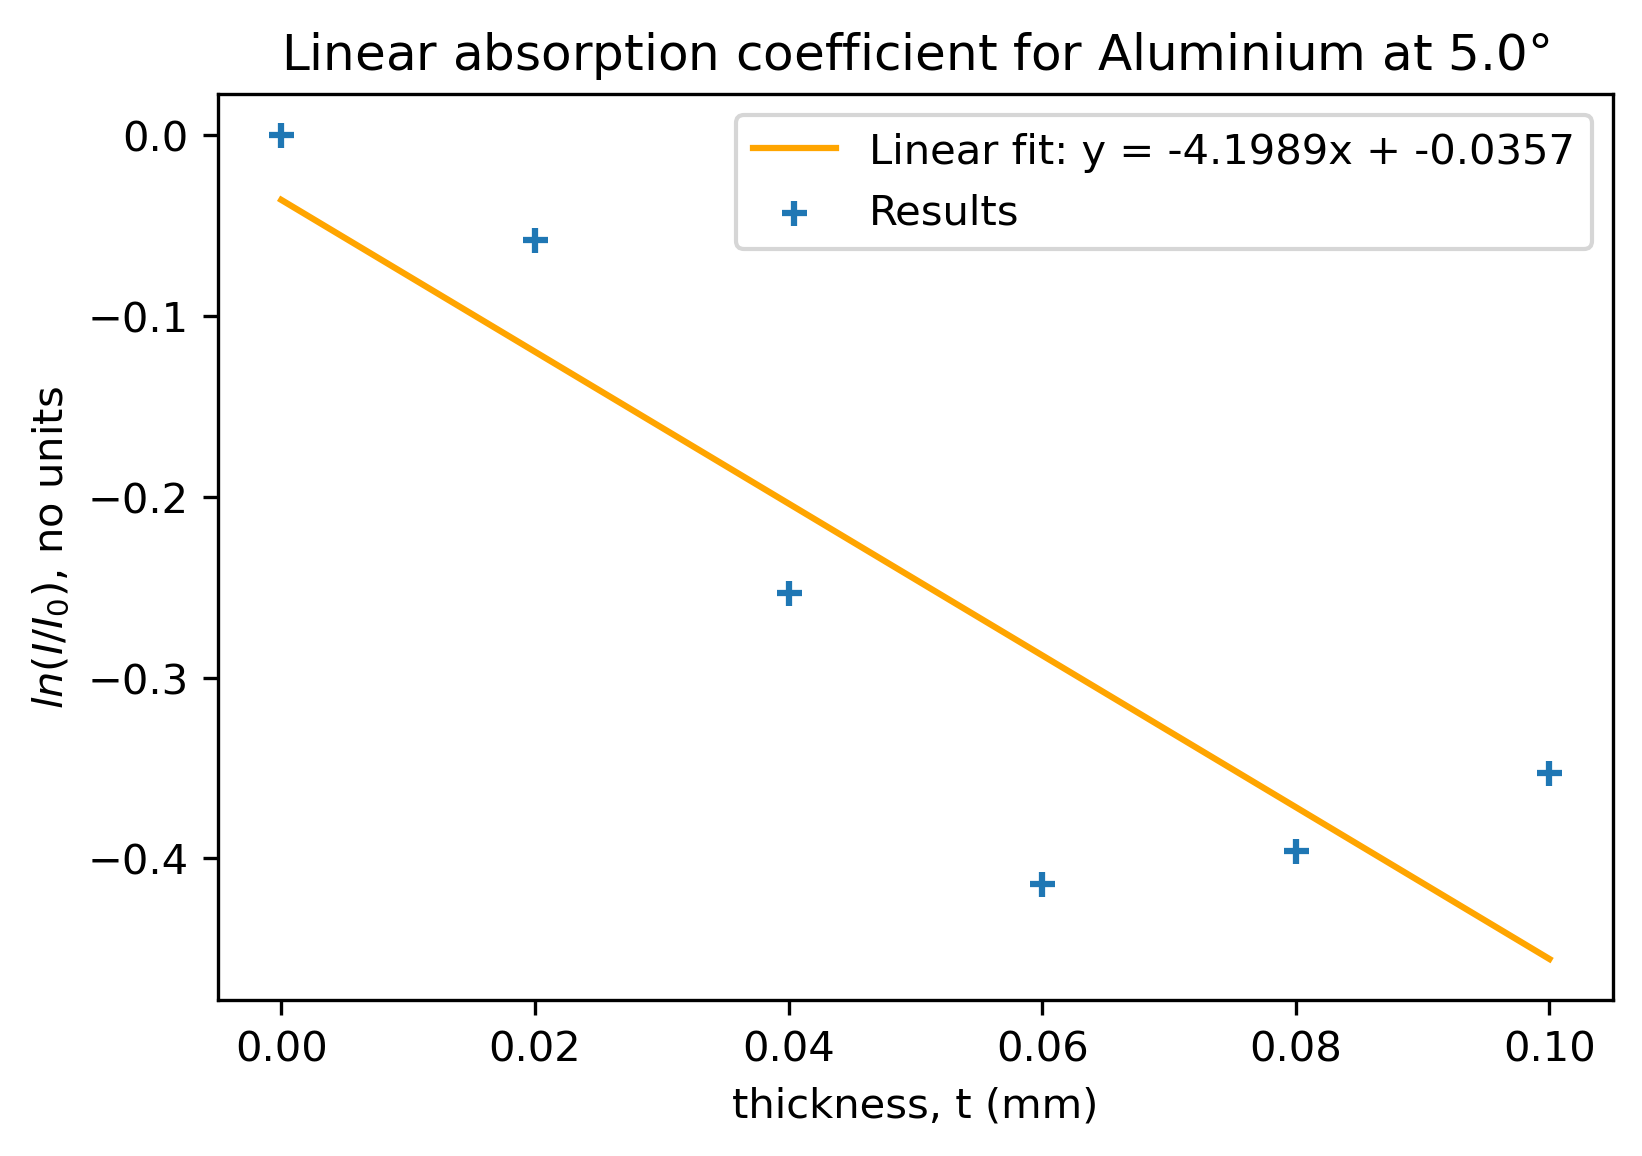

In [23]:
ln_I_Al_5 = np.log(I_Al_5/ I_Al_5[0])
print(ln_I_Al_5)

p = np.polyfit(thick_Al,ln_I_Al_5,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Al, ln_I_Al_5, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color='orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Aluminium at $5.0\degree$')
ax.legend();

[ 0.         -0.06639924  0.02020719 -0.02361343 -0.04954223 -0.06475609]


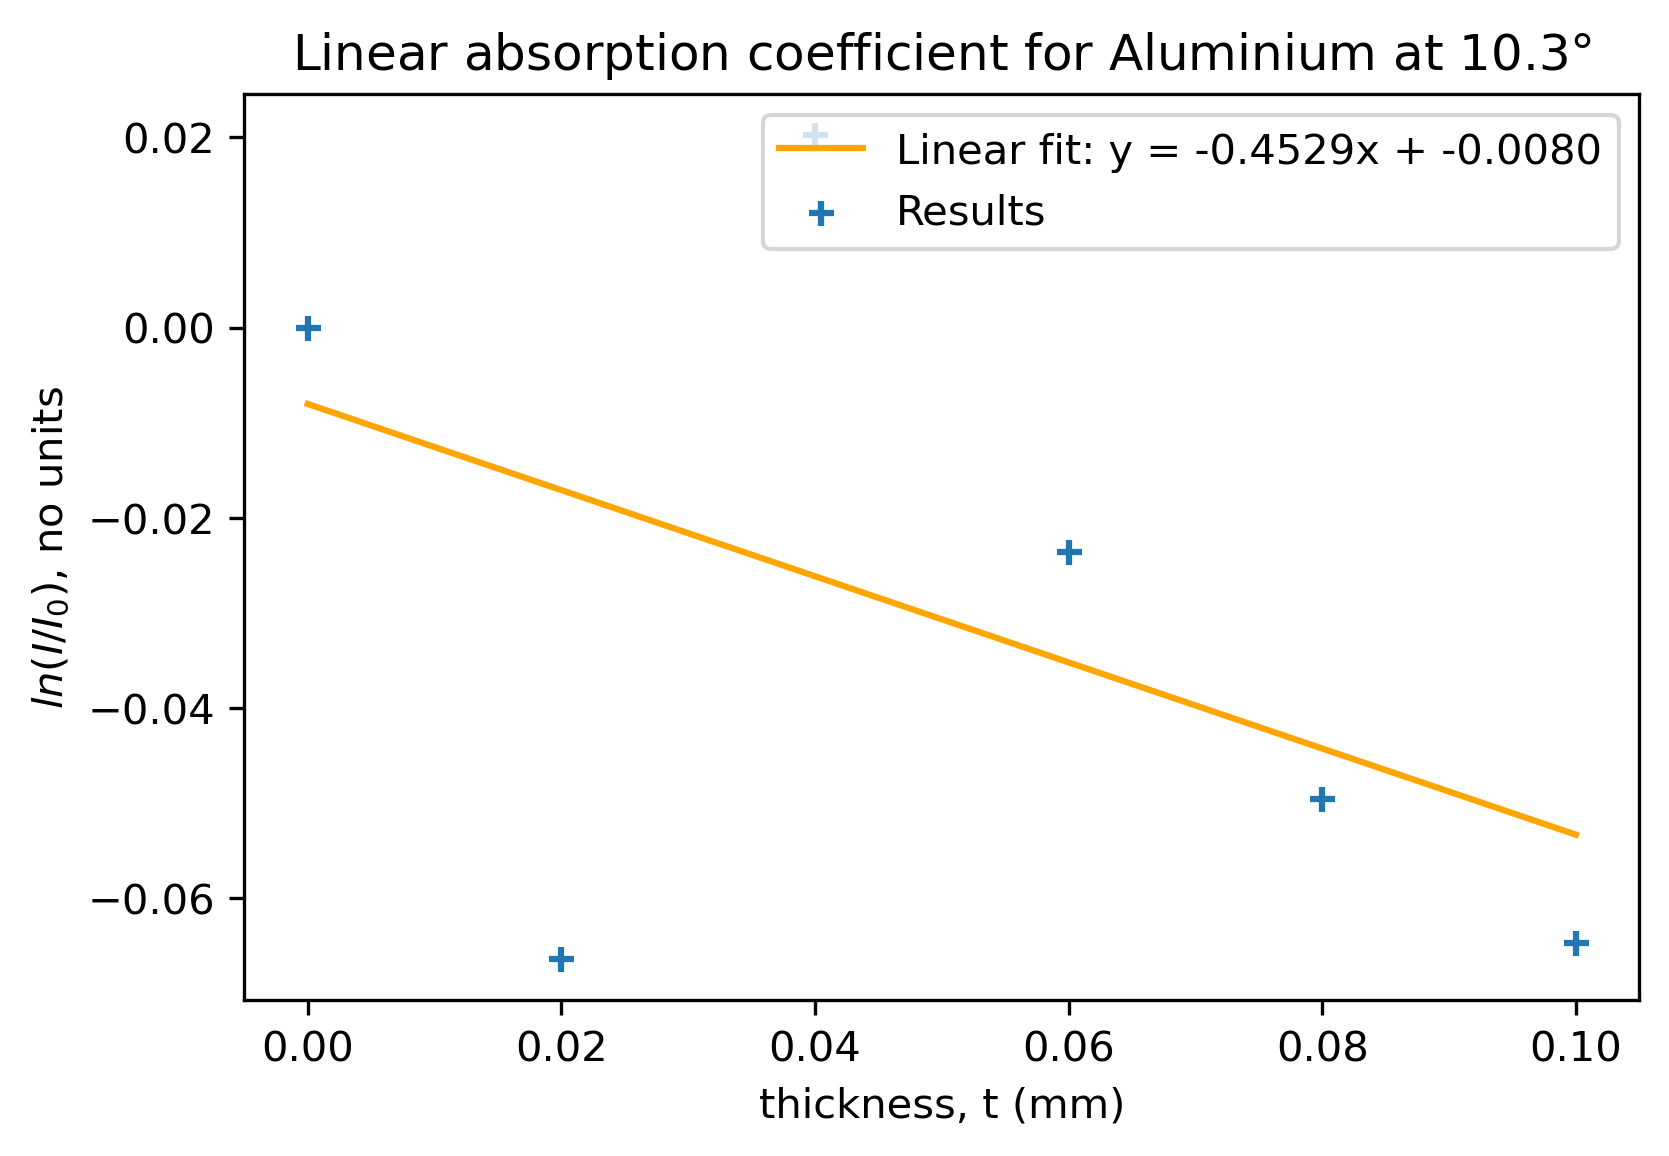

In [24]:
ln_I_Al_103 = np.log(I_Al_103/ I_Al_103[0])
print(ln_I_Al_103)

p = np.polyfit(thick_Al,ln_I_Al_103,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Al, ln_I_Al_103, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color='orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Aluminium at $10.3\degree$')
ax.legend();

[ 0.         -0.95884951 -1.59076697 -1.92227268 -2.10465726]


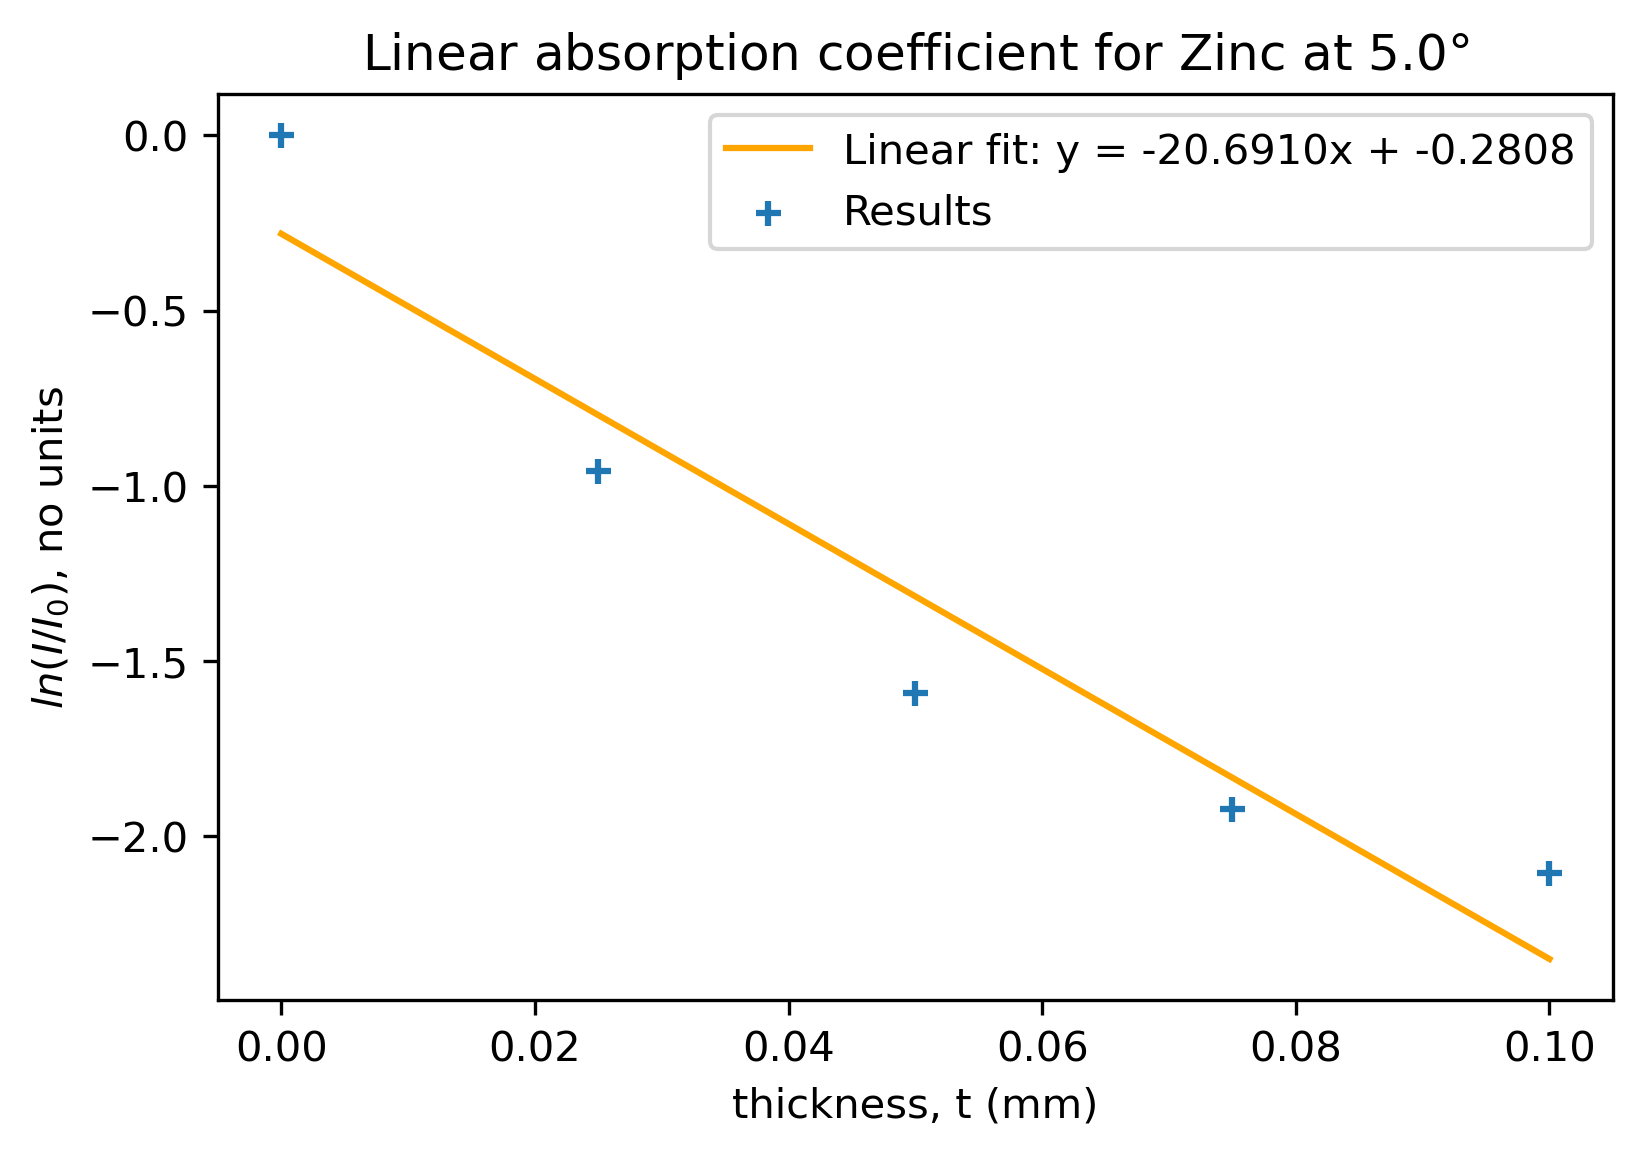

In [16]:
ln_I_Zn_5 = np.log(I_Zn_5/ I_Zn_5[0])
print(ln_I_Zn_5)

p = np.polyfit(thick_Zn,ln_I_Zn_5,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Zn, ln_I_Zn_5, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color='orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Zinc at $5.0\degree$')
ax.legend();

[ 0.         -0.86513079 -1.66772089 -2.48524312 -3.27190437]


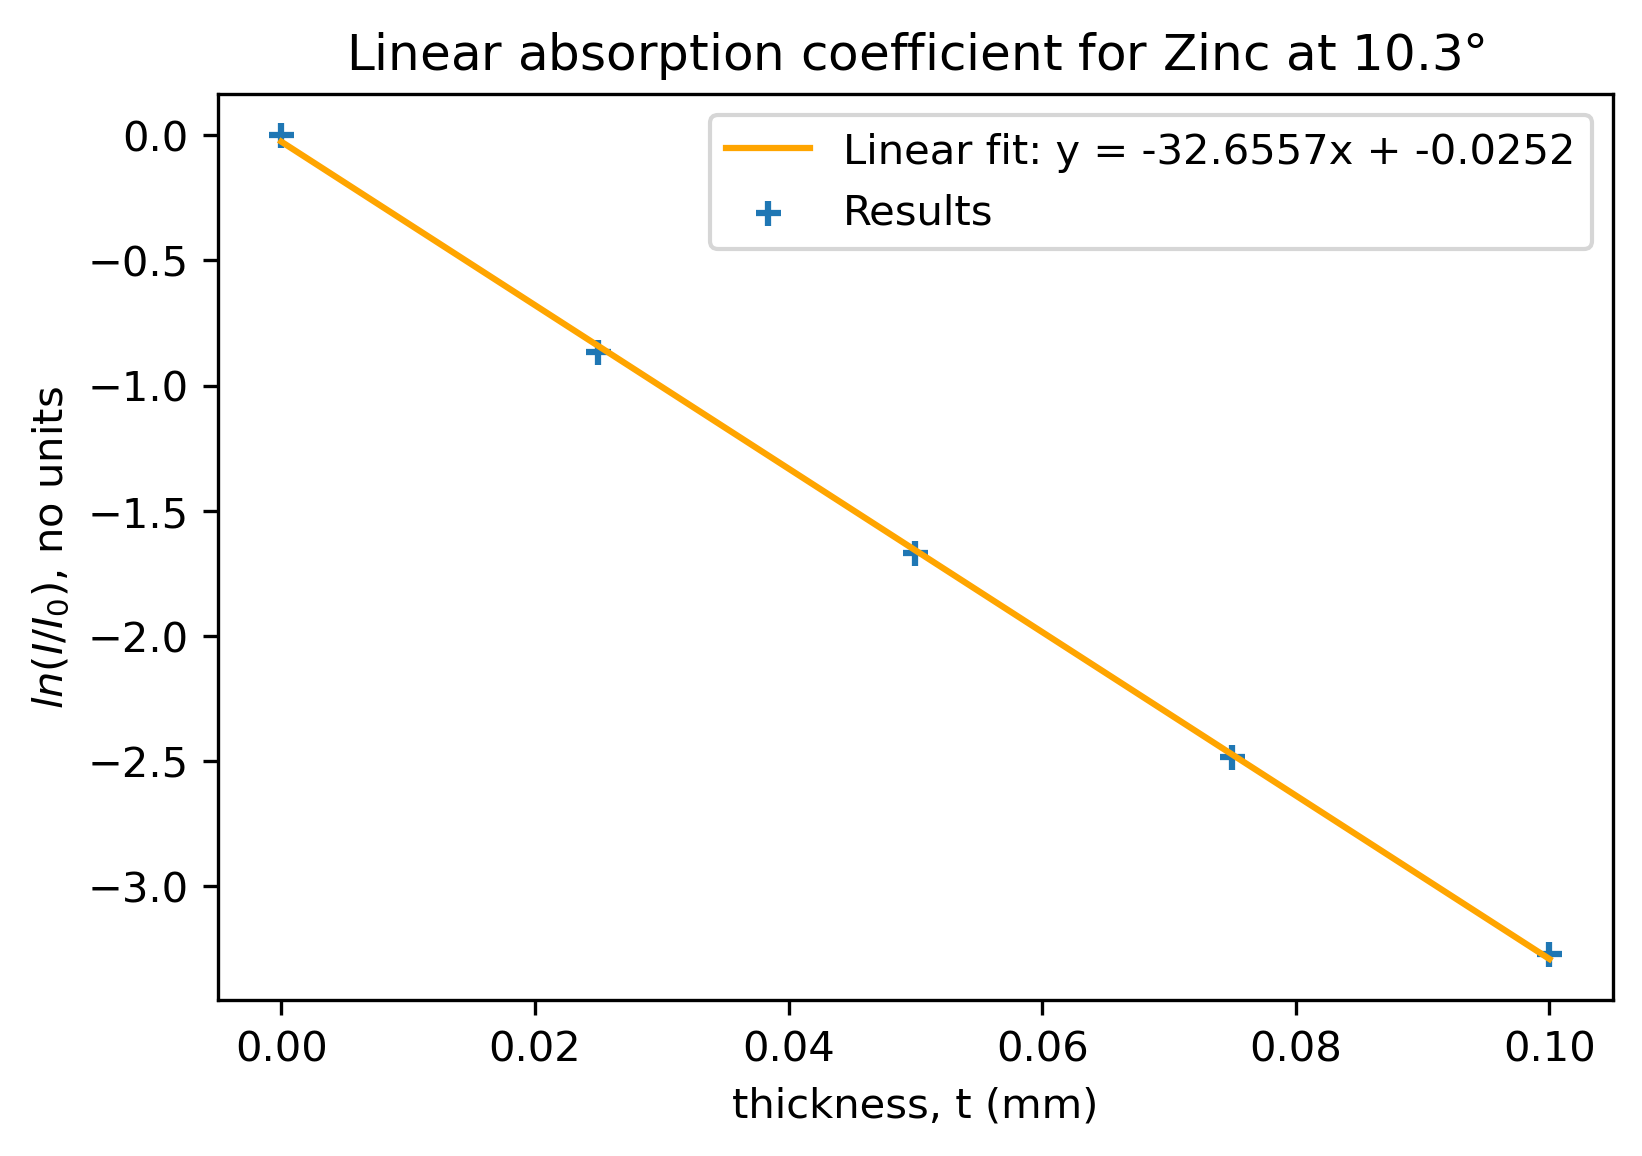

In [17]:
ln_I_Zn_103 = np.log(I_Zn_103/ I_Zn_103[0])
print(ln_I_Zn_103)

p = np.polyfit(thick_Zn,ln_I_Zn_103,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Zn, ln_I_Zn_103, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color = 'orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Zinc at $10.3\degree$')
ax.legend();

In [10]:
d_LiF = 201.4# crystal spacing pm
d_KBr = 329.5

d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs
peaks = np.array([[10.2,15]])#peaks from graph with their impulses
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [10.2 15. ]
wavelengths (A): [0.71329733 1.04252311]
energies (keV): [17.38180279 11.89267981]


# 16 November

In [6]:
I_Al_102 = np.array([1901.85, 1726.5,1655.4,1621,1566,1537.6])
I_Al_15 = np.array([524.05,467.85,419.65,394.05,361.8, 336.1])#Deadtime adjustment
I_Al_15 = I_Al_15 / (1- 90E-6 * I_Al_15)
I_Al_102 = I_Al_102 / (1- 90E-6 * I_Al_102)
print(I_Al_102)
print(I_Al_15)

[2294.61043744 2044.1266139  1945.20889198 1897.88200583 1822.9227295
 1784.55367588]
[549.99000352 488.41546581 436.12166095 408.53861781 373.97745385
 346.58381378]


[ 0.         -0.11559247 -0.16519371 -0.18982455 -0.23012198 -0.25139474]


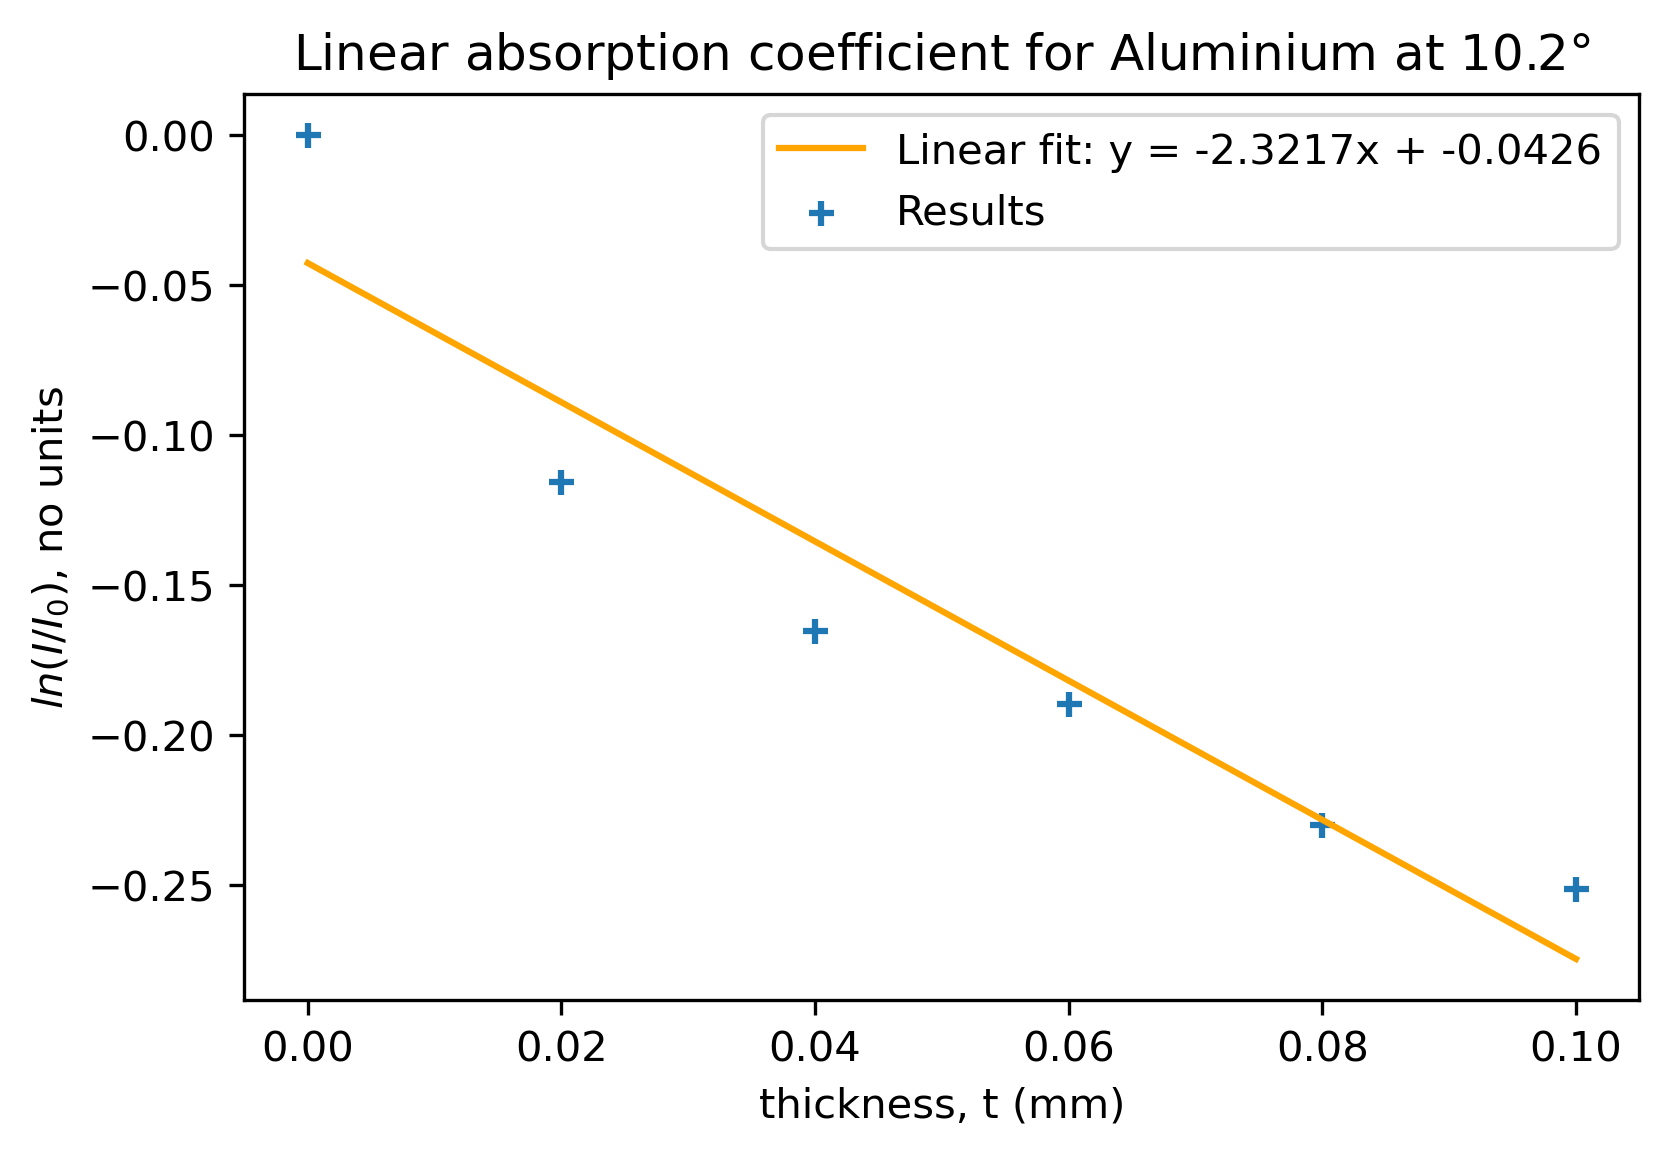

In [8]:
ln_I_Al_102 = np.log(I_Al_102/ I_Al_102[0])
print(ln_I_Al_102)

p = np.polyfit(thick_Al,ln_I_Al_102,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Al, ln_I_Al_102, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color = 'orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Aluminium at $10.2\degree$')
ax.legend();

[ 0.         -0.11873369 -0.23197886 -0.29731366 -0.38570459 -0.46177543]


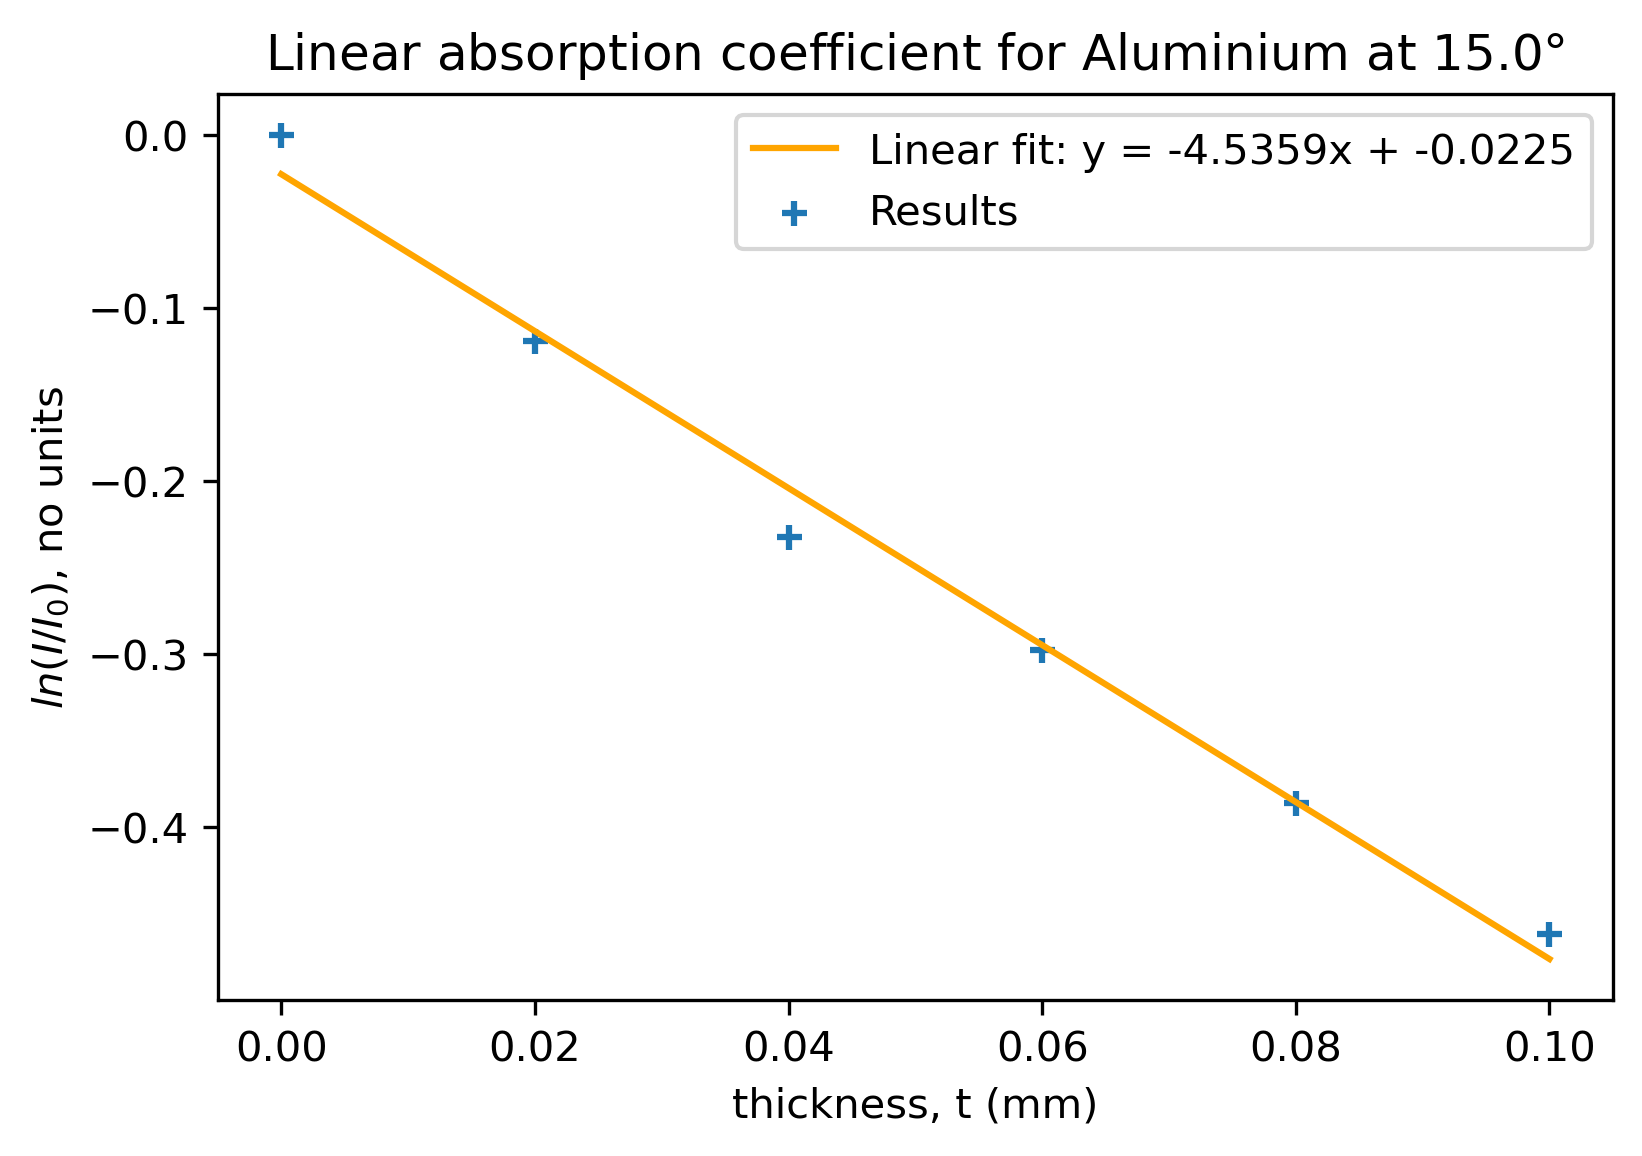

In [9]:
ln_I_Al_15 = np.log(I_Al_15/ I_Al_15[0])
print(ln_I_Al_15)

p = np.polyfit(thick_Al,ln_I_Al_15,1) #1st order, i.e. linear fit
line = np.poly1d(p)
x = np.linspace(0,0.1, 20)
y = line(x)

fig, ax = plt.subplots()
ax.scatter(thick_Al, ln_I_Al_15, label = 'Results', marker = '+')
ax.plot(x,y,label = f'Linear fit: y = {p[0]:0.4f}x + {p[1]:0.4f}', color = 'orange')
ax.set_xlabel('thickness, t (mm)')
ax.set_ylabel('$ln(I/I_0)$, no units')
ax.set_title('Linear absorption coefficient for Aluminium at $15.0\degree$')
ax.legend();

In [10]:
d = 2.008E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs
peaks = np.array([[10.2,15.0]])#peaks from graph with their impulses
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [10.2 15. ]
wavelengths (A): [0.71117232 1.03941729]
energies (keV): [17.43374045 11.92821571]


# Data from 23 November 2021

In [8]:
d = 2.014E-10#for LiF at room temperature
c = 299792458#speed of light in m/s
h = 6.62607004E-34#Planck's constant in m^2kg / s
e = 1.60218E-19#electron charge in Coulombs

SnEdge = 21 #degrees
CuEdge = 22.5 #degrees
peaks = np.array([[21.0,22.5]])#peaks from graph with their impulses
wavelengths = (2* d* np.sin(np.pi* peaks[0]/180))/1E-10
energies = c*h/(e*wavelengths*1000*1E-10)
print('Angles:', peaks[0])
print('wavelengths (A):', wavelengths)
print('energies (keV):', energies)

Angles: [21.  22.5]
wavelengths (A): [1.4435061  1.54144887]
energies (keV): [8.58908292 8.04333758]
